<a href="https://colab.research.google.com/github/errec-sun/brain/blob/master/Copy_of_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%A1%D1%82%D1%8E%D0%BF%D0%B0%D0%BD_%D0%90_%D0%A1_%D0%A4%D0%B5%D0%B2%D1%80%D0%B0%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%83%D1%80%D1%81_Pro_%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_4_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import библиотек


In [0]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.python.keras.optimizers import Adam, RMSprop

from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from sklearn.model_selection import train_test_split

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Загрузка файлов

#Загрузка данных


In [0]:
###########################
# Чтение файла в текст
##########################
def readText(fileName): #функция принимает имя файла
  f = open(fileName, 'r')        #задаем открытие нужного файла в режиме чтения
  text = f.read()                #читаем текст
  text = text.replace("\n", " ") #переносы строки переводим в пробелы
  
  return text                    #функция возвращает текст файла
DIR = '/content/drive/My Drive/UAI/Neuron Networks/Занятие №4 Обработка текстов с помощью нейросетей/Тексты писателей/'
#Загружаем обучающие тексты
trainText = []
trainText.append(readText(DIR + '(О. Генри) Обучающая_50 вместе.txt'))
trainText.append(readText(DIR + '(Стругацкие) Обучающая_5 вместе.txt'))
trainText.append(readText(DIR + '(Булгаков) Обучающая_5 вместе.txt'))
trainText.append(readText(DIR + '(Клиффорд_Саймак) Обучающая_5 вместе.txt'))
trainText.append(readText(DIR + '(Макс Фрай) Обучающая_5 вместе.txt'))
trainText.append(readText(DIR + '(Рэй Брэдберри) Обучающая_22 вместе.txt')) 

className = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдбери"]
nClasses = len(className)

#Загружаем тестовые тексты
testText = []
testText.append(readText(DIR + '(О. Генри) Тестовая_20 вместе.txt'))
testText.append(readText(DIR + '(Стругацкие) Тестовая_2 вместе.txt'))
testText.append(readText(DIR + '(Булгаков) Тестовая_2 вместе.txt'))
testText.append(readText(DIR + '(Клиффорд_Саймак) Тестовая_2 вместе.txt'))
testText.append(readText(DIR + '(Макс Фрай) Тестовая_2 вместе.txt'))
testText.append(readText(DIR + '(Рэй Брэдберри) Тестовая_8 вместе.txt'))

#Обработка данных

In [0]:
#################
#Преобразовываем текстовые данные в числовые/векторные для обучения нейросетью
#################

maxWordsCount = 30000 #определяем макс.кол-во слов/индексов, учитываемое при обучении текстов

#для этого воспользуемся встроенной в Keras функцией Tokenizer для разбиения текста и превращения в матрицу числовых значений
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
#выше задаем параметры:
#(num_words=maxWordsCount) - определяем макс.кол-во слов/индексов, учитываемое при обучении текстов
#(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n') - избавляемся от ненужных символов
#(lower=True) - приводим слова к нижнему регистру
#(split=' ') - разделяем слова по пробелу
#(char_level=False) - просим токенайзер не удалять однобуквенные слова

tokenizer.fit_on_texts(trainText) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности
items = list(tokenizer.word_index.items()) #Вытаскиваем индексы слов для просмотра

In [0]:
print(items[:100])

[('unknown', 1), ('и', 2), ('в', 3), ('не', 4), ('я', 5), ('что', 6), ('на', 7), ('с', 8), ('он', 9), ('а', 10), ('как', 11), ('то', 12), ('это', 13), ('но', 14), ('все', 15), ('у', 16), ('по', 17), ('его', 18), ('к', 19), ('так', 20), ('мне', 21), ('из', 22), ('за', 23), ('меня', 24), ('ты', 25), ('же', 26), ('сказал', 27), ('бы', 28), ('было', 29), ('вы', 30), ('от', 31), ('они', 32), ('мы', 33), ('только', 34), ('да', 35), ('еще', 36), ('она', 37), ('о', 38), ('когда', 39), ('вот', 40), ('уже', 41), ('если', 42), ('был', 43), ('ни', 44), ('их', 45), ('нет', 46), ('чтобы', 47), ('до', 48), ('ну', 49), ('для', 50), ('ему', 51), ('может', 52), ('или', 53), ('ничего', 54), ('даже', 55), ('там', 56), ('очень', 57), ('кто', 58), ('ее', 59), ('тут', 60), ('потом', 61), ('просто', 62), ('него', 63), ('чем', 64), ('быть', 65), ('теперь', 66), ('под', 67), ('где', 68), ('нас', 69), ('есть', 70), ('тебя', 71), ('время', 72), ('ли', 73), ('тебе', 74), ('со', 75), ('во', 76), ('вас', 77), ('раз'

In [0]:
print(items[140000:140100])

[('престранная', 140001), ('зажилась', 140002), ('несовпадение', 140003), ('плететесь', 140004), ('галлонов', 140005), ('печений', 140006), ('устройте', 140007), ('продержат', 140008), ('опозданий', 140009), ('девяностом', 140010), ('гуляя', 140011), ('заглянет', 140012), ('сверстница', 140013), ('разговорятся', 140014), ('познакомятся', 140015), ('стокгольме', 140016), ('глазго', 140017), ('замерзшему', 140018), ('знойно', 140019), ('вспыхнут', 140020), ('забежала', 140021), ('тянучкой', 140022), ('мшистому', 140023), ('гранитном', 140024), ('рассыпаются', 140025), ('смолкает', 140026), ('сгущаются', 140027), ('мотылька…', 140028), ('надвинувшаяся', 140029), ('вспенивая', 140030), ('начищая', 140031), ('распечатывал', 140032), ('седьмое', 140033), ('наручные', 140034), ('минутная', 140035), ('пригвождено', 140036), ('закатится', 140037), ('вертящемся', 140038), ('пьесках', 140039), ('форестера', 140040), ('пореветь', 140041), ('топках', 140042), ('печей', 140043), ('превращенного', 14

In [0]:
print("Размер словаря", len(items))

Размер словаря 144057


In [0]:
print("Протестируем словарь частотности")
print("Интересующее слово имеет индекс: ", tokenizer.word_index[input("Уточните слово: ")]) #протестируем словарь частотности

Протестируем словарь частотности
Уточните слово: вселенная
Интересующее слово имеет индекс:  11072


In [0]:
#преобразовываем текст в последовательность индексов согласно частотному словарю
trainWordIndexes = tokenizer.texts_to_sequences(trainText) #обучающие тесты в индексы
testWordIndexes = tokenizer.texts_to_sequences(testText)  #проверочные тесты в индексы

print("Взглянем на фрагмент обучающего текста:")
print("В виде оригинального текста:              ", trainText[1] [:87])
print("Он же в виде последовательности индексов: ", trainWordIndexes[1][:20])

print()
print()

print("Статистика по обучающим текстам:")
for i in range(6):
  print(className[i], " ", len(trainText[i]), " символов, ", len(trainWordIndexes[i]), " слов")
print("В сумме ", len(trainText[0])+len(trainText[1])+len(trainText[2])+len(trainText[3])+len(trainText[4])+len(trainText[5]), " символов, ", len(trainWordIndexes[0])+len(trainWordIndexes[1])+len(trainWordIndexes[2])+len(trainWordIndexes[3])+len(trainWordIndexes[4])+len(trainWordIndexes[5]), " слов")
print()
print("Статистика по обучающим текстам:")
for i in range(6):
  print(className[i], " ", len(testText[i]), " символов, ", len(testWordIndexes[i]), " слов")
print("В сумме ", len(testText[0])+len(testText[1])+len(testText[2])+len(testText[3])+len(testText[4])+len(testText[5]), " символов, ", len(testWordIndexes[0])+len(testWordIndexes[1])+len(testWordIndexes[2])+len(testWordIndexes[3])+len(testWordIndexes[4])+len(testWordIndexes[5]), " слов")

Взглянем на фрагмент обучающего текста:
В виде оригинального текста:               Парень из преисподней     1     Ну и деревня! Сроду я таких деревень не видел и не знал
Он же в виде последовательности индексов:  [470, 22, 1, 1482, 49, 2, 12725, 7723, 5, 415, 1, 4, 252, 2, 4, 247, 55, 6, 240, 10517]


Статистика по обучающим текстам:
О. Генри   1049517  символов,  160682  слов
Стругацкие   2042469  символов,  313405  слов
Булгаков   1765648  символов,  262109  слов
Саймак   1609507  символов,  251551  слов
Фрай   3700010  символов,  569052  слов
Брэдбери   1386454  символов,  214694  слов
В сумме  11553605  символов,  1771493  слов

Статистика по обучающим текстам:
О. Генри   349662  символов,  53255  слов
Стругацкие   704846  символов,  108730  слов
Булгаков   875042  символов,  132910  слов
Саймак   318811  символов,  50362  слов
Фрай   1278191  символов,  196911  слов
Брэдбери   868673  символов,  132746  слов
В сумме  4395225  символов,  674914  слов


In [0]:
# Присвоение индекса 1 всем словам ниже слова с индеком low_ind
#преобразовываем текст в последовательность индексов согласно частотному словарю
trainWordIndexes = tokenizer.texts_to_sequences(trainText) #обучающие тесты в индексы
testWordIndexes = tokenizer.texts_to_sequences(testText)  #проверочные тесты в индексы

print("Взглянем на фрагмент обучающего текста:")
print("В виде оригинального текста:              ", trainText[1] [:87])
print("Он же в виде последовательности индексов: ", trainWordIndexes[1][:20])
print("test в последовательности индексов: ", testWordIndexes[1][:20])

# Присвоение индекса 1 всем словам ниже слова с индеком low_ind
low_ind = 23
new_trainWordIndexes = []
new_testWordIndexes  = []
for i in range(len(trainWordIndexes)):
  np_array_train = np.array(trainWordIndexes[i])
  np_array_train[np_array_train < low_ind] = 1
  new_trainWordIndexes.append(np_array_train.tolist())

for i in range(len(testWordIndexes)):
  np_array_test = np.array(testWordIndexes[i])
  np_array_test[np_array_test < low_ind] = 1
  new_testWordIndexes.append(np_array_test.tolist())

trainWordIndexes = new_trainWordIndexes
testWordIndexes  = new_testWordIndexes


print("Он же в виде последовательности индексов: ", new_trainWordIndexes[1][:20])
print("test в последовательности индексов: ", testWordIndexes[1][:20])


#np_trainWordIndexes[1][:20][np_trainWordIndexes[1][:20] < 23] = 1
#print(np_trainWordIndexes[1][:20])

#state_with_color_bar[:,:,num_bar:][state_with_color_bar[:,:,num_bar:] > 0] = self.wait_color

print()
print()

print("Статистика по обучающим текстам:")
for i in range(6):
  print(className[i], " ", len(trainText[i]), " символов, ", len(trainWordIndexes[i]), " слов")
print("В сумме ", len(trainText[0])+len(trainText[1])+len(trainText[2])+len(trainText[3])+len(trainText[4])+len(trainText[5]), " символов, ", len(trainWordIndexes[0])+len(trainWordIndexes[1])+len(trainWordIndexes[2])+len(trainWordIndexes[3])+len(trainWordIndexes[4])+len(trainWordIndexes[5]), " слов")
print()
print("Статистика по обучающим текстам:")
for i in range(6):
  print(className[i], " ", len(testText[i]), " символов, ", len(testWordIndexes[i]), " слов")
print("В сумме ", len(testText[0])+len(testText[1])+len(testText[2])+len(testText[3])+len(testText[4])+len(testText[5]), " символов, ", len(testWordIndexes[0])+len(testWordIndexes[1])+len(testWordIndexes[2])+len(testWordIndexes[3])+len(testWordIndexes[4])+len(testWordIndexes[5]), " слов")

Взглянем на фрагмент обучающего текста:
В виде оригинального текста:               Парень из преисподней     1     Ну и деревня! Сроду я таких деревень не видел и не знал
Он же в виде последовательности индексов:  [470, 22, 1, 1482, 49, 2, 12725, 7723, 5, 415, 1, 4, 252, 2, 4, 247, 55, 6, 240, 10517]
test в последовательности индексов:  [1, 5862, 1, 1, 977, 1482, 5, 2763, 965, 3169, 2, 1008, 1037, 1859, 15, 29, 20, 11, 1667, 1]
Он же в виде последовательности индексов:  [470, 1, 1, 1482, 49, 1, 12725, 7723, 1, 415, 1, 1, 252, 1, 1, 247, 55, 1, 240, 10517]
test в последовательности индексов:  [1, 5862, 1, 1, 977, 1482, 1, 2763, 965, 3169, 1, 1008, 1037, 1859, 1, 29, 1, 1, 1667, 1]


Статистика по обучающим текстам:
О. Генри   1049517  символов,  160682  слов
Стругацкие   2042469  символов,  313405  слов
Булгаков   1765648  символов,  262109  слов
Саймак   1609507  символов,  251551  слов
Фрай   3700010  символов,  569052  слов
Брэдбери   1386454  символов,  214694  слов
В сумме  1155360

#Создание обучающей и проверочной выборки

**Функции для формирования выборки по отрезкам текста с заданным шагом**



In [0]:
###########################
# Формирование обучающей выборки по листу индексов слов
# (разделение на короткие векторы)
##########################
def getSetFromIndexes(wordIndexes, xLen, step):
  xSample = []
  wordsLen = len(wordIndexes)
  index = 0
  
  #Идём по всей длине вектора индексов
  #"Откусываем" векторы длины xLen и смещаеммся вперёд на step
  
  while (index + xLen <= wordsLen):
    xSample.append(wordIndexes[index:index+xLen])
    index += step
    
  return xSample

In [0]:
###########################
# Формирование обучающей и проверочной выборки
# Из двух листов индексов от двух классов
##########################
def createSetsMultiClasses(wordIndexes, xLen, step): #функция принимает последовательность индексов, размер окна, шаг окна

  #Для каждого из 6 классов
  #Создаём обучающую/проверочную выборку из индексов
  nClasses = len(wordIndexes) #задаем количество классов выборки
  classesXSamples = []        #здесь будет список размером "кол-во классов*кол-во окон в тексте*длину окна(например 6 по 1341*1000)"
  for wI in wordIndexes:      #для каждого текста выборки из последовательности индексов
    classesXSamples.append(getSetFromIndexes(wI, xLen, step)) #добавляем в список очередной текст индексов, разбитый на "кол-во окон*длину окна" 

  #Формируем один общий xSamples
  xSamples = [] #здесь будет список размером "суммарное кол-во окон во всех текстах*длину окна(например 15779*1000)"
  ySamples = [] #здесь будет список размером "суммарное кол-во окон во всех текстах*вектор длиной 6"
  
  for t in range(nClasses): #в диапазоне кол-ва классов(6)
    xT = classesXSamples[t] #берем очередной текст вида "кол-во окон в тексте*длину окна"(например 1341*1000)
    for i in range(len(xT)): #и каждое его окно
      xSamples.append(xT[i]) #добавляем в общий список выборки
    
    #Формируем ySamples по номеру класса
    currY = utils.to_categorical(t, nClasses) #текущий класс переводится в вектор длиной 6 вида [0.0.0.1.0.0.]
    for i in range(len(xT)): #на каждое окно выборки 
      ySamples.append(currY) #добавляем соответствующий вектор класса

  xSamples = np.array(xSamples) #переводим в массив numpy для подачи в нейронку
  ySamples = np.array(ySamples) #переводим в массив numpy для подачи в нейронку

  
  return (xSamples, ySamples) #функция возвращает выборку и соответствующие векторы классов

**Подготовка данных**


In [0]:
#Задаём базовые параметры
xLen = 5000 #Длина отрезка текста, по которой анализируем, в словах
step = 100 #Шаг разбиения исходного текста на обучающие вектора

In [0]:
#Формируем обучающую и тестовую выборку
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step) #извлекаем обучающую выборку
xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)    #извлекаем тестовую выборку
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)
#получили обучающий/тестовый набор, достаточный для запуска Embedding, но для Bag of Words нужно xTrain и xTest представить в виде векторов из 0 и 1

(17418, 5000)
(17418, 6)
(6453, 5000)
(6453, 6)


In [0]:
print(xTrain[0])

[  1   1   1 ... 468   1 278]


In [0]:
#Преобразовываем полученные выборки из последовательности индексов в матрицы нулей и единиц по принципу Bag of Words
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())#подаем xTrain в виде списка чтобы метод успешно сработал
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())#подаем xTest в виде списка чтобы метод успешно сработал
print(xTrain01.shape)       #Размер обучающей выборки, сформированной по Bag of Words
print(xTrain01[0][0:100]) #фрагмент набора слов в виде Bag of Words

(17418, 30000)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1.]


In [0]:
print(xTrain01[0][10000:11000])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

### Функция автоматического тестирования сети

In [0]:
#Функция генерации нейронки
#neoronsL1 - нейронов в первом слое
#neuronsL2 - нейронов в втором слое, 0 - если не делать слой
#neuronsL3 - нейронов в третьем слое, 0 - если не делать слой
#innerActivation - активационная функция скрытых слоёв
#outputActivation - активационная функция выходного слоя
def createNet(neoronsL1, innerActivationL1, neuronsL2, innerActivationL2, neuronsL3, innerActivationL3):
  model = Sequential() #Создаём сеть
  maxWordsCount = xTrain01.shape[1]
  model.add(Dense(neoronsL1, input_dim=maxWordsCount, activation=innerActivationL1)) #Добавляем первый слой
  
  #Если число второго слоя > 0
  #Создаём второй слой
  if (neuronsL2 > 0):
    model.add(Dense(neuronsL2, activation=innerActivationL2))

  #Если число третьего слоя > 0
  #Создаём третий слой
  if (neuronsL3 > 0):
    model.add(Dense(neuronsL3, activation=innerActivationL3))
  
  #Создаём выходной слой
  model.add(Dense(6, activation='sigmoid'))
  
  #Компилируем сеть
  model.compile(loss="categorical_crossentropy", optimizer = Adam(lr=0.00001), metrics=["accuracy"])
  
  #Возвращаем созданную сеть
  return model

#Обучаем и тестируем сеть
#Net - лист с 6 параметрами сети
#batch_size - размер батча
#epochs - число эпох обучения
#iterations - число запусков сети
def testModel(net, batch_size, epochs, iterations):
  acc = [] #Лист с точностями на проверочной выборке по каждому запуску
  
  #Запускаем iterations раз сеть
  for i in range(iterations):
    #Создаём сеть
    model01 = createNet(net[0], net[1], net[2], net[3], net[4], net[5])
    #Обучаем сеть на выборке, сформированной по bag of words - xTrain01
    history = model01.fit(xTrain01, 
                          yTrain, 
                          epochs = epochs,
                          batch_size = batch_size,
                          validation_data=(xTest01, yTest))

    plt.plot(history.history['acc'], 
            label='Доля верных ответов на обучающем наборе')
    plt.plot(history.history['val_acc'], 
            label='Доля верных ответов на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()
    plt.show()

    #Добавляем в лист точность на проверочной выборке на последней итерации
    acc.append(history.history["val_acc"][-1])
  
  #Возвращаем лист точностей
  return np.array(acc)

In [0]:
def get_data(low_ind_dict = 0, size_dict = 20000, len_cut = 1000, step = 100):
  print('Искл. индексы ниже = ', low_ind_dict)
  print('Размер словаря      = ', size_dict)
  print('Длинна отрезка      = ', len_cut)
  print('Шаг смещения       = ', step)
  
  #Преобразовываем текстовые данные в числовые/векторные для обучения нейросетью
  maxWordsCount = size_dict #определяем макс.кол-во слов/индексов, учитываемое при обучении текстов

  #для этого воспользуемся встроенной в Keras функцией Tokenizer для разбиения текста и превращения в матрицу числовых значений
  tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
  #выше задаем параметры:
  #(num_words=maxWordsCount) - определяем макс.кол-во слов/индексов, учитываемое при обучении текстов
  #(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n') - избавляемся от ненужных символов
  #(lower=True) - приводим слова к нижнему регистру
  #(split=' ') - разделяем слова по пробелу
  #(char_level=False) - просим токенайзер не удалять однобуквенные слова

  tokenizer.fit_on_texts(trainText) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности
  #преобразовываем текст в последовательность индексов согласно частотному словарю
  trainWordIndexes = tokenizer.texts_to_sequences(trainText) #обучающие тесты в индексы
  testWordIndexes = tokenizer.texts_to_sequences(testText)  #проверочные тесты в индексы

  if low_ind_dict > 0:
    # Присвоение индекса 1 всем словам с индексом слова неже индекса low_ind
    new_trainWordIndexes = []
    new_testWordIndexes  = []
    for i in range(len(trainWordIndexes)):
      np_array_train = np.array(trainWordIndexes[i])
      np_array_train[np_array_train < low_ind_dict] = 1
      new_trainWordIndexes.append(np_array_train.tolist())

    for i in range(len(testWordIndexes)):
      np_array_test = np.array(testWordIndexes[i])
      np_array_test[np_array_test < low_ind_dict] = 1
      new_testWordIndexes.append(np_array_test.tolist())

    trainWordIndexes = new_trainWordIndexes
    testWordIndexes  = new_testWordIndexes

  #Задаём базовые параметры деления текстов
  xLen = len_cut #Длина отрезка текста, по которой анализируем, в словах
  step = step #Шаг разбиения исходного текста на обучающие вектора

  #Формируем обучающую и тестовую выборку
  xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step) #извлекаем обучающую выборку
  xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)    #извлекаем тестовую выборку
#  print(xTrain.shape)
#  print(yTrain.shape)
#  print(xTest.shape)
#  print(yTest.shape)
  #получили обучающий/тестовый набор, достаточный для запуска Embedding, но для Bag of Words нужно xTrain и xTest представить в виде векторов из 0 и 1

  #Преобразовываем полученные выборки из последовательности индексов в матрицы нулей и единиц по принципу Bag of Words
  xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())#подаем xTrain в виде списка чтобы метод успешно сработал
  xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())#подаем xTest в виде списка чтобы метод успешно сработал
  print('Обучающая база ', xTrain01.shape)       #Размер обучающей выборки, сформированной по Bag of Words
  print('Тестовая   база ', xTest01.shape)
  return xTrain, xTrain01, yTrain, xTest, xTest01, yTest

## Поиск оптимального размера словаря и способа деления текста на отрезки

In [0]:
# Тест функции данных
xTrain, xTrain01, yTrain, xTest, xTest01, yTest = get_data(low_ind_dict = 50)

Искл. индексы ниже =  50
Размер словаря      =  20000
Длинна отрезка      =  1000
Шаг смещения       =  100
Обучающая база  (17658, 20000)
Тестовая   база  (6693, 20000)


In [0]:
# Список для записи результатов тестирования
list_test_data = []
#Создаём различные форматы данных
# формат данных - (low_ind_dict = 0, size_dict = 20000, len_cut = 1000, step = 100)
data = []

data.append([25, 30000, 1500, 100])
data.append([25, 30000, 2000, 100])
data.append([25, 30000, 2500, 100])
data.append([25, 30000, 3000, 100])
data.append([25, 30000, 3500, 100])
data.append([25, 30000, 4000, 100])
data.append([25, 30000, 4500, 100])
data.append([25, 30000, 5000, 100])

Искл. индексы ниже =  25
Размер словаря      =  30000
Длинна отрезка      =  1500
Шаг смещения       =  100
Обучающая база  (17628, 30000)
Тестовая   база  (6663, 30000)
Train on 17628 samples, validate on 6663 samples
Epoch 1/50
17628/17628 [==============================] - 7s 418us/sample - loss: 1.7381 - acc: 0.2805 - val_loss: 1.7306 - val_acc: 0.2934
Epoch 2/50
17628/17628 [==============================] - 7s 408us/sample - loss: 1.6775 - acc: 0.3220 - val_loss: 1.7185 - val_acc: 0.2934
Epoch 3/50
17628/17628 [==============================] - 7s 410us/sample - loss: 1.6313 - acc: 0.3220 - val_loss: 1.6882 - val_acc: 0.2934
Epoch 4/50
17628/17628 [==============================] - 7s 410us/sample - loss: 1.5090 - acc: 0.3321 - val_loss: 1.6014 - val_acc: 0.2934
Epoch 5/50
17628/17628 [==============================] - 7s 407us/sample - loss: 1.2482 - acc: 0.6010 - val_loss: 1.4395 - val_acc: 0.4136
Epoch 6/50
17628/17628 [==============================] - 7s 404us/sample - loss:

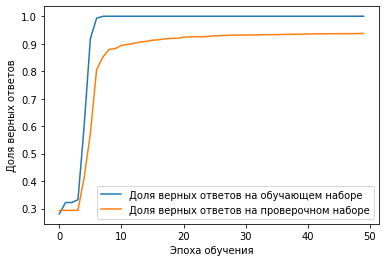

Train on 17628 samples, validate on 6663 samples
Epoch 1/50
17628/17628 [==============================] - 7s 418us/sample - loss: 1.7310 - acc: 0.3016 - val_loss: 1.7225 - val_acc: 0.2934
Epoch 2/50
17628/17628 [==============================] - 7s 406us/sample - loss: 1.6753 - acc: 0.3220 - val_loss: 1.7211 - val_acc: 0.2934
Epoch 3/50
17628/17628 [==============================] - 7s 406us/sample - loss: 1.6278 - acc: 0.3220 - val_loss: 1.6837 - val_acc: 0.2934
Epoch 4/50
17628/17628 [==============================] - 7s 406us/sample - loss: 1.4956 - acc: 0.3374 - val_loss: 1.5938 - val_acc: 0.2934
Epoch 5/50
17628/17628 [==============================] - 7s 407us/sample - loss: 1.2122 - acc: 0.6702 - val_loss: 1.4085 - val_acc: 0.4186
Epoch 6/50
17628/17628 [==============================] - 7s 406us/sample - loss: 0.8820 - acc: 0.9175 - val_loss: 1.2429 - val_acc: 0.6722
Epoch 7/50
17628/17628 [==============================] - 7s 403us/sample - loss: 0.6197 - acc: 0.9935 - val_lo

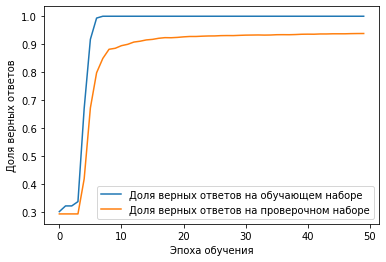

Train on 17628 samples, validate on 6663 samples
Epoch 1/50
17628/17628 [==============================] - 7s 388us/sample - loss: 1.7069 - acc: 0.3095 - val_loss: 1.7251 - val_acc: 0.2934
Epoch 2/50
17628/17628 [==============================] - 7s 369us/sample - loss: 1.6661 - acc: 0.3220 - val_loss: 1.7101 - val_acc: 0.2934
Epoch 3/50
17628/17628 [==============================] - 6s 367us/sample - loss: 1.5981 - acc: 0.3220 - val_loss: 1.6613 - val_acc: 0.2934
Epoch 4/50
17628/17628 [==============================] - 6s 364us/sample - loss: 1.4285 - acc: 0.4295 - val_loss: 1.5306 - val_acc: 0.3372
Epoch 5/50
17628/17628 [==============================] - 6s 351us/sample - loss: 1.1457 - acc: 0.7503 - val_loss: 1.3743 - val_acc: 0.4548
Epoch 6/50
17628/17628 [==============================] - 6s 350us/sample - loss: 0.8691 - acc: 0.9076 - val_loss: 1.2452 - val_acc: 0.5852
Epoch 7/50
17628/17628 [==============================] - 6s 349us/sample - loss: 0.6449 - acc: 0.9811 - val_lo

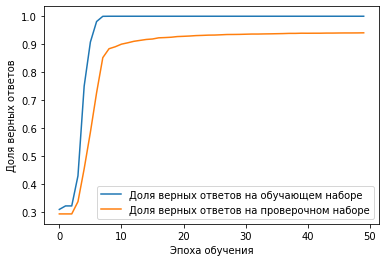

[[25, 30000, 1500, 100], [400, 'sigmoid', 600, 'sigmoid', 1000, 'sigmoid'], 'mean_train_acc = ', 0.9387]

Искл. индексы ниже =  25
Размер словаря      =  30000
Длинна отрезка      =  2000
Шаг смещения       =  100
Обучающая база  (17598, 30000)
Тестовая   база  (6633, 30000)
Train on 17598 samples, validate on 6633 samples
Epoch 1/50
17598/17598 [==============================] - 7s 417us/sample - loss: 1.7100 - acc: 0.3100 - val_loss: 1.7204 - val_acc: 0.2940
Epoch 2/50
17598/17598 [==============================] - 7s 404us/sample - loss: 1.6593 - acc: 0.3223 - val_loss: 1.7116 - val_acc: 0.2940
Epoch 3/50
17598/17598 [==============================] - 7s 407us/sample - loss: 1.5684 - acc: 0.3223 - val_loss: 1.6331 - val_acc: 0.2940
Epoch 4/50
17598/17598 [==============================] - 7s 414us/sample - loss: 1.3070 - acc: 0.5210 - val_loss: 1.4482 - val_acc: 0.3771
Epoch 5/50
17598/17598 [==============================] - 7s 412us/sample - loss: 0.9290 - acc: 0.8955 - val_loss: 

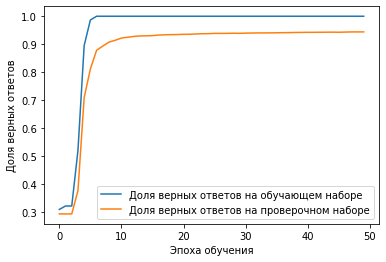

Train on 17598 samples, validate on 6633 samples
Epoch 1/50
17598/17598 [==============================] - 7s 404us/sample - loss: 1.7169 - acc: 0.2921 - val_loss: 1.7290 - val_acc: 0.2940
Epoch 2/50
17598/17598 [==============================] - 7s 389us/sample - loss: 1.6605 - acc: 0.3223 - val_loss: 1.7117 - val_acc: 0.2940
Epoch 3/50
17598/17598 [==============================] - 7s 389us/sample - loss: 1.5736 - acc: 0.3223 - val_loss: 1.6445 - val_acc: 0.2940
Epoch 4/50
17598/17598 [==============================] - 7s 391us/sample - loss: 1.3373 - acc: 0.4870 - val_loss: 1.4872 - val_acc: 0.3329
Epoch 5/50
17598/17598 [==============================] - 7s 392us/sample - loss: 0.9708 - acc: 0.9010 - val_loss: 1.2796 - val_acc: 0.5926
Epoch 6/50
17598/17598 [==============================] - 7s 391us/sample - loss: 0.6449 - acc: 0.9975 - val_loss: 1.0992 - val_acc: 0.8122
Epoch 7/50
17598/17598 [==============================] - 7s 391us/sample - loss: 0.4163 - acc: 1.0000 - val_lo

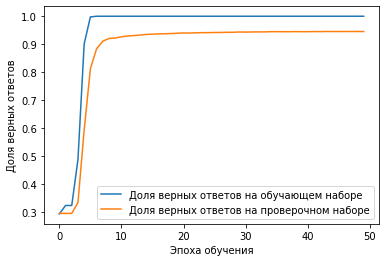

Train on 17598 samples, validate on 6633 samples
Epoch 1/50
17598/17598 [==============================] - 7s 398us/sample - loss: 1.7390 - acc: 0.2855 - val_loss: 1.7299 - val_acc: 0.2940
Epoch 2/50
17598/17598 [==============================] - 6s 368us/sample - loss: 1.6625 - acc: 0.3223 - val_loss: 1.7069 - val_acc: 0.2940
Epoch 3/50
17598/17598 [==============================] - 6s 363us/sample - loss: 1.5856 - acc: 0.3223 - val_loss: 1.6508 - val_acc: 0.2940
Epoch 4/50
17598/17598 [==============================] - 6s 360us/sample - loss: 1.3751 - acc: 0.4414 - val_loss: 1.4962 - val_acc: 0.3231
Epoch 5/50
17598/17598 [==============================] - 6s 361us/sample - loss: 1.0292 - acc: 0.8558 - val_loss: 1.3055 - val_acc: 0.5620
Epoch 6/50
17598/17598 [==============================] - 6s 366us/sample - loss: 0.7096 - acc: 0.9952 - val_loss: 1.1360 - val_acc: 0.7062
Epoch 7/50
17598/17598 [==============================] - 6s 362us/sample - loss: 0.4737 - acc: 1.0000 - val_lo

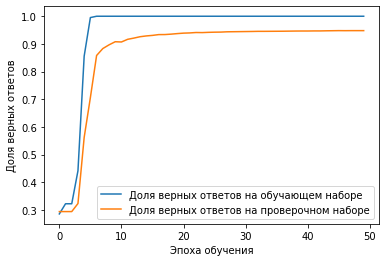

[[25, 30000, 2000, 100], [400, 'sigmoid', 600, 'sigmoid', 1000, 'sigmoid'], 'mean_train_acc = ', 0.9458]

Искл. индексы ниже =  25
Размер словаря      =  30000
Длинна отрезка      =  2500
Шаг смещения       =  100
Обучающая база  (17568, 30000)
Тестовая   база  (6603, 30000)
Train on 17568 samples, validate on 6603 samples
Epoch 1/50
17568/17568 [==============================] - 7s 418us/sample - loss: 1.7295 - acc: 0.2749 - val_loss: 1.7240 - val_acc: 0.2946
Epoch 2/50
17568/17568 [==============================] - 7s 396us/sample - loss: 1.6486 - acc: 0.3225 - val_loss: 1.6973 - val_acc: 0.2946
Epoch 3/50
17568/17568 [==============================] - 7s 390us/sample - loss: 1.5335 - acc: 0.3226 - val_loss: 1.6126 - val_acc: 0.2946
Epoch 4/50
17568/17568 [==============================] - 7s 386us/sample - loss: 1.2467 - acc: 0.5886 - val_loss: 1.4216 - val_acc: 0.3553
Epoch 5/50
17568/17568 [==============================] - 7s 388us/sample - loss: 0.8595 - acc: 0.9629 - val_loss: 

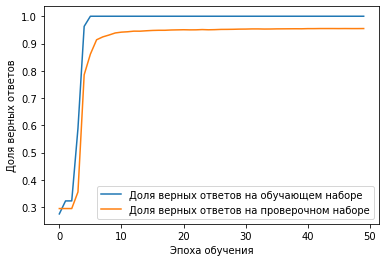

Train on 17568 samples, validate on 6603 samples
Epoch 1/50
17568/17568 [==============================] - 7s 413us/sample - loss: 1.7426 - acc: 0.2633 - val_loss: 1.7240 - val_acc: 0.2946
Epoch 2/50
17568/17568 [==============================] - 7s 387us/sample - loss: 1.6529 - acc: 0.3225 - val_loss: 1.7078 - val_acc: 0.2946
Epoch 3/50
17568/17568 [==============================] - 7s 384us/sample - loss: 1.5480 - acc: 0.3225 - val_loss: 1.6277 - val_acc: 0.2946
Epoch 4/50
17568/17568 [==============================] - 7s 385us/sample - loss: 1.2714 - acc: 0.5726 - val_loss: 1.4197 - val_acc: 0.4445
Epoch 5/50
17568/17568 [==============================] - 7s 382us/sample - loss: 0.8854 - acc: 0.9339 - val_loss: 1.2097 - val_acc: 0.7003
Epoch 6/50
17568/17568 [==============================] - 7s 382us/sample - loss: 0.5733 - acc: 0.9998 - val_loss: 1.0256 - val_acc: 0.8619
Epoch 7/50
17568/17568 [==============================] - 7s 386us/sample - loss: 0.3654 - acc: 1.0000 - val_lo

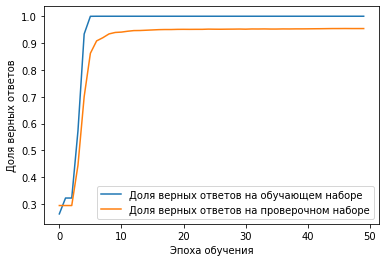

Train on 17568 samples, validate on 6603 samples
Epoch 1/50
17568/17568 [==============================] - 7s 414us/sample - loss: 1.7144 - acc: 0.2962 - val_loss: 1.7200 - val_acc: 0.2946
Epoch 2/50
17568/17568 [==============================] - 7s 380us/sample - loss: 1.6456 - acc: 0.3225 - val_loss: 1.6949 - val_acc: 0.2946
Epoch 3/50
17568/17568 [==============================] - 7s 381us/sample - loss: 1.5187 - acc: 0.3270 - val_loss: 1.5970 - val_acc: 0.2946
Epoch 4/50
17568/17568 [==============================] - 7s 385us/sample - loss: 1.2046 - acc: 0.6679 - val_loss: 1.3985 - val_acc: 0.4421
Epoch 5/50
17568/17568 [==============================] - 7s 382us/sample - loss: 0.8192 - acc: 0.9686 - val_loss: 1.1870 - val_acc: 0.7448
Epoch 6/50
17568/17568 [==============================] - 7s 378us/sample - loss: 0.5293 - acc: 0.9998 - val_loss: 1.0126 - val_acc: 0.8801
Epoch 7/50
17568/17568 [==============================] - 7s 379us/sample - loss: 0.3389 - acc: 1.0000 - val_lo

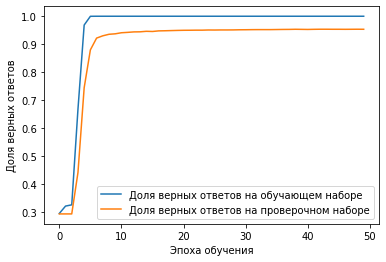

[[25, 30000, 2500, 100], [400, 'sigmoid', 600, 'sigmoid', 1000, 'sigmoid'], 'mean_train_acc = ', 0.9542]

Искл. индексы ниже =  25
Размер словаря      =  30000
Длинна отрезка      =  3000
Шаг смещения       =  100
Обучающая база  (17538, 30000)
Тестовая   база  (6573, 30000)
Train on 17538 samples, validate on 6573 samples
Epoch 1/50
17538/17538 [==============================] - 7s 424us/sample - loss: 1.7073 - acc: 0.2915 - val_loss: 1.7190 - val_acc: 0.2951
Epoch 2/50
17538/17538 [==============================] - 7s 401us/sample - loss: 1.6197 - acc: 0.3228 - val_loss: 1.6688 - val_acc: 0.2951
Epoch 3/50
17538/17538 [==============================] - 7s 401us/sample - loss: 1.4586 - acc: 0.3621 - val_loss: 1.5585 - val_acc: 0.2951
Epoch 4/50
17538/17538 [==============================] - 7s 399us/sample - loss: 1.1536 - acc: 0.7909 - val_loss: 1.3714 - val_acc: 0.4844
Epoch 5/50
17538/17538 [==============================] - 7s 401us/sample - loss: 0.8206 - acc: 0.9587 - val_loss: 

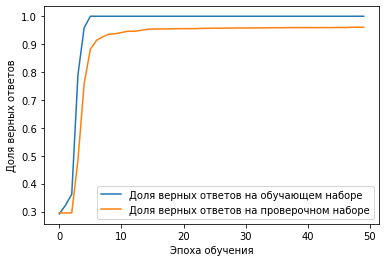

Train on 17538 samples, validate on 6573 samples
Epoch 1/50
17538/17538 [==============================] - 7s 401us/sample - loss: 1.6940 - acc: 0.3228 - val_loss: 1.7242 - val_acc: 0.2951
Epoch 2/50
17538/17538 [==============================] - 6s 365us/sample - loss: 1.6215 - acc: 0.3228 - val_loss: 1.6686 - val_acc: 0.2951
Epoch 3/50
17538/17538 [==============================] - 6s 363us/sample - loss: 1.4398 - acc: 0.4067 - val_loss: 1.5227 - val_acc: 0.3020
Epoch 4/50
17538/17538 [==============================] - 6s 355us/sample - loss: 1.1031 - acc: 0.8395 - val_loss: 1.3305 - val_acc: 0.4365
Epoch 5/50
17538/17538 [==============================] - 6s 353us/sample - loss: 0.7711 - acc: 0.9831 - val_loss: 1.1628 - val_acc: 0.7756
Epoch 6/50
17538/17538 [==============================] - 6s 350us/sample - loss: 0.5153 - acc: 1.0000 - val_loss: 1.0007 - val_acc: 0.8953
Epoch 7/50
17538/17538 [==============================] - 6s 351us/sample - loss: 0.3357 - acc: 1.0000 - val_lo

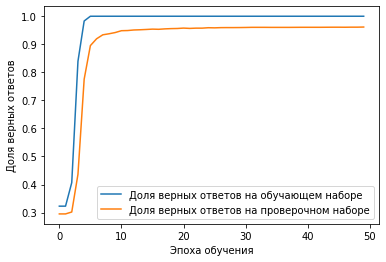

Train on 17538 samples, validate on 6573 samples
Epoch 1/50
17538/17538 [==============================] - 7s 419us/sample - loss: 1.7667 - acc: 0.2551 - val_loss: 1.7238 - val_acc: 0.2951
Epoch 2/50
17538/17538 [==============================] - 7s 385us/sample - loss: 1.6485 - acc: 0.3228 - val_loss: 1.6976 - val_acc: 0.2951
Epoch 3/50
17538/17538 [==============================] - 7s 379us/sample - loss: 1.5361 - acc: 0.3228 - val_loss: 1.6197 - val_acc: 0.2951
Epoch 4/50
17538/17538 [==============================] - 7s 377us/sample - loss: 1.2795 - acc: 0.5079 - val_loss: 1.4413 - val_acc: 0.3520
Epoch 5/50
17538/17538 [==============================] - 7s 378us/sample - loss: 0.9162 - acc: 0.9591 - val_loss: 1.2260 - val_acc: 0.6948
Epoch 6/50
17538/17538 [==============================] - 7s 371us/sample - loss: 0.6017 - acc: 0.9999 - val_loss: 1.0438 - val_acc: 0.8672
Epoch 7/50
17538/17538 [==============================] - 7s 372us/sample - loss: 0.3883 - acc: 1.0000 - val_lo

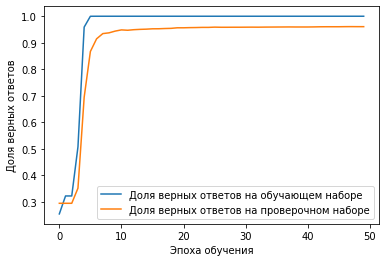

[[25, 30000, 3000, 100], [400, 'sigmoid', 600, 'sigmoid', 1000, 'sigmoid'], 'mean_train_acc = ', 0.961]

Искл. индексы ниже =  25
Размер словаря      =  30000
Длинна отрезка      =  3500
Шаг смещения       =  100
Обучающая база  (17508, 30000)
Тестовая   база  (6543, 30000)
Train on 17508 samples, validate on 6543 samples
Epoch 1/50
17508/17508 [==============================] - 7s 426us/sample - loss: 1.7482 - acc: 0.2672 - val_loss: 1.7125 - val_acc: 0.2957
Epoch 2/50
17508/17508 [==============================] - 7s 397us/sample - loss: 1.6209 - acc: 0.3231 - val_loss: 1.6780 - val_acc: 0.2957
Epoch 3/50
17508/17508 [==============================] - 7s 396us/sample - loss: 1.4440 - acc: 0.3614 - val_loss: 1.5472 - val_acc: 0.2957
Epoch 4/50
17508/17508 [==============================] - 7s 394us/sample - loss: 1.0896 - acc: 0.8176 - val_loss: 1.3285 - val_acc: 0.6173
Epoch 5/50
17508/17508 [==============================] - 7s 395us/sample - loss: 0.7161 - acc: 0.9985 - val_loss: 1

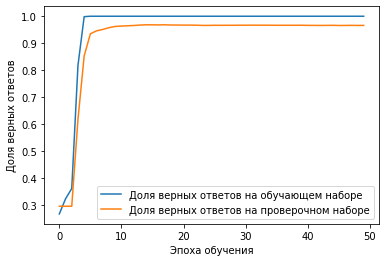

Train on 17508 samples, validate on 6543 samples
Epoch 1/50
17508/17508 [==============================] - 7s 399us/sample - loss: 1.7975 - acc: 0.1959 - val_loss: 1.7307 - val_acc: 0.2957
Epoch 2/50
17508/17508 [==============================] - 6s 369us/sample - loss: 1.6414 - acc: 0.3231 - val_loss: 1.6944 - val_acc: 0.2957
Epoch 3/50
17508/17508 [==============================] - 6s 369us/sample - loss: 1.5050 - acc: 0.3231 - val_loss: 1.5995 - val_acc: 0.2957
Epoch 4/50
17508/17508 [==============================] - 7s 372us/sample - loss: 1.1984 - acc: 0.6255 - val_loss: 1.3874 - val_acc: 0.4671
Epoch 5/50
17508/17508 [==============================] - 7s 372us/sample - loss: 0.8046 - acc: 0.9890 - val_loss: 1.1657 - val_acc: 0.7908
Epoch 6/50
17508/17508 [==============================] - 6s 370us/sample - loss: 0.4998 - acc: 1.0000 - val_loss: 0.9804 - val_acc: 0.9060
Epoch 7/50
17508/17508 [==============================] - 6s 370us/sample - loss: 0.3093 - acc: 1.0000 - val_lo

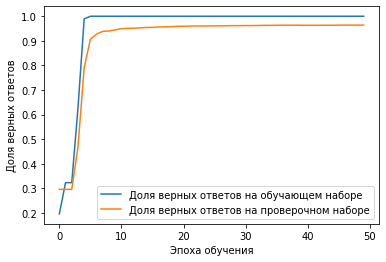

Train on 17508 samples, validate on 6543 samples
Epoch 1/50
17508/17508 [==============================] - 7s 409us/sample - loss: 1.7041 - acc: 0.2946 - val_loss: 1.7105 - val_acc: 0.2957
Epoch 2/50
17508/17508 [==============================] - 7s 375us/sample - loss: 1.6105 - acc: 0.3231 - val_loss: 1.6783 - val_acc: 0.2957
Epoch 3/50
17508/17508 [==============================] - 7s 376us/sample - loss: 1.4004 - acc: 0.3914 - val_loss: 1.5117 - val_acc: 0.2971
Epoch 4/50
17508/17508 [==============================] - 7s 376us/sample - loss: 1.0060 - acc: 0.8814 - val_loss: 1.2762 - val_acc: 0.6477
Epoch 5/50
17508/17508 [==============================] - 7s 372us/sample - loss: 0.6315 - acc: 0.9997 - val_loss: 1.0639 - val_acc: 0.8799
Epoch 6/50
17508/17508 [==============================] - 6s 368us/sample - loss: 0.3850 - acc: 1.0000 - val_loss: 0.8976 - val_acc: 0.9297
Epoch 7/50
17508/17508 [==============================] - 6s 367us/sample - loss: 0.2415 - acc: 1.0000 - val_lo

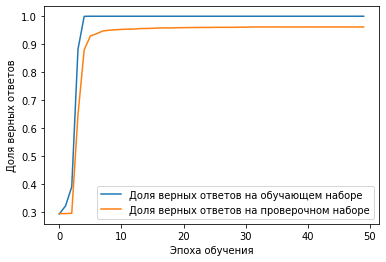

[[25, 30000, 3500, 100], [400, 'sigmoid', 600, 'sigmoid', 1000, 'sigmoid'], 'mean_train_acc = ', 0.9639]

Искл. индексы ниже =  25
Размер словаря      =  30000
Длинна отрезка      =  4000
Шаг смещения       =  100
Обучающая база  (17478, 30000)
Тестовая   база  (6513, 30000)
Train on 17478 samples, validate on 6513 samples
Epoch 1/50
17478/17478 [==============================] - 8s 434us/sample - loss: 1.7118 - acc: 0.2836 - val_loss: 1.7110 - val_acc: 0.2963
Epoch 2/50
17478/17478 [==============================] - 7s 399us/sample - loss: 1.6055 - acc: 0.3233 - val_loss: 1.6610 - val_acc: 0.2963
Epoch 3/50
17478/17478 [==============================] - 7s 394us/sample - loss: 1.3616 - acc: 0.4366 - val_loss: 1.4645 - val_acc: 0.3224
Epoch 4/50
17478/17478 [==============================] - 7s 392us/sample - loss: 0.9291 - acc: 0.9316 - val_loss: 1.2005 - val_acc: 0.7740
Epoch 5/50
17478/17478 [==============================] - 7s 392us/sample - loss: 0.5632 - acc: 1.0000 - val_loss: 

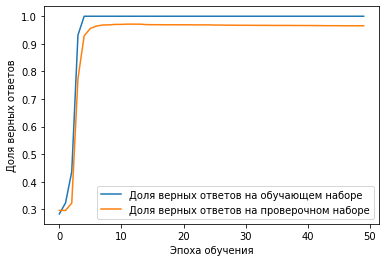

Train on 17478 samples, validate on 6513 samples
Epoch 1/50
17478/17478 [==============================] - 8s 435us/sample - loss: 1.7173 - acc: 0.3027 - val_loss: 1.7218 - val_acc: 0.2963
Epoch 2/50
17478/17478 [==============================] - 7s 400us/sample - loss: 1.6086 - acc: 0.3233 - val_loss: 1.6773 - val_acc: 0.2963
Epoch 3/50
17478/17478 [==============================] - 7s 399us/sample - loss: 1.3817 - acc: 0.3939 - val_loss: 1.5024 - val_acc: 0.2963
Epoch 4/50
17478/17478 [==============================] - 7s 399us/sample - loss: 0.9408 - acc: 0.9190 - val_loss: 1.2255 - val_acc: 0.7023
Epoch 5/50
17478/17478 [==============================] - 7s 400us/sample - loss: 0.5524 - acc: 1.0000 - val_loss: 1.0071 - val_acc: 0.8967
Epoch 6/50
17478/17478 [==============================] - 7s 398us/sample - loss: 0.3247 - acc: 1.0000 - val_loss: 0.8413 - val_acc: 0.9381
Epoch 7/50
17478/17478 [==============================] - 7s 401us/sample - loss: 0.2024 - acc: 1.0000 - val_lo

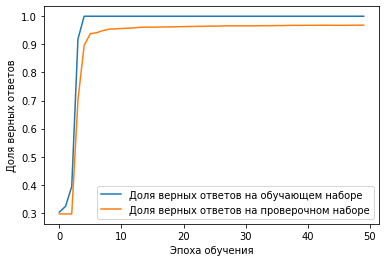

Train on 17478 samples, validate on 6513 samples
Epoch 1/50
17478/17478 [==============================] - 8s 432us/sample - loss: 1.7521 - acc: 0.2531 - val_loss: 1.7145 - val_acc: 0.2963
Epoch 2/50
17478/17478 [==============================] - 7s 396us/sample - loss: 1.6170 - acc: 0.3233 - val_loss: 1.6723 - val_acc: 0.2963
Epoch 3/50
17478/17478 [==============================] - 7s 398us/sample - loss: 1.4321 - acc: 0.3449 - val_loss: 1.5465 - val_acc: 0.2963
Epoch 4/50
17478/17478 [==============================] - 7s 390us/sample - loss: 1.0574 - acc: 0.8138 - val_loss: 1.3019 - val_acc: 0.6237
Epoch 5/50
17478/17478 [==============================] - 7s 387us/sample - loss: 0.6638 - acc: 0.9977 - val_loss: 1.0794 - val_acc: 0.8460
Epoch 6/50
17478/17478 [==============================] - 7s 387us/sample - loss: 0.3992 - acc: 1.0000 - val_loss: 0.8986 - val_acc: 0.9200
Epoch 7/50
17478/17478 [==============================] - 7s 388us/sample - loss: 0.2476 - acc: 1.0000 - val_lo

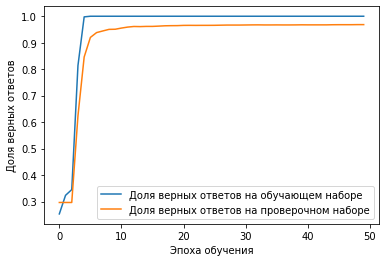

[[25, 30000, 4000, 100], [400, 'sigmoid', 600, 'sigmoid', 1000, 'sigmoid'], 'mean_train_acc = ', 0.9673]

Искл. индексы ниже =  25
Размер словаря      =  30000
Длинна отрезка      =  4500
Шаг смещения       =  100
Обучающая база  (17448, 30000)
Тестовая   база  (6483, 30000)
Train on 17448 samples, validate on 6483 samples
Epoch 1/50
17448/17448 [==============================] - 8s 442us/sample - loss: 1.7952 - acc: 0.2534 - val_loss: 1.7176 - val_acc: 0.2969
Epoch 2/50
17448/17448 [==============================] - 7s 390us/sample - loss: 1.6107 - acc: 0.3236 - val_loss: 1.6691 - val_acc: 0.2969
Epoch 3/50
17448/17448 [==============================] - 7s 391us/sample - loss: 1.4157 - acc: 0.3726 - val_loss: 1.5330 - val_acc: 0.2969
Epoch 4/50
17448/17448 [==============================] - 7s 396us/sample - loss: 1.0599 - acc: 0.8320 - val_loss: 1.3090 - val_acc: 0.6620
Epoch 5/50
17448/17448 [==============================] - 7s 391us/sample - loss: 0.6939 - acc: 0.9847 - val_loss: 

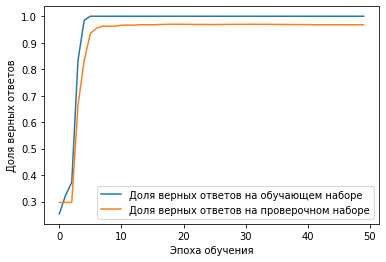

Train on 17448 samples, validate on 6483 samples
Epoch 1/50
17448/17448 [==============================] - 8s 436us/sample - loss: 1.6918 - acc: 0.3236 - val_loss: 1.7176 - val_acc: 0.2969
Epoch 2/50
17448/17448 [==============================] - 7s 386us/sample - loss: 1.5832 - acc: 0.3236 - val_loss: 1.6455 - val_acc: 0.2969
Epoch 3/50
17448/17448 [==============================] - 7s 388us/sample - loss: 1.2999 - acc: 0.5160 - val_loss: 1.4376 - val_acc: 0.3501
Epoch 4/50
17448/17448 [==============================] - 7s 384us/sample - loss: 0.8542 - acc: 0.9473 - val_loss: 1.1746 - val_acc: 0.7962
Epoch 5/50
17448/17448 [==============================] - 7s 386us/sample - loss: 0.5034 - acc: 1.0000 - val_loss: 0.9606 - val_acc: 0.9422
Epoch 6/50
17448/17448 [==============================] - 7s 382us/sample - loss: 0.2994 - acc: 1.0000 - val_loss: 0.8026 - val_acc: 0.9573
Epoch 7/50
17448/17448 [==============================] - 7s 375us/sample - loss: 0.1885 - acc: 1.0000 - val_lo

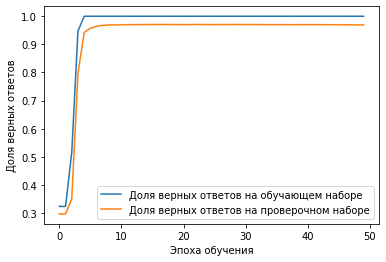

Train on 17448 samples, validate on 6483 samples
Epoch 1/50
17448/17448 [==============================] - 7s 409us/sample - loss: 1.7372 - acc: 0.2591 - val_loss: 1.7136 - val_acc: 0.2969
Epoch 2/50
17448/17448 [==============================] - 6s 363us/sample - loss: 1.5962 - acc: 0.3236 - val_loss: 1.6593 - val_acc: 0.2969
Epoch 3/50
17448/17448 [==============================] - 6s 366us/sample - loss: 1.3723 - acc: 0.4041 - val_loss: 1.4933 - val_acc: 0.2975
Epoch 4/50
17448/17448 [==============================] - 6s 369us/sample - loss: 0.9804 - acc: 0.8869 - val_loss: 1.2446 - val_acc: 0.7111
Epoch 5/50
17448/17448 [==============================] - 6s 362us/sample - loss: 0.6134 - acc: 0.9974 - val_loss: 1.0281 - val_acc: 0.8920
Epoch 6/50
17448/17448 [==============================] - 6s 359us/sample - loss: 0.3763 - acc: 1.0000 - val_loss: 0.8664 - val_acc: 0.9434
Epoch 7/50
17448/17448 [==============================] - 6s 359us/sample - loss: 0.2394 - acc: 1.0000 - val_lo

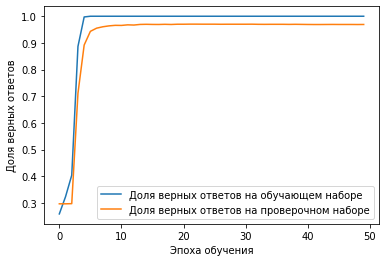

[[25, 30000, 4500, 100], [400, 'sigmoid', 600, 'sigmoid', 1000, 'sigmoid'], 'mean_train_acc = ', 0.9686]

Искл. индексы ниже =  25
Размер словаря      =  30000
Длинна отрезка      =  5000
Шаг смещения       =  100
Обучающая база  (17418, 30000)
Тестовая   база  (6453, 30000)
Train on 17418 samples, validate on 6453 samples
Epoch 1/50
17418/17418 [==============================] - 8s 455us/sample - loss: 1.7429 - acc: 0.2586 - val_loss: 1.7195 - val_acc: 0.2975
Epoch 2/50
17418/17418 [==============================] - 7s 401us/sample - loss: 1.5973 - acc: 0.3239 - val_loss: 1.6659 - val_acc: 0.2975
Epoch 3/50
17418/17418 [==============================] - 7s 398us/sample - loss: 1.3466 - acc: 0.4120 - val_loss: 1.4728 - val_acc: 0.2997
Epoch 4/50
17418/17418 [==============================] - 7s 401us/sample - loss: 0.8918 - acc: 0.9230 - val_loss: 1.1793 - val_acc: 0.7423
Epoch 5/50
17418/17418 [==============================] - 7s 405us/sample - loss: 0.5182 - acc: 1.0000 - val_loss: 

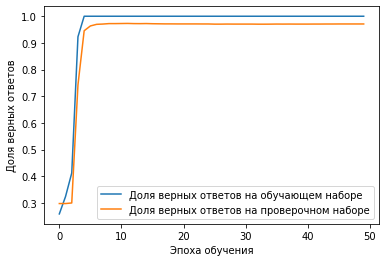

Train on 17418 samples, validate on 6453 samples
Epoch 1/50
17418/17418 [==============================] - 8s 453us/sample - loss: 1.7135 - acc: 0.2850 - val_loss: 1.7005 - val_acc: 0.2975
Epoch 2/50
17418/17418 [==============================] - 7s 396us/sample - loss: 1.5693 - acc: 0.3239 - val_loss: 1.6340 - val_acc: 0.2975
Epoch 3/50
17418/17418 [==============================] - 7s 396us/sample - loss: 1.3090 - acc: 0.4808 - val_loss: 1.4534 - val_acc: 0.3020
Epoch 4/50
17418/17418 [==============================] - 7s 397us/sample - loss: 0.9061 - acc: 0.9548 - val_loss: 1.2189 - val_acc: 0.7330
Epoch 5/50
17418/17418 [==============================] - 7s 400us/sample - loss: 0.5609 - acc: 1.0000 - val_loss: 1.0027 - val_acc: 0.9186
Epoch 6/50
17418/17418 [==============================] - 7s 399us/sample - loss: 0.3439 - acc: 1.0000 - val_loss: 0.8369 - val_acc: 0.9498
Epoch 7/50
17418/17418 [==============================] - 7s 398us/sample - loss: 0.2191 - acc: 1.0000 - val_lo

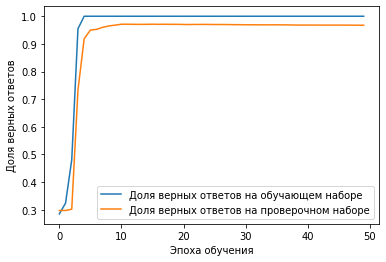

Train on 17418 samples, validate on 6453 samples
Epoch 1/50
17418/17418 [==============================] - 8s 454us/sample - loss: 1.7044 - acc: 0.2849 - val_loss: 1.7063 - val_acc: 0.2975
Epoch 2/50
17418/17418 [==============================] - 7s 397us/sample - loss: 1.5729 - acc: 0.3239 - val_loss: 1.6334 - val_acc: 0.2975
Epoch 3/50
17418/17418 [==============================] - 7s 394us/sample - loss: 1.2682 - acc: 0.5614 - val_loss: 1.4040 - val_acc: 0.4175
Epoch 4/50
17418/17418 [==============================] - 7s 382us/sample - loss: 0.8116 - acc: 0.9737 - val_loss: 1.1441 - val_acc: 0.8379
Epoch 5/50
17418/17418 [==============================] - 7s 386us/sample - loss: 0.4774 - acc: 1.0000 - val_loss: 0.9389 - val_acc: 0.9475
Epoch 6/50
17418/17418 [==============================] - 7s 384us/sample - loss: 0.2883 - acc: 1.0000 - val_loss: 0.7787 - val_acc: 0.9636
Epoch 7/50
17418/17418 [==============================] - 7s 383us/sample - loss: 0.1850 - acc: 1.0000 - val_lo

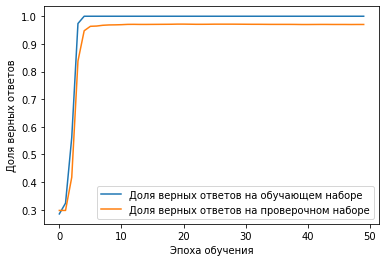

[[25, 30000, 5000, 100], [400, 'sigmoid', 600, 'sigmoid', 1000, 'sigmoid'], 'mean_train_acc = ', 0.9696]

Результаты тестирования архитектуры данных
[[25, 30000, 1500, 100], [400, 'sigmoid', 600, 'sigmoid', 1000, 'sigmoid'], 'mean_train_acc = ', 0.9387]
[[25, 30000, 2000, 100], [400, 'sigmoid', 600, 'sigmoid', 1000, 'sigmoid'], 'mean_train_acc = ', 0.9458]
[[25, 30000, 2500, 100], [400, 'sigmoid', 600, 'sigmoid', 1000, 'sigmoid'], 'mean_train_acc = ', 0.9542]
[[25, 30000, 3000, 100], [400, 'sigmoid', 600, 'sigmoid', 1000, 'sigmoid'], 'mean_train_acc = ', 0.961]
[[25, 30000, 3500, 100], [400, 'sigmoid', 600, 'sigmoid', 1000, 'sigmoid'], 'mean_train_acc = ', 0.9639]
[[25, 30000, 4000, 100], [400, 'sigmoid', 600, 'sigmoid', 1000, 'sigmoid'], 'mean_train_acc = ', 0.9673]
[[25, 30000, 4500, 100], [400, 'sigmoid', 600, 'sigmoid', 1000, 'sigmoid'], 'mean_train_acc = ', 0.9686]
[[25, 30000, 5000, 100], [400, 'sigmoid', 600, 'sigmoid', 1000, 'sigmoid'], 'mean_train_acc = ', 0.9696]


In [0]:
#Обучаем сеть и выводим среднюю точность на проверочной выборке по 3 запускам
for currData in data:
  # Создаем обучающие и тестовые данные
  xTrain, xTrain01, yTrain, xTest, xTest01, yTest = get_data(*currData)
  # Тестируем формат данных на сети
  net = [400, 'sigmoid', 600, 'sigmoid', 1000, 'sigmoid']
  acc = testModel(net, batch_size = 128, epochs = 50, iterations = 3)
  list_test_data.append([currData, net, 'mean_train_acc = ', round(sum(acc)/len(acc),4)])
  print(list_test_data[-1])
  print('='*100)
  print()

print('Результаты тестирования архитектуры данных')
for i in list_test_data:
  print(i)

[[0, 5000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.899]

[[0, 10000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9109]

[[0, 15000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9205]

[[0, 20000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9197]

[[0, 25000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9227]

[[0, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9245]

[[0, 40000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9114]

[[0, 50000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'] 
'mean_train_acc = ', 0.9091]

### Вывод наилучший результат показал размер словаря в 30000 слов
[[0, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9245]

### Проверим нижнюю границу словаря


In [0]:
# Список для записи результатов тестирования
list_test_data = []
#Создаём различные форматы данных
# формат данных - (low_ind_dict = 0, size_dict = 20000, len_cut = 1000, step = 100)
data = []
data.append([0, 30000, 1000, 100])
data.append([10, 30000, 1000, 100])
data.append([25, 30000, 1000, 100])
data.append([50, 30000, 1000, 100])
data.append([100, 30000, 1000, 100])
data.append([1000, 30000, 1000, 100])
data.append([5000, 30000, 1000, 100])


Искл. индексы ниже =  0
Размер словаря      =  30000
Длинна отрезка      =  1000
Шаг смещения       =  100
Обучающая база  (17658, 30000)
Тестовая   база  (6693, 30000)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 314us/sample - loss: 0.1361 - acc: 0.9499 - val_loss: 0.4179 - val_acc: 0.8997
Epoch 2/35
17658/17658 [==============================] - 4s 214us/sample - loss: 0.0030 - acc: 1.0000 - val_loss: 0.3816 - val_acc: 0.9029
Epoch 3/35
17658/17658 [==============================] - 4s 211us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3590 - val_acc: 0.9066
Epoch 4/35
17658/17658 [==============================] - 4s 213us/sample - loss: 9.0414e-04 - acc: 1.0000 - val_loss: 0.3433 - val_acc: 0.9077
Epoch 5/35
17658/17658 [===================

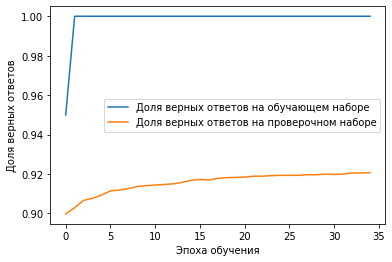

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 4s 228us/sample - loss: 0.1244 - acc: 0.9580 - val_loss: 0.4114 - val_acc: 0.8953
Epoch 2/35
17658/17658 [==============================] - 4s 223us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 0.3726 - val_acc: 0.9026
Epoch 3/35
17658/17658 [==============================] - 4s 225us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3498 - val_acc: 0.9060
Epoch 4/35
17658/17658 [==============================] - 4s 222us/sample - loss: 8.3765e-04 - acc: 1.0000 - val_loss: 0.3352 - val_acc: 0.9096
Epoch 5/35
17658/17658 [==============================] - 4s 225us/sample - loss: 5.7378e-04 - acc: 1.0000 - val_loss: 0.3247 - val_acc: 0.9107
Epoch 6/35
17658/17658 [==============================] - 4s 221us/sample - loss: 4.2016e-04 - acc: 1.0000 - val_loss: 0.3156 - val_acc: 0.9121
Epoch 7/35
17658/17658 [==============================] - 4s 237us/sample - loss: 3.2191e-04 - acc:

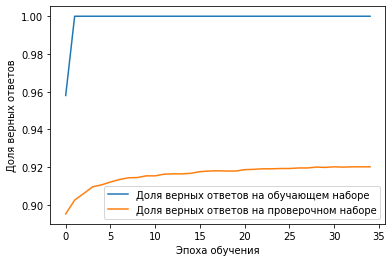

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 4s 228us/sample - loss: 0.1340 - acc: 0.9523 - val_loss: 0.4153 - val_acc: 0.8991
Epoch 2/35
17658/17658 [==============================] - 4s 224us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3784 - val_acc: 0.9032
Epoch 3/35
17658/17658 [==============================] - 4s 225us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3552 - val_acc: 0.9077
Epoch 4/35
17658/17658 [==============================] - 4s 226us/sample - loss: 8.7694e-04 - acc: 1.0000 - val_loss: 0.3393 - val_acc: 0.9098
Epoch 5/35
17658/17658 [==============================] - 4s 229us/sample - loss: 6.0150e-04 - acc: 1.0000 - val_loss: 0.3271 - val_acc: 0.9121
Epoch 6/35
17658/17658 [==============================] - 4s 221us/sample - loss: 4.4084e-04 - acc: 1.0000 - val_loss: 0.3180 - val_acc: 0.9132
Epoch 7/35
17658/17658 [==============================] - 4s 222us/sample - loss: 3.3797e-04 - acc:

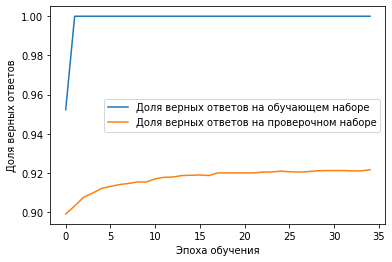

[[0, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9209]

Искл. индексы ниже =  10
Размер словаря      =  30000
Длинна отрезка      =  1000
Шаг смещения       =  100
Обучающая база  (17658, 30000)
Тестовая   база  (6693, 30000)
Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 5s 261us/sample - loss: 0.1144 - acc: 0.9670 - val_loss: 0.4058 - val_acc: 0.9099
Epoch 2/35
17658/17658 [==============================] - 4s 251us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3683 - val_acc: 0.9124
Epoch 3/35
17658/17658 [==============================] - 4s 252us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3448 - val_acc: 0.9168
Epoch 4/35
17658/17658 [==============================] - 4s 251us/sample - loss: 8.3199e-04 - acc: 1.0000 - val_loss: 0.3318 - val_acc: 0.9162
Epoch 5/35
17658/17658 [==============================] - 4s 251us/sample - loss: 5.6827e-04 - acc: 1.0000 - val_loss: 0.31

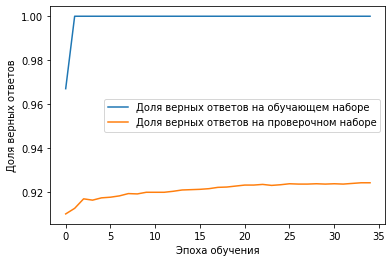

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 4s 246us/sample - loss: 0.1360 - acc: 0.9516 - val_loss: 0.4148 - val_acc: 0.9021
Epoch 2/35
17658/17658 [==============================] - 4s 248us/sample - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3734 - val_acc: 0.9104
Epoch 3/35
17658/17658 [==============================] - 4s 242us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3501 - val_acc: 0.9133
Epoch 4/35
17658/17658 [==============================] - 4s 243us/sample - loss: 9.0256e-04 - acc: 1.0000 - val_loss: 0.3341 - val_acc: 0.9159
Epoch 5/35
17658/17658 [==============================] - 4s 241us/sample - loss: 6.1893e-04 - acc: 1.0000 - val_loss: 0.3231 - val_acc: 0.9157
Epoch 6/35
17658/17658 [==============================] - 4s 238us/sample - loss: 4.5365e-04 - acc: 1.0000 - val_loss: 0.3121 - val_acc: 0.9181
Epoch 7/35
17658/17658 [==============================] - 4s 240us/sample - loss: 3.4781e-04 - acc:

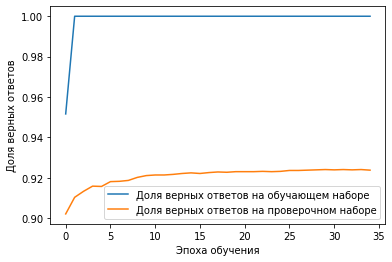

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 4s 248us/sample - loss: 0.1296 - acc: 0.9563 - val_loss: 0.4054 - val_acc: 0.9051
Epoch 2/35
17658/17658 [==============================] - 4s 240us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3664 - val_acc: 0.9114
Epoch 3/35
17658/17658 [==============================] - 4s 238us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3440 - val_acc: 0.9135
Epoch 4/35
17658/17658 [==============================] - 4s 241us/sample - loss: 8.5228e-04 - acc: 1.0000 - val_loss: 0.3298 - val_acc: 0.9139
Epoch 5/35
17658/17658 [==============================] - 4s 240us/sample - loss: 5.8143e-04 - acc: 1.0000 - val_loss: 0.3183 - val_acc: 0.9153
Epoch 6/35
17658/17658 [==============================] - 4s 251us/sample - loss: 4.2461e-04 - acc: 1.0000 - val_loss: 0.3091 - val_acc: 0.9168
Epoch 7/35
17658/17658 [==============================] - 4s 239us/sample - loss: 3.2486e-04 - acc:

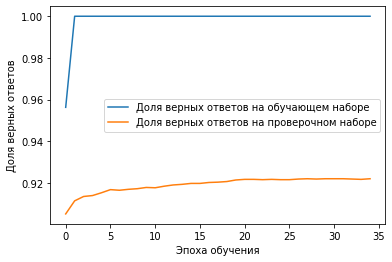

[[10, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9233]

Искл. индексы ниже =  25
Размер словаря      =  30000
Длинна отрезка      =  1000
Шаг смещения       =  100
Обучающая база  (17658, 30000)
Тестовая   база  (6693, 30000)
Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 5s 263us/sample - loss: 0.1333 - acc: 0.9568 - val_loss: 0.4212 - val_acc: 0.9057
Epoch 2/35
17658/17658 [==============================] - 4s 252us/sample - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3802 - val_acc: 0.9111
Epoch 3/35
17658/17658 [==============================] - 4s 245us/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 0.3578 - val_acc: 0.9127
Epoch 4/35
17658/17658 [==============================] - 4s 247us/sample - loss: 9.5440e-04 - acc: 1.0000 - val_loss: 0.3394 - val_acc: 0.9145
Epoch 5/35
17658/17658 [==============================] - 4s 248us/sample - loss: 6.5283e-04 - acc: 1.0000 - val_loss: 0.3

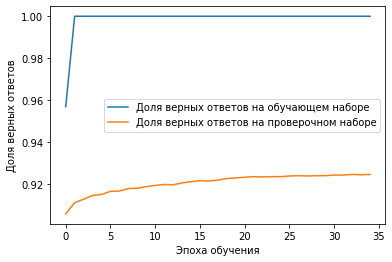

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 4s 254us/sample - loss: 0.1185 - acc: 0.9649 - val_loss: 0.4062 - val_acc: 0.9029
Epoch 2/35
17658/17658 [==============================] - 4s 241us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 0.3644 - val_acc: 0.9138
Epoch 3/35
17658/17658 [==============================] - 4s 239us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.3437 - val_acc: 0.9154
Epoch 4/35
17658/17658 [==============================] - 4s 241us/sample - loss: 8.2517e-04 - acc: 1.0000 - val_loss: 0.3298 - val_acc: 0.9169
Epoch 5/35
17658/17658 [==============================] - 4s 241us/sample - loss: 5.6371e-04 - acc: 1.0000 - val_loss: 0.3169 - val_acc: 0.9190
Epoch 6/35
17658/17658 [==============================] - 4s 239us/sample - loss: 4.1225e-04 - acc: 1.0000 - val_loss: 0.3079 - val_acc: 0.9205
Epoch 7/35
17658/17658 [==============================] - 4s 238us/sample - loss: 3.1561e-04 - acc:

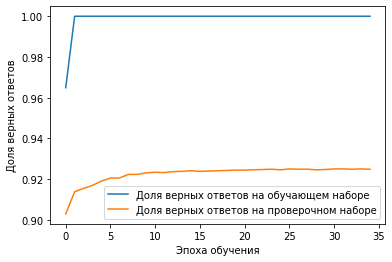

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 4s 251us/sample - loss: 0.1397 - acc: 0.9493 - val_loss: 0.4185 - val_acc: 0.8974
Epoch 2/35
17658/17658 [==============================] - 4s 237us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3797 - val_acc: 0.9029
Epoch 3/35
17658/17658 [==============================] - 4s 247us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3541 - val_acc: 0.9078
Epoch 4/35
17658/17658 [==============================] - 4s 244us/sample - loss: 8.5751e-04 - acc: 1.0000 - val_loss: 0.3416 - val_acc: 0.9075
Epoch 5/35
17658/17658 [==============================] - 4s 235us/sample - loss: 5.8585e-04 - acc: 1.0000 - val_loss: 0.3298 - val_acc: 0.9099
Epoch 6/35
17658/17658 [==============================] - 4s 232us/sample - loss: 4.2825e-04 - acc: 1.0000 - val_loss: 0.3200 - val_acc: 0.9110
Epoch 7/35
17658/17658 [==============================] - 4s 232us/sample - loss: 3.2773e-04 - acc:

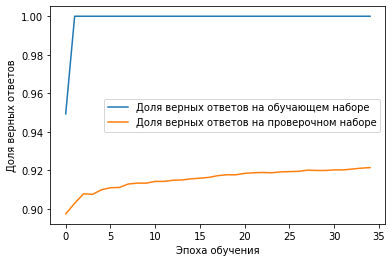

[[25, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9236]

Искл. индексы ниже =  50
Размер словаря      =  30000
Длинна отрезка      =  1000
Шаг смещения       =  100
Обучающая база  (17658, 30000)
Тестовая   база  (6693, 30000)
Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 5s 261us/sample - loss: 0.1520 - acc: 0.9414 - val_loss: 0.4181 - val_acc: 0.8953
Epoch 2/35
17658/17658 [==============================] - 4s 247us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 0.3844 - val_acc: 0.8960
Epoch 3/35
17658/17658 [==============================] - 4s 247us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.3616 - val_acc: 0.8990
Epoch 4/35
17658/17658 [==============================] - 4s 244us/sample - loss: 8.2796e-04 - acc: 1.0000 - val_loss: 0.3448 - val_acc: 0.9033
Epoch 5/35
17658/17658 [==============================] - 4s 243us/sample - loss: 5.6853e-04 - acc: 1.0000 - val_loss: 0.3

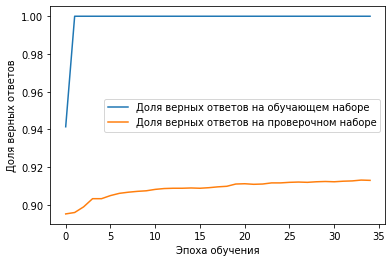

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 4s 252us/sample - loss: 0.1112 - acc: 0.9686 - val_loss: 0.4037 - val_acc: 0.9036
Epoch 2/35
17658/17658 [==============================] - 4s 236us/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3702 - val_acc: 0.9093
Epoch 3/35
17658/17658 [==============================] - 4s 242us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.3486 - val_acc: 0.9114
Epoch 4/35
17658/17658 [==============================] - 4s 243us/sample - loss: 8.0020e-04 - acc: 1.0000 - val_loss: 0.3313 - val_acc: 0.9136
Epoch 5/35
17658/17658 [==============================] - 4s 238us/sample - loss: 5.4758e-04 - acc: 1.0000 - val_loss: 0.3206 - val_acc: 0.9151
Epoch 6/35
17658/17658 [==============================] - 4s 237us/sample - loss: 4.0046e-04 - acc: 1.0000 - val_loss: 0.3123 - val_acc: 0.9162
Epoch 7/35
17658/17658 [==============================] - 4s 237us/sample - loss: 3.0658e-04 - acc:

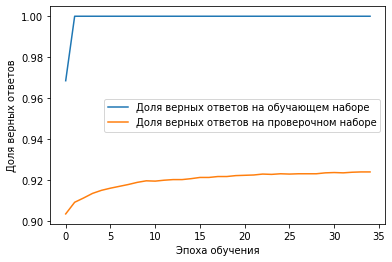

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 5s 261us/sample - loss: 0.1251 - acc: 0.9593 - val_loss: 0.3986 - val_acc: 0.9090
Epoch 2/35
17658/17658 [==============================] - 4s 237us/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3627 - val_acc: 0.9139
Epoch 3/35
17658/17658 [==============================] - 4s 239us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.3436 - val_acc: 0.9132
Epoch 4/35
17658/17658 [==============================] - 4s 241us/sample - loss: 8.1381e-04 - acc: 1.0000 - val_loss: 0.3293 - val_acc: 0.9153
Epoch 5/35
17658/17658 [==============================] - 4s 237us/sample - loss: 5.5773e-04 - acc: 1.0000 - val_loss: 0.3172 - val_acc: 0.9160
Epoch 6/35
17658/17658 [==============================] - 4s 238us/sample - loss: 4.0865e-04 - acc: 1.0000 - val_loss: 0.3085 - val_acc: 0.9181
Epoch 7/35
17658/17658 [==============================] - 4s 240us/sample - loss: 3.1332e-04 - acc:

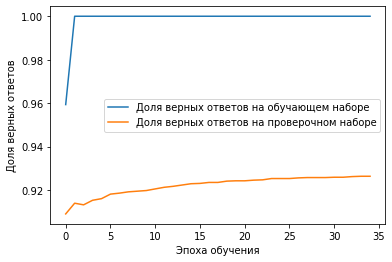

[[50, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9212]

Искл. индексы ниже =  100
Размер словаря      =  30000
Длинна отрезка      =  1000
Шаг смещения       =  100
Обучающая база  (17658, 30000)
Тестовая   база  (6693, 30000)
Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 4s 247us/sample - loss: 0.1249 - acc: 0.9586 - val_loss: 0.4165 - val_acc: 0.9053
Epoch 2/35
17658/17658 [==============================] - 4s 234us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 0.3774 - val_acc: 0.9102
Epoch 3/35
17658/17658 [==============================] - 4s 233us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.3530 - val_acc: 0.9144
Epoch 4/35
17658/17658 [==============================] - 4s 229us/sample - loss: 8.2430e-04 - acc: 1.0000 - val_loss: 0.3375 - val_acc: 0.9162
Epoch 5/35
17658/17658 [==============================] - 4s 230us/sample - loss: 5.6390e-04 - acc: 1.0000 - val_loss: 0.

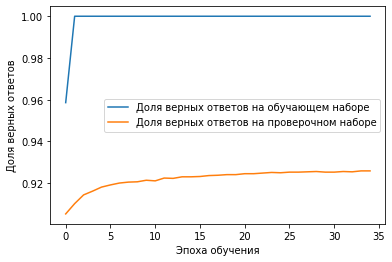

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 4s 246us/sample - loss: 0.1196 - acc: 0.9653 - val_loss: 0.4084 - val_acc: 0.9033
Epoch 2/35
17658/17658 [==============================] - 4s 228us/sample - loss: 0.0025 - acc: 1.0000 - val_loss: 0.3732 - val_acc: 0.9074
Epoch 3/35
17658/17658 [==============================] - 4s 228us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.3507 - val_acc: 0.9115
Epoch 4/35
17658/17658 [==============================] - 4s 228us/sample - loss: 7.7857e-04 - acc: 1.0000 - val_loss: 0.3355 - val_acc: 0.9141
Epoch 5/35
17658/17658 [==============================] - 4s 228us/sample - loss: 5.3286e-04 - acc: 1.0000 - val_loss: 0.3244 - val_acc: 0.9154
Epoch 6/35
17658/17658 [==============================] - 4s 230us/sample - loss: 3.8982e-04 - acc: 1.0000 - val_loss: 0.3169 - val_acc: 0.9159
Epoch 7/35
17658/17658 [==============================] - 4s 231us/sample - loss: 2.9845e-04 - acc:

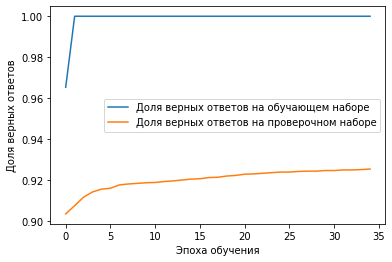

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 4s 250us/sample - loss: 0.1233 - acc: 0.9585 - val_loss: 0.4171 - val_acc: 0.9023
Epoch 2/35
17658/17658 [==============================] - 4s 231us/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3830 - val_acc: 0.9066
Epoch 3/35
17658/17658 [==============================] - 4s 230us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.3604 - val_acc: 0.9095
Epoch 4/35
17658/17658 [==============================] - 4s 230us/sample - loss: 8.1542e-04 - acc: 1.0000 - val_loss: 0.3454 - val_acc: 0.9111
Epoch 5/35
17658/17658 [==============================] - 4s 230us/sample - loss: 5.6039e-04 - acc: 1.0000 - val_loss: 0.3339 - val_acc: 0.9127
Epoch 6/35
17658/17658 [==============================] - 4s 229us/sample - loss: 4.1115e-04 - acc: 1.0000 - val_loss: 0.3247 - val_acc: 0.9136
Epoch 7/35
17658/17658 [==============================] - 4s 231us/sample - loss: 3.1539e-04 - acc:

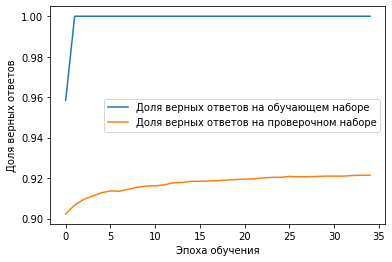

[[100, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9242]

Искл. индексы ниже =  1000
Размер словаря      =  30000
Длинна отрезка      =  1000
Шаг смещения       =  100
Обучающая база  (17658, 30000)
Тестовая   база  (6693, 30000)
Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 5s 267us/sample - loss: 0.1369 - acc: 0.9677 - val_loss: 0.5461 - val_acc: 0.8448
Epoch 2/35
17658/17658 [==============================] - 4s 244us/sample - loss: 0.0031 - acc: 1.0000 - val_loss: 0.5039 - val_acc: 0.8512
Epoch 3/35
17658/17658 [==============================] - 4s 246us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4797 - val_acc: 0.8546
Epoch 4/35
17658/17658 [==============================] - 4s 245us/sample - loss: 9.5119e-04 - acc: 1.0000 - val_loss: 0.4599 - val_acc: 0.8581
Epoch 5/35
17658/17658 [==============================] - 4s 244us/sample - loss: 6.5116e-04 - acc: 1.0000 - val_loss: 

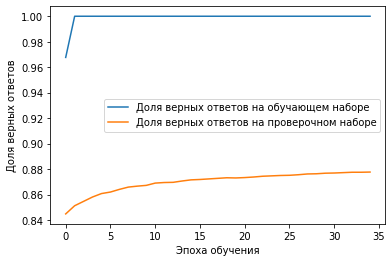

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 5s 267us/sample - loss: 0.1365 - acc: 0.9633 - val_loss: 0.5399 - val_acc: 0.8494
Epoch 2/35
17658/17658 [==============================] - 4s 242us/sample - loss: 0.0031 - acc: 1.0000 - val_loss: 0.5011 - val_acc: 0.8534
Epoch 3/35
17658/17658 [==============================] - 4s 246us/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 0.4761 - val_acc: 0.8549
Epoch 4/35
17658/17658 [==============================] - 4s 245us/sample - loss: 9.5512e-04 - acc: 1.0000 - val_loss: 0.4567 - val_acc: 0.8609
Epoch 5/35
17658/17658 [==============================] - 4s 248us/sample - loss: 6.5315e-04 - acc: 1.0000 - val_loss: 0.4442 - val_acc: 0.8628
Epoch 6/35
17658/17658 [==============================] - 4s 251us/sample - loss: 4.7727e-04 - acc: 1.0000 - val_loss: 0.4340 - val_acc: 0.8640
Epoch 7/35
17658/17658 [==============================] - 4s 249us/sample - loss: 3.6509e-04 - acc:

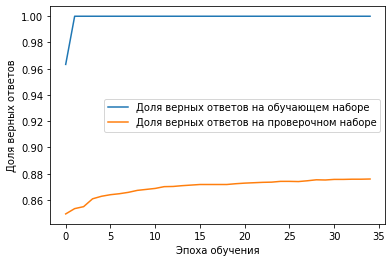

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 5s 266us/sample - loss: 0.1402 - acc: 0.9662 - val_loss: 0.5181 - val_acc: 0.8687
Epoch 2/35
17658/17658 [==============================] - 4s 246us/sample - loss: 0.0029 - acc: 1.0000 - val_loss: 0.4764 - val_acc: 0.8715
Epoch 3/35
17658/17658 [==============================] - 4s 245us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4507 - val_acc: 0.8745
Epoch 4/35
17658/17658 [==============================] - 4s 249us/sample - loss: 9.0392e-04 - acc: 1.0000 - val_loss: 0.4330 - val_acc: 0.8755
Epoch 5/35
17658/17658 [==============================] - 4s 248us/sample - loss: 6.1839e-04 - acc: 1.0000 - val_loss: 0.4203 - val_acc: 0.8761
Epoch 6/35
17658/17658 [==============================] - 4s 248us/sample - loss: 4.5238e-04 - acc: 1.0000 - val_loss: 0.4093 - val_acc: 0.8791
Epoch 7/35
17658/17658 [==============================] - 4s 246us/sample - loss: 3.4629e-04 - acc:

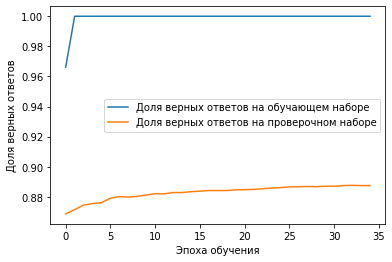

[[1000, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.8804]

Искл. индексы ниже =  5000
Размер словаря      =  30000
Длинна отрезка      =  1000
Шаг смещения       =  100
Обучающая база  (17658, 30000)
Тестовая   база  (6693, 30000)
Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 5s 265us/sample - loss: 0.2354 - acc: 0.9001 - val_loss: 0.7071 - val_acc: 0.7739
Epoch 2/35
17658/17658 [==============================] - 4s 240us/sample - loss: 0.0042 - acc: 1.0000 - val_loss: 0.6484 - val_acc: 0.7925
Epoch 3/35
17658/17658 [==============================] - 4s 245us/sample - loss: 0.0020 - acc: 1.0000 - val_loss: 0.6188 - val_acc: 0.7975
Epoch 4/35
17658/17658 [==============================] - 4s 246us/sample - loss: 0.0012 - acc: 1.0000 - val_loss: 0.5986 - val_acc: 0.8031
Epoch 5/35
17658/17658 [==============================] - 4s 246us/sample - loss: 8.3279e-04 - acc: 1.0000 - val_loss: 0.5

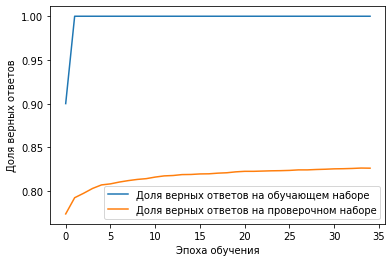

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 5s 260us/sample - loss: 0.1989 - acc: 0.9422 - val_loss: 0.7175 - val_acc: 0.7711
Epoch 2/35
17658/17658 [==============================] - 4s 240us/sample - loss: 0.0048 - acc: 1.0000 - val_loss: 0.6621 - val_acc: 0.7856
Epoch 3/35
17658/17658 [==============================] - 4s 242us/sample - loss: 0.0023 - acc: 1.0000 - val_loss: 0.6346 - val_acc: 0.7910
Epoch 4/35
17658/17658 [==============================] - 4s 239us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.6109 - val_acc: 0.7961
Epoch 5/35
17658/17658 [==============================] - 4s 238us/sample - loss: 9.3833e-04 - acc: 1.0000 - val_loss: 0.5968 - val_acc: 0.7987
Epoch 6/35
17658/17658 [==============================] - 4s 241us/sample - loss: 6.7903e-04 - acc: 1.0000 - val_loss: 0.5848 - val_acc: 0.8011
Epoch 7/35
17658/17658 [==============================] - 4s 240us/sample - loss: 5.1558e-04 - acc: 1.0

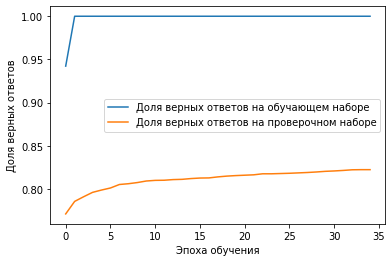

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 5s 264us/sample - loss: 0.2066 - acc: 0.9320 - val_loss: 0.7208 - val_acc: 0.7647
Epoch 2/35
17658/17658 [==============================] - 4s 239us/sample - loss: 0.0046 - acc: 1.0000 - val_loss: 0.6632 - val_acc: 0.7844
Epoch 3/35
17658/17658 [==============================] - 4s 239us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 0.6356 - val_acc: 0.7889
Epoch 4/35
17658/17658 [==============================] - 4s 238us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.6136 - val_acc: 0.7934
Epoch 5/35
17658/17658 [==============================] - 4s 239us/sample - loss: 8.9973e-04 - acc: 1.0000 - val_loss: 0.6000 - val_acc: 0.7955
Epoch 6/35
17658/17658 [==============================] - 4s 242us/sample - loss: 6.5159e-04 - acc: 1.0000 - val_loss: 0.5876 - val_acc: 0.7975
Epoch 7/35
17658/17658 [==============================] - 4s 243us/sample - loss: 4.9494e-04 - acc: 1.0

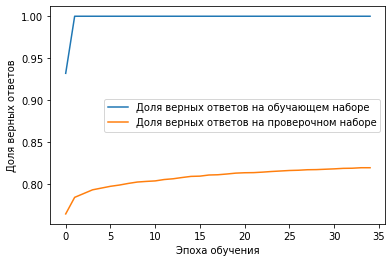

[[5000, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.8228]

Результаты тестирования архитектуры данных
[[0, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9209]
[[10, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9233]
[[25, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9236]
[[50, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9212]
[[100, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9242]
[[1000, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.8804]
[[5000, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.8228]


In [0]:
#Обучаем сеть и выводим среднюю точность на проверочной выборке по 3 запускам
for currData in data:
  # Создаем обучающие и тестовые данные
  xTrain, xTrain01, yTrain, xTest, xTest01, yTest = get_data(*currData)
  # Тестируем формат данных на сети
  net = [400, 'sigmoid', 0, 'relu', 0, 'relu']
  acc = testModel(net, batch_size = 128, epochs = 35, iterations = 3)
  list_test_data.append([currData, net, 'mean_train_acc = ', round(sum(acc)/len(acc),4)])
  print(list_test_data[-1])
  print('='*100)
  print()

print('Результаты тестирования архитектуры данных')
for i in list_test_data:
  print(i)

##  Лучший результат
- [[100, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9242]

### Уточним детальнее нижнюю границу словаря

In [0]:
# Список для записи результатов тестирования
list_test_data = []
#Создаём различные форматы данных
# формат данных - (low_ind_dict = 0, size_dict = 20000, len_cut = 1000, step = 100)
data = []
data.append([75, 30000, 1000, 100])
data.append([100, 30000, 1000, 100])
data.append([125, 30000, 1000, 100])
data.append([150, 30000, 1000, 100])
data.append([200, 30000, 1000, 100])
data.append([300, 30000, 1000, 100])
data.append([400, 30000, 1000, 100])
data.append([500, 30000, 1000, 100])
data.append([700, 30000, 1000, 100])

Искл. индексы ниже =  75
Размер словаря      =  30000
Длинна отрезка      =  1000
Шаг смещения       =  100
Обучающая база  (17658, 30000)
Тестовая   база  (6693, 30000)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 7s 394us/sample - loss: 0.1087 - acc: 0.9709 - val_loss: 0.4095 - val_acc: 0.9024
Epoch 2/35
17658/17658 [==============================] - 5s 303us/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3726 - val_acc: 0.9054
Epoch 3/35
17658/17658 [==============================] - 5s 296us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.3510 - val_acc: 0.9083
Epoch 4/35
17658/17658 [==============================] - 5s 298us/sample - loss: 8.0641e-04 - acc: 1.0000 - val_loss: 0.3351 - val_acc: 0.9108
Epoch 5/35
17658/17658 [==================

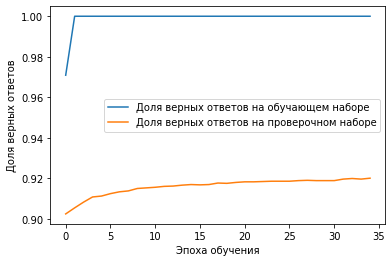

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 5s 302us/sample - loss: 0.1185 - acc: 0.9648 - val_loss: 0.4147 - val_acc: 0.9053
Epoch 2/35
17658/17658 [==============================] - 5s 296us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 0.3793 - val_acc: 0.9096
Epoch 3/35
17658/17658 [==============================] - 5s 300us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.3548 - val_acc: 0.9127
Epoch 4/35
17658/17658 [==============================] - 5s 298us/sample - loss: 8.2877e-04 - acc: 1.0000 - val_loss: 0.3391 - val_acc: 0.9141
Epoch 5/35
17658/17658 [==============================] - 5s 299us/sample - loss: 5.6878e-04 - acc: 1.0000 - val_loss: 0.3283 - val_acc: 0.9147
Epoch 6/35
17658/17658 [==============================] - 5s 297us/sample - loss: 4.1706e-04 - acc: 1.0000 - val_loss: 0.3196 - val_acc: 0.9166
Epoch 7/35
17658/17658 [==============================] - 5s 300us/sample - loss: 3.1990e-04 - acc:

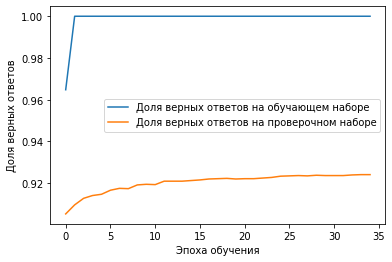

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 316us/sample - loss: 0.1307 - acc: 0.9578 - val_loss: 0.4208 - val_acc: 0.9065
Epoch 2/35
17658/17658 [==============================] - 5s 308us/sample - loss: 0.0030 - acc: 1.0000 - val_loss: 0.3788 - val_acc: 0.9153
Epoch 3/35
17658/17658 [==============================] - 5s 303us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3579 - val_acc: 0.9151
Epoch 4/35
17658/17658 [==============================] - 5s 303us/sample - loss: 9.3171e-04 - acc: 1.0000 - val_loss: 0.3417 - val_acc: 0.9181
Epoch 5/35
17658/17658 [==============================] - 5s 303us/sample - loss: 6.3914e-04 - acc: 1.0000 - val_loss: 0.3303 - val_acc: 0.9186
Epoch 6/35
17658/17658 [==============================] - 5s 302us/sample - loss: 4.6829e-04 - acc: 1.0000 - val_loss: 0.3206 - val_acc: 0.9198
Epoch 7/35
17658/17658 [==============================] - 5s 304us/sample - loss: 3.5888e-04 - acc:

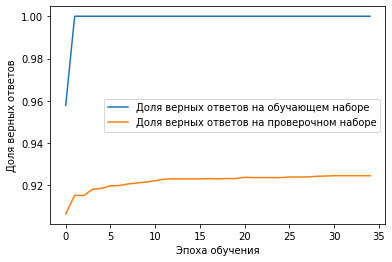

[[75, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9229]

Искл. индексы ниже =  100
Размер словаря      =  30000
Длинна отрезка      =  1000
Шаг смещения       =  100
Обучающая база  (17658, 30000)
Тестовая   база  (6693, 30000)
Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 344us/sample - loss: 0.1151 - acc: 0.9660 - val_loss: 0.4081 - val_acc: 0.9051
Epoch 2/35
17658/17658 [==============================] - 6s 337us/sample - loss: 0.0025 - acc: 1.0000 - val_loss: 0.3717 - val_acc: 0.9086
Epoch 3/35
17658/17658 [==============================] - 6s 337us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.3481 - val_acc: 0.9111
Epoch 4/35
17658/17658 [==============================] - 6s 337us/sample - loss: 7.7050e-04 - acc: 1.0000 - val_loss: 0.3330 - val_acc: 0.9126
Epoch 5/35
17658/17658 [==============================] - 6s 335us/sample - loss: 5.2626e-04 - acc: 1.0000 - val_loss: 0.

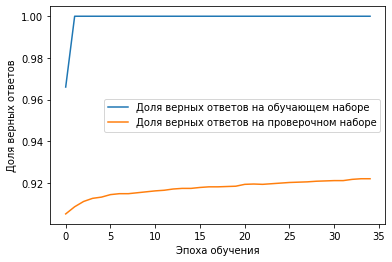

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 335us/sample - loss: 0.1201 - acc: 0.9638 - val_loss: 0.4048 - val_acc: 0.9071
Epoch 2/35
17658/17658 [==============================] - 6s 326us/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3707 - val_acc: 0.9126
Epoch 3/35
17658/17658 [==============================] - 6s 327us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.3477 - val_acc: 0.9160
Epoch 4/35
17658/17658 [==============================] - 6s 325us/sample - loss: 8.2058e-04 - acc: 1.0000 - val_loss: 0.3335 - val_acc: 0.9178
Epoch 5/35
17658/17658 [==============================] - 6s 324us/sample - loss: 5.6334e-04 - acc: 1.0000 - val_loss: 0.3229 - val_acc: 0.9184
Epoch 6/35
17658/17658 [==============================] - 6s 328us/sample - loss: 4.1325e-04 - acc: 1.0000 - val_loss: 0.3139 - val_acc: 0.9199
Epoch 7/35
17658/17658 [==============================] - 6s 328us/sample - loss: 3.1707e-04 - acc:

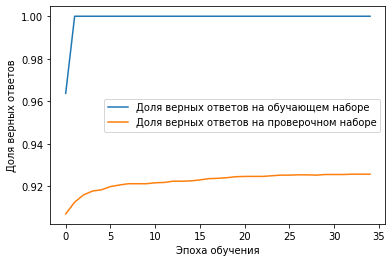

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 323us/sample - loss: 0.1286 - acc: 0.9549 - val_loss: 0.4343 - val_acc: 0.8826
Epoch 2/35
17658/17658 [==============================] - 6s 316us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 0.3977 - val_acc: 0.8890
Epoch 3/35
17658/17658 [==============================] - 6s 315us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3704 - val_acc: 0.8977
Epoch 4/35
17658/17658 [==============================] - 6s 315us/sample - loss: 8.3212e-04 - acc: 1.0000 - val_loss: 0.3560 - val_acc: 0.8999
Epoch 5/35
17658/17658 [==============================] - 5s 311us/sample - loss: 5.6990e-04 - acc: 1.0000 - val_loss: 0.3440 - val_acc: 0.9014
Epoch 6/35
17658/17658 [==============================] - 6s 315us/sample - loss: 4.1710e-04 - acc: 1.0000 - val_loss: 0.3355 - val_acc: 0.9021
Epoch 7/35
17658/17658 [==============================] - 6s 313us/sample - loss: 3.1942e-04 - acc:

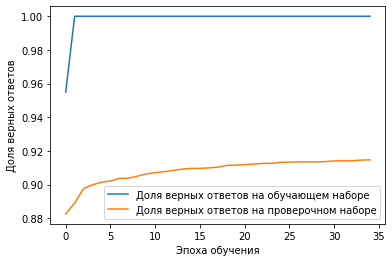

[[100, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9208]

Искл. индексы ниже =  125
Размер словаря      =  30000
Длинна отрезка      =  1000
Шаг смещения       =  100
Обучающая база  (17658, 30000)
Тестовая   база  (6693, 30000)
Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 335us/sample - loss: 0.1399 - acc: 0.9613 - val_loss: 0.4282 - val_acc: 0.8999
Epoch 2/35
17658/17658 [==============================] - 6s 326us/sample - loss: 0.0030 - acc: 1.0000 - val_loss: 0.3950 - val_acc: 0.8996
Epoch 3/35
17658/17658 [==============================] - 6s 326us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3696 - val_acc: 0.9056
Epoch 4/35
17658/17658 [==============================] - 6s 327us/sample - loss: 9.2716e-04 - acc: 1.0000 - val_loss: 0.3549 - val_acc: 0.9066
Epoch 5/35
17658/17658 [==============================] - 6s 330us/sample - loss: 6.3478e-04 - acc: 1.0000 - val_loss: 0

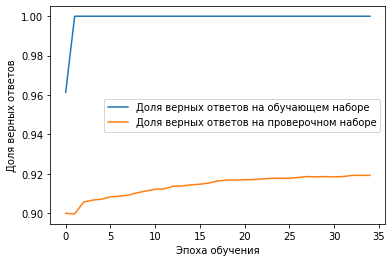

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 338us/sample - loss: 0.1248 - acc: 0.9667 - val_loss: 0.4425 - val_acc: 0.8835
Epoch 2/35
17658/17658 [==============================] - 6s 329us/sample - loss: 0.0029 - acc: 1.0000 - val_loss: 0.4054 - val_acc: 0.8866
Epoch 3/35
17658/17658 [==============================] - 6s 329us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3806 - val_acc: 0.8930
Epoch 4/35
17658/17658 [==============================] - 6s 328us/sample - loss: 9.0151e-04 - acc: 1.0000 - val_loss: 0.3635 - val_acc: 0.8974
Epoch 5/35
17658/17658 [==============================] - 6s 327us/sample - loss: 6.1704e-04 - acc: 1.0000 - val_loss: 0.3517 - val_acc: 0.8993
Epoch 6/35
17658/17658 [==============================] - 6s 326us/sample - loss: 4.5148e-04 - acc: 1.0000 - val_loss: 0.3416 - val_acc: 0.9017
Epoch 7/35
17658/17658 [==============================] - 6s 326us/sample - loss: 3.4571e-04 - acc:

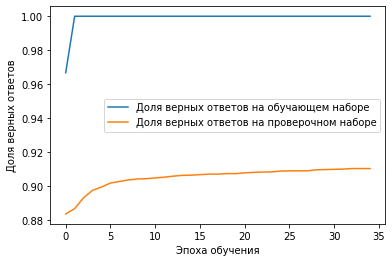

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 331us/sample - loss: 0.1298 - acc: 0.9558 - val_loss: 0.4240 - val_acc: 0.9033
Epoch 2/35
17658/17658 [==============================] - 6s 321us/sample - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3816 - val_acc: 0.9111
Epoch 3/35
17658/17658 [==============================] - 6s 321us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3614 - val_acc: 0.9108
Epoch 4/35
17658/17658 [==============================] - 6s 322us/sample - loss: 8.7785e-04 - acc: 1.0000 - val_loss: 0.3459 - val_acc: 0.9120
Epoch 5/35
17658/17658 [==============================] - 6s 319us/sample - loss: 5.9924e-04 - acc: 1.0000 - val_loss: 0.3326 - val_acc: 0.9156
Epoch 6/35
17658/17658 [==============================] - 6s 323us/sample - loss: 4.3796e-04 - acc: 1.0000 - val_loss: 0.3237 - val_acc: 0.9169
Epoch 7/35
17658/17658 [==============================] - 6s 321us/sample - loss: 3.3517e-04 - acc:

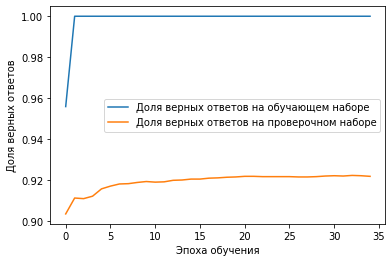

[[125, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.917]

Искл. индексы ниже =  150
Размер словаря      =  30000
Длинна отрезка      =  1000
Шаг смещения       =  100
Обучающая база  (17658, 30000)
Тестовая   база  (6693, 30000)
Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 7s 372us/sample - loss: 0.1310 - acc: 0.9606 - val_loss: 0.4285 - val_acc: 0.8978
Epoch 2/35
17658/17658 [==============================] - 6s 357us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 0.3926 - val_acc: 0.9029
Epoch 3/35
17658/17658 [==============================] - 6s 358us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3698 - val_acc: 0.9056
Epoch 4/35
17658/17658 [==============================] - 6s 359us/sample - loss: 8.3782e-04 - acc: 1.0000 - val_loss: 0.3541 - val_acc: 0.9080
Epoch 5/35
17658/17658 [==============================] - 6s 358us/sample - loss: 5.7361e-04 - acc: 1.0000 - val_loss: 0.

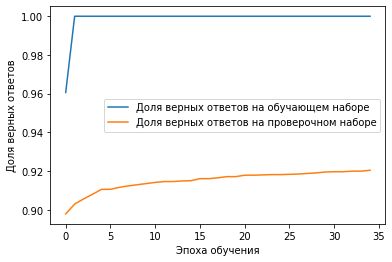

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 7s 369us/sample - loss: 0.1226 - acc: 0.9666 - val_loss: 0.4349 - val_acc: 0.8974
Epoch 2/35
17658/17658 [==============================] - 6s 357us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3957 - val_acc: 0.9005
Epoch 3/35
17658/17658 [==============================] - 6s 358us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3731 - val_acc: 0.9036
Epoch 4/35
17658/17658 [==============================] - 6s 357us/sample - loss: 8.5707e-04 - acc: 1.0000 - val_loss: 0.3579 - val_acc: 0.9048
Epoch 5/35
17658/17658 [==============================] - 6s 357us/sample - loss: 5.8748e-04 - acc: 1.0000 - val_loss: 0.3453 - val_acc: 0.9065
Epoch 6/35
17658/17658 [==============================] - 6s 357us/sample - loss: 4.3020e-04 - acc: 1.0000 - val_loss: 0.3356 - val_acc: 0.9081
Epoch 7/35
17658/17658 [==============================] - 6s 357us/sample - loss: 3.2971e-04 - acc:

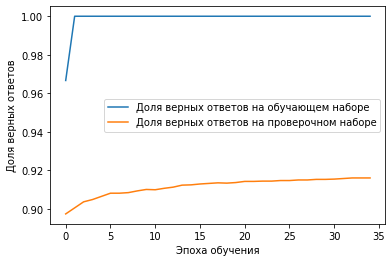

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 366us/sample - loss: 0.1302 - acc: 0.9538 - val_loss: 0.4232 - val_acc: 0.8947
Epoch 2/35
17658/17658 [==============================] - 6s 348us/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3831 - val_acc: 0.9036
Epoch 3/35
17658/17658 [==============================] - 6s 350us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.3618 - val_acc: 0.9041
Epoch 4/35
17658/17658 [==============================] - 6s 348us/sample - loss: 7.9719e-04 - acc: 1.0000 - val_loss: 0.3452 - val_acc: 0.9078
Epoch 5/35
17658/17658 [==============================] - 6s 348us/sample - loss: 5.4552e-04 - acc: 1.0000 - val_loss: 0.3352 - val_acc: 0.9078
Epoch 6/35
17658/17658 [==============================] - 6s 349us/sample - loss: 3.9908e-04 - acc: 1.0000 - val_loss: 0.3259 - val_acc: 0.9102
Epoch 7/35
17658/17658 [==============================] - 6s 348us/sample - loss: 3.0546e-04 - acc:

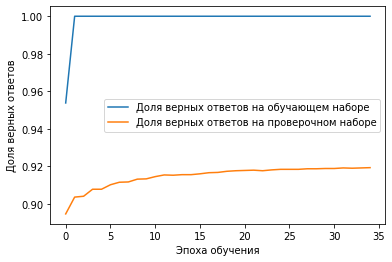

[[150, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9186]

Искл. индексы ниже =  200
Размер словаря      =  30000
Длинна отрезка      =  1000
Шаг смещения       =  100
Обучающая база  (17658, 30000)
Тестовая   база  (6693, 30000)
Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 348us/sample - loss: 0.1277 - acc: 0.9617 - val_loss: 0.4412 - val_acc: 0.8859
Epoch 2/35
17658/17658 [==============================] - 6s 331us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 0.4050 - val_acc: 0.8890
Epoch 3/35
17658/17658 [==============================] - 6s 331us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3812 - val_acc: 0.8941
Epoch 4/35
17658/17658 [==============================] - 6s 336us/sample - loss: 8.4658e-04 - acc: 1.0000 - val_loss: 0.3670 - val_acc: 0.8942
Epoch 5/35
17658/17658 [==============================] - 6s 335us/sample - loss: 5.7973e-04 - acc: 1.0000 - val_loss: 0

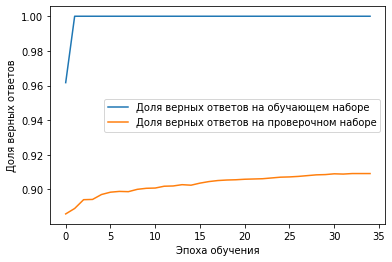

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 348us/sample - loss: 0.1162 - acc: 0.9644 - val_loss: 0.4275 - val_acc: 0.9030
Epoch 2/35
17658/17658 [==============================] - 6s 328us/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3880 - val_acc: 0.9069
Epoch 3/35
17658/17658 [==============================] - 6s 329us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.3683 - val_acc: 0.9074
Epoch 4/35
17658/17658 [==============================] - 6s 329us/sample - loss: 7.9553e-04 - acc: 1.0000 - val_loss: 0.3527 - val_acc: 0.9092
Epoch 5/35
17658/17658 [==============================] - 6s 330us/sample - loss: 5.4462e-04 - acc: 1.0000 - val_loss: 0.3417 - val_acc: 0.9105
Epoch 6/35
17658/17658 [==============================] - 6s 330us/sample - loss: 3.9851e-04 - acc: 1.0000 - val_loss: 0.3328 - val_acc: 0.9102
Epoch 7/35
17658/17658 [==============================] - 6s 330us/sample - loss: 3.0515e-04 - acc:

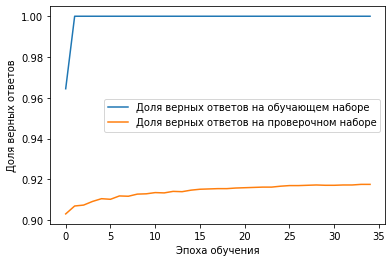

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 335us/sample - loss: 0.1320 - acc: 0.9531 - val_loss: 0.4319 - val_acc: 0.8951
Epoch 2/35
17658/17658 [==============================] - 6s 318us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 0.3945 - val_acc: 0.9015
Epoch 3/35
17658/17658 [==============================] - 6s 319us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.3715 - val_acc: 0.9063
Epoch 4/35
17658/17658 [==============================] - 6s 320us/sample - loss: 8.2661e-04 - acc: 1.0000 - val_loss: 0.3558 - val_acc: 0.9089
Epoch 5/35
17658/17658 [==============================] - 6s 317us/sample - loss: 5.6553e-04 - acc: 1.0000 - val_loss: 0.3453 - val_acc: 0.9092
Epoch 6/35
17658/17658 [==============================] - 6s 319us/sample - loss: 4.1371e-04 - acc: 1.0000 - val_loss: 0.3365 - val_acc: 0.9105
Epoch 7/35
17658/17658 [==============================] - 6s 318us/sample - loss: 3.1671e-04 - acc:

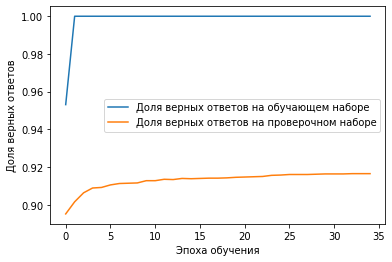

[[200, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9144]

Искл. индексы ниже =  300
Размер словаря      =  30000
Длинна отрезка      =  1000
Шаг смещения       =  100
Обучающая база  (17658, 30000)
Тестовая   база  (6693, 30000)
Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 343us/sample - loss: 0.1315 - acc: 0.9599 - val_loss: 0.4474 - val_acc: 0.8902
Epoch 2/35
17658/17658 [==============================] - 6s 328us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 0.4070 - val_acc: 0.8962
Epoch 3/35
17658/17658 [==============================] - 6s 324us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3837 - val_acc: 0.8996
Epoch 4/35
17658/17658 [==============================] - 6s 329us/sample - loss: 8.8070e-04 - acc: 1.0000 - val_loss: 0.3680 - val_acc: 0.9008
Epoch 5/35
17658/17658 [==============================] - 6s 332us/sample - loss: 6.0417e-04 - acc: 1.0000 - val_loss: 0

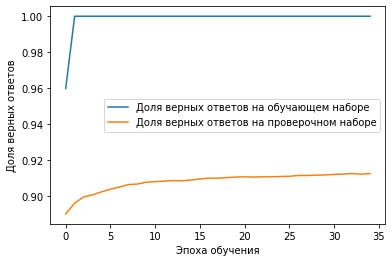

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 342us/sample - loss: 0.1248 - acc: 0.9621 - val_loss: 0.4467 - val_acc: 0.8894
Epoch 2/35
17658/17658 [==============================] - 6s 323us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 0.4128 - val_acc: 0.8911
Epoch 3/35
17658/17658 [==============================] - 6s 324us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3886 - val_acc: 0.8954
Epoch 4/35
17658/17658 [==============================] - 6s 323us/sample - loss: 8.3113e-04 - acc: 1.0000 - val_loss: 0.3723 - val_acc: 0.8977
Epoch 5/35
17658/17658 [==============================] - 6s 323us/sample - loss: 5.6912e-04 - acc: 1.0000 - val_loss: 0.3593 - val_acc: 0.8996
Epoch 6/35
17658/17658 [==============================] - 6s 323us/sample - loss: 4.1647e-04 - acc: 1.0000 - val_loss: 0.3506 - val_acc: 0.9003
Epoch 7/35
17658/17658 [==============================] - 6s 323us/sample - loss: 3.1896e-04 - acc:

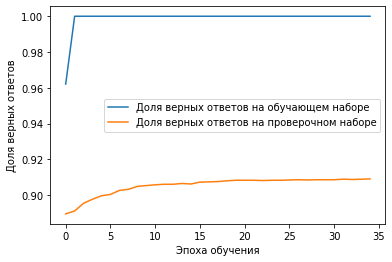

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 343us/sample - loss: 0.1196 - acc: 0.9703 - val_loss: 0.4390 - val_acc: 0.8929
Epoch 2/35
17658/17658 [==============================] - 6s 324us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3997 - val_acc: 0.8971
Epoch 3/35
17658/17658 [==============================] - 6s 325us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3755 - val_acc: 0.8994
Epoch 4/35
17658/17658 [==============================] - 6s 324us/sample - loss: 8.6769e-04 - acc: 1.0000 - val_loss: 0.3587 - val_acc: 0.9029
Epoch 5/35
17658/17658 [==============================] - 6s 324us/sample - loss: 5.9465e-04 - acc: 1.0000 - val_loss: 0.3479 - val_acc: 0.9036
Epoch 6/35
17658/17658 [==============================] - 6s 321us/sample - loss: 4.3544e-04 - acc: 1.0000 - val_loss: 0.3378 - val_acc: 0.9056
Epoch 7/35
17658/17658 [==============================] - 6s 323us/sample - loss: 3.3360e-04 - acc:

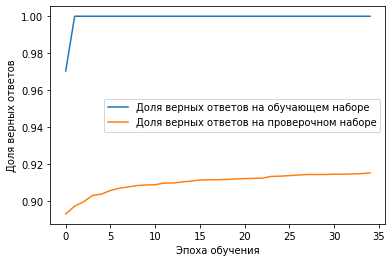

[[300, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9122]

Искл. индексы ниже =  400
Размер словаря      =  30000
Длинна отрезка      =  1000
Шаг смещения       =  100
Обучающая база  (17658, 30000)
Тестовая   база  (6693, 30000)
Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 347us/sample - loss: 0.1315 - acc: 0.9563 - val_loss: 0.4422 - val_acc: 0.8969
Epoch 2/35
17658/17658 [==============================] - 6s 325us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 0.4022 - val_acc: 0.9014
Epoch 3/35
17658/17658 [==============================] - 6s 325us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3809 - val_acc: 0.9027
Epoch 4/35
17658/17658 [==============================] - 6s 327us/sample - loss: 8.4901e-04 - acc: 1.0000 - val_loss: 0.3633 - val_acc: 0.9075
Epoch 5/35
17658/17658 [==============================] - 6s 331us/sample - loss: 5.8209e-04 - acc: 1.0000 - val_loss: 0

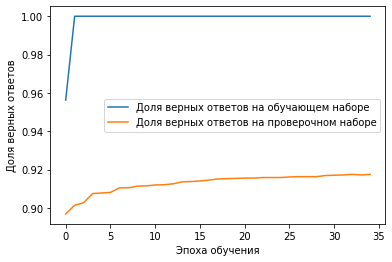

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 343us/sample - loss: 0.1331 - acc: 0.9578 - val_loss: 0.4472 - val_acc: 0.8900
Epoch 2/35
17658/17658 [==============================] - 6s 323us/sample - loss: 0.0029 - acc: 1.0000 - val_loss: 0.4042 - val_acc: 0.8962
Epoch 3/35
17658/17658 [==============================] - 6s 322us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3799 - val_acc: 0.9009
Epoch 4/35
17658/17658 [==============================] - 6s 323us/sample - loss: 8.7488e-04 - acc: 1.0000 - val_loss: 0.3638 - val_acc: 0.9029
Epoch 5/35
17658/17658 [==============================] - 6s 322us/sample - loss: 5.9789e-04 - acc: 1.0000 - val_loss: 0.3512 - val_acc: 0.9047
Epoch 6/35
17658/17658 [==============================] - 6s 322us/sample - loss: 4.3699e-04 - acc: 1.0000 - val_loss: 0.3417 - val_acc: 0.9053
Epoch 7/35
17658/17658 [==============================] - 6s 322us/sample - loss: 3.3431e-04 - acc:

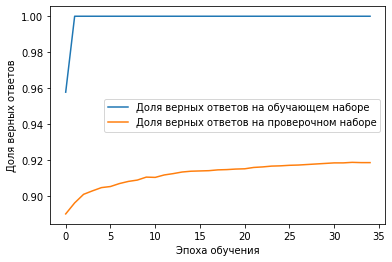

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 347us/sample - loss: 0.1156 - acc: 0.9764 - val_loss: 0.4584 - val_acc: 0.8860
Epoch 2/35
17658/17658 [==============================] - 6s 324us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 0.4150 - val_acc: 0.8950
Epoch 3/35
17658/17658 [==============================] - 6s 321us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3899 - val_acc: 0.8999
Epoch 4/35
17658/17658 [==============================] - 6s 324us/sample - loss: 8.5803e-04 - acc: 1.0000 - val_loss: 0.3732 - val_acc: 0.9020
Epoch 5/35
17658/17658 [==============================] - 6s 323us/sample - loss: 5.8801e-04 - acc: 1.0000 - val_loss: 0.3611 - val_acc: 0.9029
Epoch 6/35
17658/17658 [==============================] - 6s 322us/sample - loss: 4.3053e-04 - acc: 1.0000 - val_loss: 0.3516 - val_acc: 0.9036
Epoch 7/35
17658/17658 [==============================] - 6s 322us/sample - loss: 3.2980e-04 - acc:

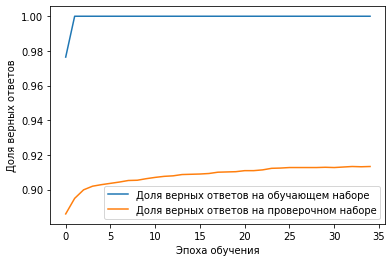

[[400, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9165]

Искл. индексы ниже =  500
Размер словаря      =  30000
Длинна отрезка      =  1000
Шаг смещения       =  100
Обучающая база  (17658, 30000)
Тестовая   база  (6693, 30000)
Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 345us/sample - loss: 0.1271 - acc: 0.9621 - val_loss: 0.4708 - val_acc: 0.8878
Epoch 2/35
17658/17658 [==============================] - 6s 323us/sample - loss: 0.0030 - acc: 1.0000 - val_loss: 0.4342 - val_acc: 0.8905
Epoch 3/35
17658/17658 [==============================] - 6s 321us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4081 - val_acc: 0.8927
Epoch 4/35
17658/17658 [==============================] - 6s 322us/sample - loss: 9.3522e-04 - acc: 1.0000 - val_loss: 0.3900 - val_acc: 0.8947
Epoch 5/35
17658/17658 [==============================] - 6s 327us/sample - loss: 6.3929e-04 - acc: 1.0000 - val_loss: 0

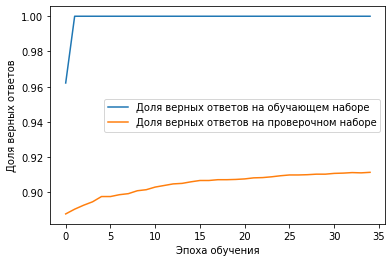

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 357us/sample - loss: 0.1366 - acc: 0.9654 - val_loss: 0.4590 - val_acc: 0.8900
Epoch 2/35
17658/17658 [==============================] - 6s 331us/sample - loss: 0.0029 - acc: 1.0000 - val_loss: 0.4194 - val_acc: 0.8953
Epoch 3/35
17658/17658 [==============================] - 6s 331us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3950 - val_acc: 0.8969
Epoch 4/35
17658/17658 [==============================] - 6s 331us/sample - loss: 9.0661e-04 - acc: 1.0000 - val_loss: 0.3779 - val_acc: 0.8999
Epoch 5/35
17658/17658 [==============================] - 6s 331us/sample - loss: 6.2023e-04 - acc: 1.0000 - val_loss: 0.3655 - val_acc: 0.9009
Epoch 6/35
17658/17658 [==============================] - 6s 333us/sample - loss: 4.5365e-04 - acc: 1.0000 - val_loss: 0.3558 - val_acc: 0.9017
Epoch 7/35
17658/17658 [==============================] - 6s 332us/sample - loss: 3.4718e-04 - acc:

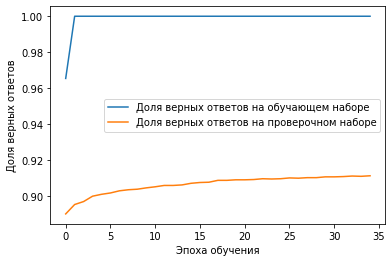

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 343us/sample - loss: 0.1381 - acc: 0.9575 - val_loss: 0.4640 - val_acc: 0.8818
Epoch 2/35
17658/17658 [==============================] - 6s 319us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 0.4244 - val_acc: 0.8882
Epoch 3/35
17658/17658 [==============================] - 6s 319us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3984 - val_acc: 0.8938
Epoch 4/35
17658/17658 [==============================] - 6s 319us/sample - loss: 8.7450e-04 - acc: 1.0000 - val_loss: 0.3826 - val_acc: 0.8963
Epoch 5/35
17658/17658 [==============================] - 6s 318us/sample - loss: 5.9947e-04 - acc: 1.0000 - val_loss: 0.3712 - val_acc: 0.8969
Epoch 6/35
17658/17658 [==============================] - 6s 319us/sample - loss: 4.3911e-04 - acc: 1.0000 - val_loss: 0.3618 - val_acc: 0.8991
Epoch 7/35
17658/17658 [==============================] - 6s 319us/sample - loss: 3.3657e-04 - acc:

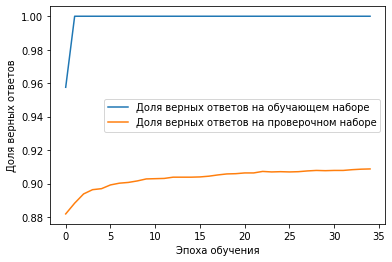

[[500, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9105]

Искл. индексы ниже =  700
Размер словаря      =  30000
Длинна отрезка      =  1000
Шаг смещения       =  100
Обучающая база  (17658, 30000)
Тестовая   база  (6693, 30000)
Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 7s 384us/sample - loss: 0.1360 - acc: 0.9585 - val_loss: 0.5159 - val_acc: 0.8527
Epoch 2/35
17658/17658 [==============================] - 6s 357us/sample - loss: 0.0030 - acc: 1.0000 - val_loss: 0.4705 - val_acc: 0.8657
Epoch 3/35
17658/17658 [==============================] - 6s 357us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4449 - val_acc: 0.8703
Epoch 4/35
17658/17658 [==============================] - 6s 357us/sample - loss: 9.2755e-04 - acc: 1.0000 - val_loss: 0.4270 - val_acc: 0.8729
Epoch 5/35
17658/17658 [==============================] - 6s 362us/sample - loss: 6.3321e-04 - acc: 1.0000 - val_loss: 0

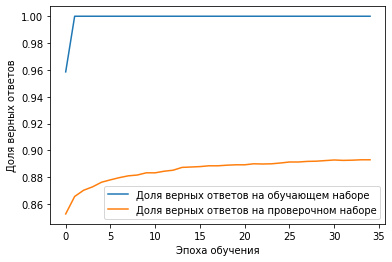

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 7s 388us/sample - loss: 0.1480 - acc: 0.9446 - val_loss: 0.4794 - val_acc: 0.8754
Epoch 2/35
17658/17658 [==============================] - 6s 360us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 0.4360 - val_acc: 0.8800
Epoch 3/35
17658/17658 [==============================] - 6s 361us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.4133 - val_acc: 0.8829
Epoch 4/35
17658/17658 [==============================] - 6s 362us/sample - loss: 8.5401e-04 - acc: 1.0000 - val_loss: 0.3967 - val_acc: 0.8869
Epoch 5/35
17658/17658 [==============================] - 6s 359us/sample - loss: 5.8450e-04 - acc: 1.0000 - val_loss: 0.3851 - val_acc: 0.8872
Epoch 6/35
17658/17658 [==============================] - 6s 359us/sample - loss: 4.2769e-04 - acc: 1.0000 - val_loss: 0.3745 - val_acc: 0.8890
Epoch 7/35
17658/17658 [==============================] - 6s 360us/sample - loss: 3.2752e-04 - acc:

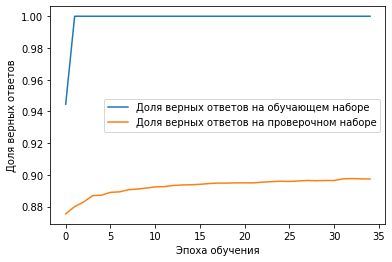

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 7s 388us/sample - loss: 0.1353 - acc: 0.9615 - val_loss: 0.4903 - val_acc: 0.8736
Epoch 2/35
17658/17658 [==============================] - 6s 363us/sample - loss: 0.0029 - acc: 1.0000 - val_loss: 0.4467 - val_acc: 0.8790
Epoch 3/35
17658/17658 [==============================] - 6s 362us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.4230 - val_acc: 0.8853
Epoch 4/35
17658/17658 [==============================] - 6s 359us/sample - loss: 8.9050e-04 - acc: 1.0000 - val_loss: 0.4063 - val_acc: 0.8875
Epoch 5/35
17658/17658 [==============================] - 6s 359us/sample - loss: 6.0943e-04 - acc: 1.0000 - val_loss: 0.3940 - val_acc: 0.8888
Epoch 6/35
17658/17658 [==============================] - 6s 352us/sample - loss: 4.4589e-04 - acc: 1.0000 - val_loss: 0.3845 - val_acc: 0.8894
Epoch 7/35
17658/17658 [==============================] - 6s 353us/sample - loss: 3.4143e-04 - acc:

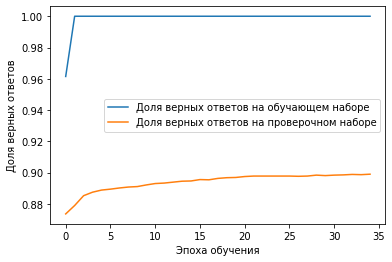

[[700, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.8965]

Результаты тестирования архитектуры данных
[[75, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9229]
[[100, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9208]
[[125, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.917]
[[150, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9186]
[[200, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9144]
[[300, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9122]
[[400, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9165]
[[500, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9105]
[[700, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.8965]


In [0]:
#Обучаем сеть и выводим среднюю точность на проверочной выборке по 3 запускам
for currData in data:
  # Создаем обучающие и тестовые данные
  xTrain, xTrain01, yTrain, xTest, xTest01, yTest = get_data(*currData)
  # Тестируем формат данных на сети
  net = [400, 'sigmoid', 0, 'relu', 0, 'relu']
  acc = testModel(net, batch_size = 128, epochs = 35, iterations = 3)
  list_test_data.append([currData, net, 'mean_train_acc = ', round(sum(acc)/len(acc),4)])
  print(list_test_data[-1])
  print('='*100)
  print()

print('Результаты тестирования архитектуры данных')
for i in list_test_data:
  print(i)

### Вывод наилучший результат показал архитектура данных
- [[75, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9229]

## Протестируем влияние сдвига на точность

In [0]:
# Список для записи результатов тестирования
list_test_data = []
#Создаём различные форматы данных
# формат данных - (low_ind_dict = 0, size_dict = 20000, len_cut = 1000, step = 100)
data = []
data.append([75, 30000, 1000, 25])
data.append([75, 30000, 1000, 50])
data.append([75, 30000, 1000, 100])
data.append([75, 30000, 1000, 150])
data.append([75, 30000, 1000, 250])
data.append([75, 30000, 1000, 300])

Искл. индексы ниже =  75
Размер словаря      =  30000
Длинна отрезка      =  1000
Шаг смещения       =  25
Обучающая база  (70624, 30000)
Тестовая   база  (26760, 30000)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 70624 samples, validate on 26760 samples
Epoch 1/35
70624/70624 [==============================] - 26s 368us/sample - loss: 0.0390 - acc: 0.9848 - val_loss: 0.3468 - val_acc: 0.9055
Epoch 2/35
70624/70624 [==============================] - 24s 346us/sample - loss: 4.0766e-04 - acc: 1.0000 - val_loss: 0.3137 - val_acc: 0.9095
Epoch 3/35
70624/70624 [==============================] - 24s 345us/sample - loss: 1.6843e-04 - acc: 1.0000 - val_loss: 0.2971 - val_acc: 0.9108
Epoch 4/35
70624/70624 [==============================] - 24s 345us/sample - loss: 9.0963e-05 - acc: 1.0000 - val_loss: 0.2843 - val_acc: 0.9135
Epoch 5/35
70624/70624 [=====

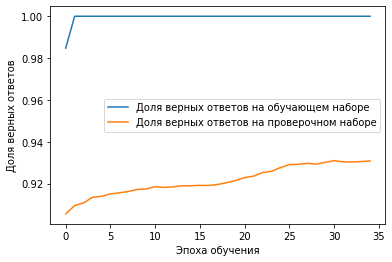

Train on 70624 samples, validate on 26760 samples
Epoch 1/35
70624/70624 [==============================] - 23s 330us/sample - loss: 0.0307 - acc: 0.9904 - val_loss: 0.3272 - val_acc: 0.9166
Epoch 2/35
70624/70624 [==============================] - 24s 334us/sample - loss: 3.6610e-04 - acc: 1.0000 - val_loss: 0.2962 - val_acc: 0.9200
Epoch 3/35
70624/70624 [==============================] - 24s 334us/sample - loss: 1.4986e-04 - acc: 1.0000 - val_loss: 0.2795 - val_acc: 0.9214
Epoch 4/35
70624/70624 [==============================] - 24s 334us/sample - loss: 8.0566e-05 - acc: 1.0000 - val_loss: 0.2692 - val_acc: 0.9219
Epoch 5/35
70624/70624 [==============================] - 24s 334us/sample - loss: 4.9052e-05 - acc: 1.0000 - val_loss: 0.2626 - val_acc: 0.9220
Epoch 6/35
70624/70624 [==============================] - 23s 333us/sample - loss: 3.2035e-05 - acc: 1.0000 - val_loss: 0.2567 - val_acc: 0.9226
Epoch 7/35
70624/70624 [==============================] - 24s 334us/sample - loss: 2

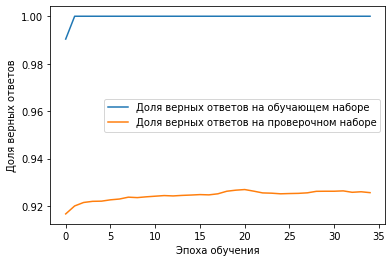

Train on 70624 samples, validate on 26760 samples
Epoch 1/35
70624/70624 [==============================] - 24s 339us/sample - loss: 0.0330 - acc: 0.9897 - val_loss: 0.3289 - val_acc: 0.9135
Epoch 2/35
70624/70624 [==============================] - 24s 335us/sample - loss: 4.0681e-04 - acc: 1.0000 - val_loss: 0.2961 - val_acc: 0.9164
Epoch 3/35
70624/70624 [==============================] - 24s 334us/sample - loss: 1.6638e-04 - acc: 1.0000 - val_loss: 0.2783 - val_acc: 0.9185
Epoch 4/35
70624/70624 [==============================] - 24s 334us/sample - loss: 8.9463e-05 - acc: 1.0000 - val_loss: 0.2685 - val_acc: 0.9192
Epoch 5/35
70624/70624 [==============================] - 24s 335us/sample - loss: 5.4491e-05 - acc: 1.0000 - val_loss: 0.2599 - val_acc: 0.9206
Epoch 6/35
70624/70624 [==============================] - 24s 335us/sample - loss: 3.5608e-05 - acc: 1.0000 - val_loss: 0.2535 - val_acc: 0.9212
Epoch 7/35
70624/70624 [==============================] - 24s 336us/sample - loss: 2

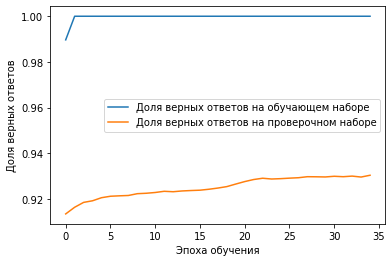

[[75, 30000, 1000, 25], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9289]

Искл. индексы ниже =  75
Размер словаря      =  30000
Длинна отрезка      =  1000
Шаг смещения       =  50


In [0]:
#Обучаем сеть и выводим среднюю точность на проверочной выборке по 3 запускам
for currData in data:
  # Создаем обучающие и тестовые данные
  xTrain, xTrain01, yTrain, xTest, xTest01, yTest = get_data(*currData)
  # Тестируем формат данных на сети
  net = [400, 'sigmoid', 0, 'relu', 0, 'relu']
  acc = testModel(net, batch_size = 128, epochs = 35, iterations = 3)
  list_test_data.append([currData, net, 'mean_train_acc = ', round(sum(acc)/len(acc),4)])
  print(list_test_data[-1])
  print('='*100)
  print()

print('Результаты тестирования архитектуры данных')
for i in list_test_data:
  print(i)

In [0]:
# Список для записи результатов тестирования
list_test_data = []
#Создаём различные форматы данных
# формат данных - (low_ind_dict = 0, size_dict = 20000, len_cut = 1000, step = 100)
data = []
data.append([75, 30000, 1000, 50])

Искл. индексы ниже =  75
Размер словаря      =  30000
Длинна отрезка      =  1000
Шаг смещения       =  50
Обучающая база  (35314, 30000)
Тестовая   база  (13382, 30000)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 35314 samples, validate on 13382 samples
Epoch 1/35
35314/35314 [==============================] - 13s 370us/sample - loss: 0.0699 - acc: 0.9738 - val_loss: 0.3737 - val_acc: 0.9062
Epoch 2/35
35314/35314 [==============================] - 11s 320us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 0.3315 - val_acc: 0.9148
Epoch 3/35
35314/35314 [==============================] - 11s 319us/sample - loss: 4.8696e-04 - acc: 1.0000 - val_loss: 0.3145 - val_acc: 0.9151
Epoch 4/35
35314/35314 [==============================] - 11s 320us/sample - loss: 2.8303e-04 - acc: 1.0000 - val_loss: 0.2995 - val_acc: 0.9177
Epoch 5/35
35314/35314 [=========

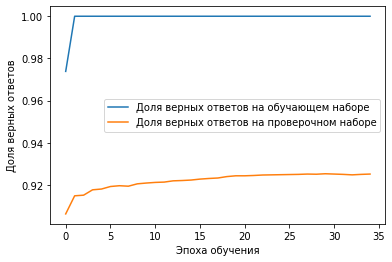

Train on 35314 samples, validate on 13382 samples
Epoch 1/35
35314/35314 [==============================] - 11s 321us/sample - loss: 0.0714 - acc: 0.9761 - val_loss: 0.3876 - val_acc: 0.8989
Epoch 2/35
35314/35314 [==============================] - 11s 319us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 0.3505 - val_acc: 0.9045
Epoch 3/35
35314/35314 [==============================] - 11s 321us/sample - loss: 4.9475e-04 - acc: 1.0000 - val_loss: 0.3284 - val_acc: 0.9087
Epoch 4/35
35314/35314 [==============================] - 11s 321us/sample - loss: 2.8793e-04 - acc: 1.0000 - val_loss: 0.3157 - val_acc: 0.9093
Epoch 5/35
35314/35314 [==============================] - 11s 321us/sample - loss: 1.8901e-04 - acc: 1.0000 - val_loss: 0.3056 - val_acc: 0.9115
Epoch 6/35
35314/35314 [==============================] - 11s 320us/sample - loss: 1.3327e-04 - acc: 1.0000 - val_loss: 0.2974 - val_acc: 0.9124
Epoch 7/35
35314/35314 [==============================] - 11s 320us/sample - loss: 9.849

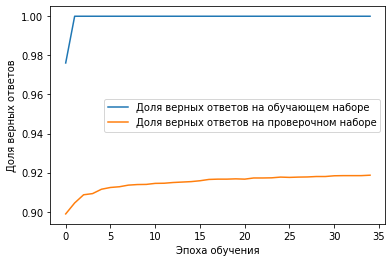

Train on 35314 samples, validate on 13382 samples
Epoch 1/35
35314/35314 [==============================] - 11s 322us/sample - loss: 0.0637 - acc: 0.9836 - val_loss: 0.3811 - val_acc: 0.9020
Epoch 2/35
35314/35314 [==============================] - 11s 318us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 0.3431 - val_acc: 0.9077
Epoch 3/35
35314/35314 [==============================] - 11s 319us/sample - loss: 4.8865e-04 - acc: 1.0000 - val_loss: 0.3236 - val_acc: 0.9093
Epoch 4/35
35314/35314 [==============================] - 11s 319us/sample - loss: 2.8257e-04 - acc: 1.0000 - val_loss: 0.3097 - val_acc: 0.9107
Epoch 5/35
35314/35314 [==============================] - 11s 319us/sample - loss: 1.8469e-04 - acc: 1.0000 - val_loss: 0.3005 - val_acc: 0.9125
Epoch 6/35
35314/35314 [==============================] - 11s 325us/sample - loss: 1.2986e-04 - acc: 1.0000 - val_loss: 0.2927 - val_acc: 0.9128
Epoch 7/35
35314/35314 [==============================] - 11s 320us/sample - loss: 9.580

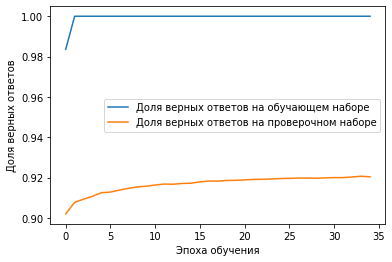

[[75, 30000, 1000, 50], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9214]

Искл. индексы ниже =  75
Размер словаря      =  30000
Длинна отрезка      =  1000
Шаг смещения       =  100
Обучающая база  (17658, 30000)
Тестовая   база  (6693, 30000)
Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 344us/sample - loss: 0.1375 - acc: 0.9493 - val_loss: 0.4357 - val_acc: 0.8902
Epoch 2/35
17658/17658 [==============================] - 6s 337us/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3971 - val_acc: 0.8996
Epoch 3/35
17658/17658 [==============================] - 6s 336us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3758 - val_acc: 0.9018
Epoch 4/35
17658/17658 [==============================] - 6s 335us/sample - loss: 8.3956e-04 - acc: 1.0000 - val_loss: 0.3590 - val_acc: 0.9057
Epoch 5/35
17658/17658 [==============================] - 6s 337us/sample - loss: 5.7834e-04 - acc: 1.0000 - val_loss: 0.34

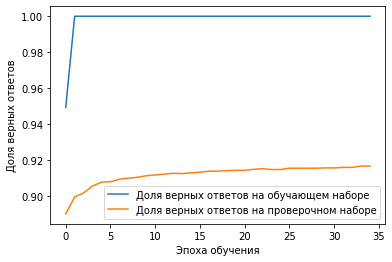

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 331us/sample - loss: 0.1196 - acc: 0.9598 - val_loss: 0.4229 - val_acc: 0.8938
Epoch 2/35
17658/17658 [==============================] - 6s 323us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 0.3851 - val_acc: 0.9000
Epoch 3/35
17658/17658 [==============================] - 6s 322us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.3627 - val_acc: 0.9032
Epoch 4/35
17658/17658 [==============================] - 6s 322us/sample - loss: 8.2391e-04 - acc: 1.0000 - val_loss: 0.3470 - val_acc: 0.9051
Epoch 5/35
17658/17658 [==============================] - 6s 321us/sample - loss: 5.6324e-04 - acc: 1.0000 - val_loss: 0.3371 - val_acc: 0.9051
Epoch 6/35
17658/17658 [==============================] - 6s 320us/sample - loss: 4.1172e-04 - acc: 1.0000 - val_loss: 0.3272 - val_acc: 0.9072
Epoch 7/35
17658/17658 [==============================] - 6s 324us/sample - loss: 3.1507e-04 - acc:

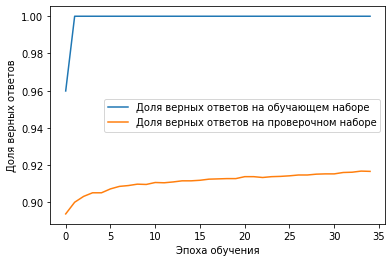

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 323us/sample - loss: 0.1227 - acc: 0.9629 - val_loss: 0.4239 - val_acc: 0.9053
Epoch 2/35
17658/17658 [==============================] - 6s 312us/sample - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3823 - val_acc: 0.9129
Epoch 3/35
17658/17658 [==============================] - 6s 312us/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 0.3594 - val_acc: 0.9151
Epoch 4/35
17658/17658 [==============================] - 6s 312us/sample - loss: 9.7366e-04 - acc: 1.0000 - val_loss: 0.3445 - val_acc: 0.9150
Epoch 5/35
17658/17658 [==============================] - 6s 312us/sample - loss: 6.6786e-04 - acc: 1.0000 - val_loss: 0.3315 - val_acc: 0.9184
Epoch 6/35
17658/17658 [==============================] - 6s 314us/sample - loss: 4.8953e-04 - acc: 1.0000 - val_loss: 0.3222 - val_acc: 0.9192
Epoch 7/35
17658/17658 [==============================] - 6s 317us/sample - loss: 3.7537e-04 - acc:

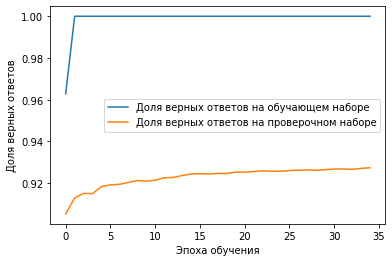

[[75, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9203]

Искл. индексы ниже =  75
Размер словаря      =  30000
Длинна отрезка      =  1000
Шаг смещения       =  150
Обучающая база  (11773, 30000)
Тестовая   база  (4464, 30000)
Train on 11773 samples, validate on 4464 samples
Epoch 1/35
11773/11773 [==============================] - 4s 334us/sample - loss: 0.2070 - acc: 0.9241 - val_loss: 0.4504 - val_acc: 0.8938
Epoch 2/35
11773/11773 [==============================] - 4s 320us/sample - loss: 0.0045 - acc: 1.0000 - val_loss: 0.4100 - val_acc: 0.9034
Epoch 3/35
11773/11773 [==============================] - 4s 321us/sample - loss: 0.0025 - acc: 1.0000 - val_loss: 0.3862 - val_acc: 0.9052
Epoch 4/35
11773/11773 [==============================] - 4s 322us/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 0.3677 - val_acc: 0.9073
Epoch 5/35
11773/11773 [==============================] - 4s 320us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 0.3562 - va

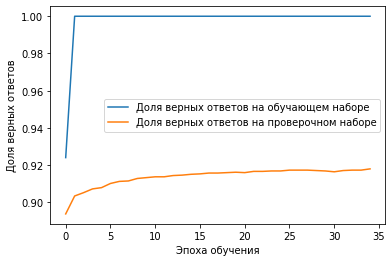

Train on 11773 samples, validate on 4464 samples
Epoch 1/35
11773/11773 [==============================] - 4s 339us/sample - loss: 0.1829 - acc: 0.9480 - val_loss: 0.4292 - val_acc: 0.9028
Epoch 2/35
11773/11773 [==============================] - 4s 322us/sample - loss: 0.0043 - acc: 1.0000 - val_loss: 0.4001 - val_acc: 0.9050
Epoch 3/35
11773/11773 [==============================] - 4s 321us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 0.3822 - val_acc: 0.9023
Epoch 4/35
11773/11773 [==============================] - 4s 319us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3647 - val_acc: 0.9061
Epoch 5/35
11773/11773 [==============================] - 4s 318us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 0.3530 - val_acc: 0.9068
Epoch 6/35
11773/11773 [==============================] - 4s 318us/sample - loss: 7.9706e-04 - acc: 1.0000 - val_loss: 0.3431 - val_acc: 0.9088
Epoch 7/35
11773/11773 [==============================] - 4s 320us/sample - loss: 6.2146e-04 - acc: 1.0000 

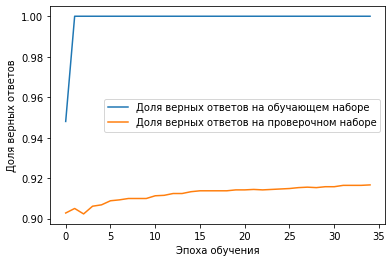

Train on 11773 samples, validate on 4464 samples
Epoch 1/35
11773/11773 [==============================] - 4s 334us/sample - loss: 0.1691 - acc: 0.9484 - val_loss: 0.4420 - val_acc: 0.8992
Epoch 2/35
11773/11773 [==============================] - 4s 320us/sample - loss: 0.0044 - acc: 1.0000 - val_loss: 0.4088 - val_acc: 0.8981
Epoch 3/35
11773/11773 [==============================] - 4s 320us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 0.3846 - val_acc: 0.9028
Epoch 4/35
11773/11773 [==============================] - 4s 319us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3668 - val_acc: 0.9055
Epoch 5/35
11773/11773 [==============================] - 4s 316us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 0.3563 - val_acc: 0.9068
Epoch 6/35
11773/11773 [==============================] - 4s 315us/sample - loss: 7.9131e-04 - acc: 1.0000 - val_loss: 0.3448 - val_acc: 0.9079
Epoch 7/35
11773/11773 [==============================] - 4s 315us/sample - loss: 6.1520e-04 - acc: 1.0000 

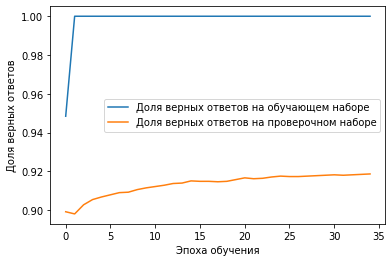

[[75, 30000, 1000, 150], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9178]

Искл. индексы ниже =  75
Размер словаря      =  30000
Длинна отрезка      =  1000
Шаг смещения       =  250
Обучающая база  (7065, 30000)
Тестовая   база  (2678, 30000)
Train on 7065 samples, validate on 2678 samples
Epoch 1/35
7065/7065 [==============================] - 2s 330us/sample - loss: 0.3578 - acc: 0.8582 - val_loss: 0.4867 - val_acc: 0.8876
Epoch 2/35
7065/7065 [==============================] - 2s 298us/sample - loss: 0.0065 - acc: 1.0000 - val_loss: 0.4345 - val_acc: 0.8850
Epoch 3/35
7065/7065 [==============================] - 2s 298us/sample - loss: 0.0038 - acc: 1.0000 - val_loss: 0.4152 - val_acc: 0.8876
Epoch 4/35
7065/7065 [==============================] - 2s 299us/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3999 - val_acc: 0.8895
Epoch 5/35
7065/7065 [==============================] - 2s 299us/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 0.3876 - val_acc: 0.892

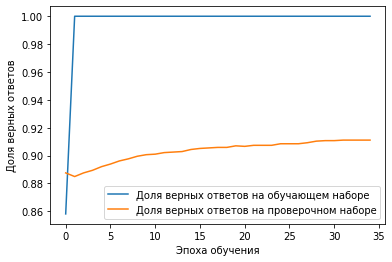

Train on 7065 samples, validate on 2678 samples
Epoch 1/35
7065/7065 [==============================] - 2s 334us/sample - loss: 0.2879 - acc: 0.9098 - val_loss: 0.4597 - val_acc: 0.8940
Epoch 2/35
7065/7065 [==============================] - 2s 297us/sample - loss: 0.0072 - acc: 1.0000 - val_loss: 0.4281 - val_acc: 0.8996
Epoch 3/35
7065/7065 [==============================] - 2s 298us/sample - loss: 0.0042 - acc: 1.0000 - val_loss: 0.4071 - val_acc: 0.9018
Epoch 4/35
7065/7065 [==============================] - 2s 294us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3906 - val_acc: 0.9052
Epoch 5/35
7065/7065 [==============================] - 2s 296us/sample - loss: 0.0021 - acc: 1.0000 - val_loss: 0.3779 - val_acc: 0.9052
Epoch 6/35
7065/7065 [==============================] - 2s 297us/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 0.3681 - val_acc: 0.9055
Epoch 7/35
7065/7065 [==============================] - 2s 297us/sample - loss: 0.0012 - acc: 1.0000 - val_loss: 0.3592 - va

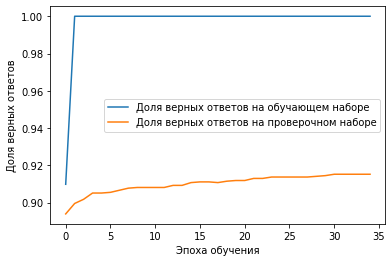

Train on 7065 samples, validate on 2678 samples
Epoch 1/35
7065/7065 [==============================] - 2s 335us/sample - loss: 0.3359 - acc: 0.8647 - val_loss: 0.4616 - val_acc: 0.9022
Epoch 2/35
7065/7065 [==============================] - 2s 298us/sample - loss: 0.0066 - acc: 1.0000 - val_loss: 0.4160 - val_acc: 0.9089
Epoch 3/35
7065/7065 [==============================] - 2s 297us/sample - loss: 0.0038 - acc: 1.0000 - val_loss: 0.3998 - val_acc: 0.9066
Epoch 4/35
7065/7065 [==============================] - 2s 299us/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3828 - val_acc: 0.9104
Epoch 5/35
7065/7065 [==============================] - 2s 297us/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 0.3727 - val_acc: 0.9085
Epoch 6/35
7065/7065 [==============================] - 2s 297us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3624 - val_acc: 0.9104
Epoch 7/35
7065/7065 [==============================] - 2s 295us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 0.3539 - va

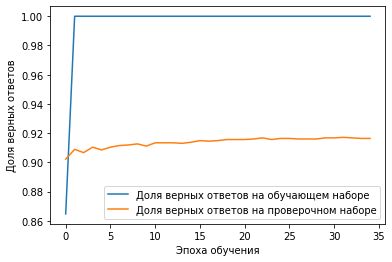

[[75, 30000, 1000, 250], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9142]

Результаты тестирования архитектуры данных
[[75, 30000, 1000, 50], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9214]
[[75, 30000, 1000, 100], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9203]
[[75, 30000, 1000, 150], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9178]
[[75, 30000, 1000, 250], [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'mean_train_acc = ', 0.9142]


In [0]:
#Обучаем сеть и выводим среднюю точность на проверочной выборке по 3 запускам
for currData in data:
  # Создаем обучающие и тестовые данные
  xTrain, xTrain01, yTrain, xTest, xTest01, yTest = get_data(*currData)
  # Тестируем формат данных на сети
  net = [400, 'sigmoid', 400, 'sigmoid', 0, 'relu']
  acc = testModel(net, batch_size = 128, epochs = 35, iterations = 3)
  list_test_data.append([currData, net, 'mean_train_acc = ', round(sum(acc)/len(acc),4)])
  print(list_test_data[-1])
  print('='*100)
  print()

print('Результаты тестирования архитектуры данных')
for i in list_test_data:
  print(i)

In [0]:
# Список для записи результатов тестирования
list_test_data = []
#Создаём различные форматы данных
# формат данных - (low_ind_dict = 0, size_dict = 20000, len_cut = 1000, step = 100)
data = []
data.append([75, 30000, 1000, 50])

Искл. индексы ниже =  75
Размер словаря      =  30000
Длинна отрезка      =  1000
Шаг смещения       =  50
Обучающая база  (35314, 30000)
Тестовая   база  (13382, 30000)
Train on 35314 samples, validate on 13382 samples
Epoch 1/35
35314/35314 [==============================] - 13s 358us/sample - loss: 0.2276 - acc: 0.8942 - val_loss: 0.2696 - val_acc: 0.9111
Epoch 2/35
35314/35314 [==============================] - 12s 353us/sample - loss: 7.4824e-04 - acc: 1.0000 - val_loss: 0.2613 - val_acc: 0.9137
Epoch 3/35
35314/35314 [==============================] - 12s 353us/sample - loss: 3.4549e-04 - acc: 1.0000 - val_loss: 0.2580 - val_acc: 0.9161
Epoch 4/35
35314/35314 [==============================] - 12s 350us/sample - loss: 2.0347e-04 - acc: 1.0000 - val_loss: 0.2608 - val_acc: 0.9166
Epoch 5/35
35314/35314 [==============================] - 12s 349us/sample - loss: 1.3384e-04 - acc: 1.0000 - val_loss: 0.2618 - val_acc: 0.9171
Epoch 6/35
35314/35314 [==============================] - 1

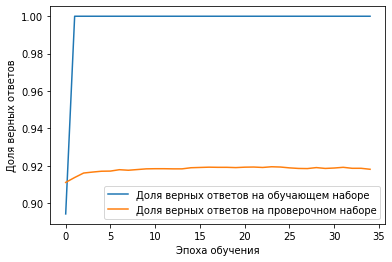

[[75, 30000, 1000, 50], [400, 'sigmoid', 400, 'sigmoid', 600, 'sigmoid'], 'mean_train_acc = ', 0.9181]

Результаты тестирования архитектуры данных
[[75, 30000, 1000, 50], [400, 'sigmoid', 400, 'sigmoid', 600, 'sigmoid'], 'mean_train_acc = ', 0.9181]


In [0]:
#Обучаем сеть и выводим среднюю точность на проверочной выборке по 3 запускам
for currData in data:
  # Создаем обучающие и тестовые данные
  xTrain, xTrain01, yTrain, xTest, xTest01, yTest = get_data(*currData)
  # Тестируем формат данных на сети
  net = [400, 'sigmoid', 400, 'sigmoid', 600, 'sigmoid']
  acc = testModel(net, batch_size = 128, epochs = 35, iterations = 1)
  list_test_data.append([currData, net, 'mean_train_acc = ', round(sum(acc)/len(acc),4)])
  print(list_test_data[-1])
  print('='*100)
  print()

print('Результаты тестирования архитектуры данных')
for i in list_test_data:
  print(i)

#Нейросеть

### Тестирование архитектуры сети


Нейросети с одним внутренним Dense слоем

In [0]:
# Список для записи результатов тестирования
list_test_net = []
# Создаём сети с различной архитектурой
net = []
net.append([50, 'relu', 0, 'relu', 0, 'relu'])
net.append([100, 'relu', 0, 'relu', 0, 'relu'])
net.append([150, 'relu', 0, 'relu', 0, 'relu'])
net.append([200, 'relu', 0, 'relu', 0, 'relu'])
net.append([250, 'relu', 0, 'relu', 0, 'relu'])
net.append([300, 'relu', 0, 'relu', 0, 'relu'])
net.append([400, 'relu', 0, 'relu', 0, 'relu'])
net.append([500, 'relu', 0, 'relu', 0, 'relu'])
net.append([750, 'relu', 0, 'relu', 0, 'relu'])
net.append([1000, 'relu', 0, 'relu', 0, 'relu'])

Искл. индексы ниже =  0
Размер словаря      =  20000
Длинна отрезка      =  1000
Шаг смещения       =  100
Обучающая база  (17658, 20000)
Тестовая   база  (6693, 20000)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 5s 262us/sample - loss: 0.1386 - acc: 0.9565 - val_loss: 0.4094 - val_acc: 0.8745
Epoch 2/30
17658/17658 [==============================] - 3s 171us/sample - loss: 7.0638e-04 - acc: 1.0000 - val_loss: 0.3968 - val_acc: 0.8742
Epoch 3/30
17658/17658 [==============================] - 3s 170us/sample - loss: 3.4899e-04 - acc: 1.0000 - val_loss: 0.3763 - val_acc: 0.8784
Epoch 4/30
17658/17658 [==============================] - 3s 171us/sample - loss: 1.7314e-04 - acc: 1.0000 - val_loss: 0.3558 - val_acc: 0.8893
Epoch 5/30
17658/17658 [===========

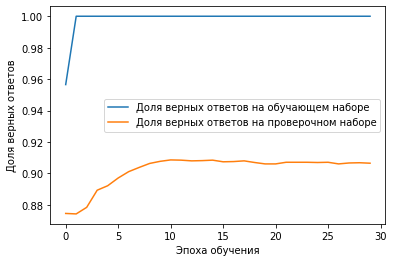

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 3s 177us/sample - loss: 0.1592 - acc: 0.9507 - val_loss: 0.3638 - val_acc: 0.9056
Epoch 2/30
17658/17658 [==============================] - 3s 170us/sample - loss: 6.8227e-04 - acc: 1.0000 - val_loss: 0.3428 - val_acc: 0.9042
Epoch 3/30
17658/17658 [==============================] - 3s 171us/sample - loss: 2.9734e-04 - acc: 1.0000 - val_loss: 0.3305 - val_acc: 0.9012
Epoch 4/30
17658/17658 [==============================] - 3s 170us/sample - loss: 1.6403e-04 - acc: 1.0000 - val_loss: 0.3267 - val_acc: 0.8988
Epoch 5/30
17658/17658 [==============================] - 3s 170us/sample - loss: 1.0555e-04 - acc: 1.0000 - val_loss: 0.3238 - val_acc: 0.8975
Epoch 6/30
17658/17658 [==============================] - 3s 171us/sample - loss: 7.4092e-05 - acc: 1.0000 - val_loss: 0.3198 - val_acc: 0.8965
Epoch 7/30
17658/17658 [==============================] - 3s 171us/sample - loss: 5.5046e-0

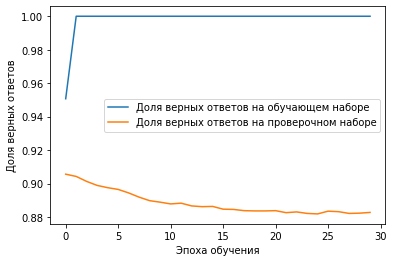

[[50, 'relu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.8946]

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 3s 185us/sample - loss: 0.1245 - acc: 0.9499 - val_loss: 0.3410 - val_acc: 0.8990
Epoch 2/30
17658/17658 [==============================] - 3s 175us/sample - loss: 2.3433e-04 - acc: 1.0000 - val_loss: 0.3231 - val_acc: 0.9039
Epoch 3/30
17658/17658 [==============================] - 3s 176us/sample - loss: 9.8440e-05 - acc: 1.0000 - val_loss: 0.3155 - val_acc: 0.9051
Epoch 4/30
17658/17658 [==============================] - 3s 176us/sample - loss: 5.5270e-05 - acc: 1.0000 - val_loss: 0.3082 - val_acc: 0.9077
Epoch 5/30
17658/17658 [==============================] - 3s 179us/sample - loss: 3.5965e-05 - acc: 1.0000 - val_loss: 0.3043 - val_acc: 0.9075
Epoch 6/30
17658/17658 [==============================] - 3s 179us/sample - loss: 2.5529e-05 - acc: 1.0000 - val_loss: 0.3035 - val_acc: 0.9074
Epoch 7/30
17658/17658 [=====

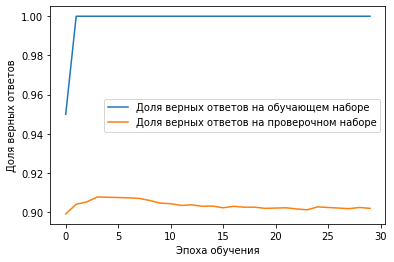

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 3s 183us/sample - loss: 0.1123 - acc: 0.9609 - val_loss: 0.3463 - val_acc: 0.8975
Epoch 2/30
17658/17658 [==============================] - 3s 175us/sample - loss: 2.4625e-04 - acc: 1.0000 - val_loss: 0.3436 - val_acc: 0.8936
Epoch 3/30
17658/17658 [==============================] - 3s 177us/sample - loss: 1.1242e-04 - acc: 1.0000 - val_loss: 0.3330 - val_acc: 0.8954
Epoch 4/30
17658/17658 [==============================] - 3s 171us/sample - loss: 6.1936e-05 - acc: 1.0000 - val_loss: 0.3245 - val_acc: 0.8966
Epoch 5/30
17658/17658 [==============================] - 3s 177us/sample - loss: 3.8466e-05 - acc: 1.0000 - val_loss: 0.3206 - val_acc: 0.8959
Epoch 6/30
17658/17658 [==============================] - 3s 175us/sample - loss: 2.6159e-05 - acc: 1.0000 - val_loss: 0.3182 - val_acc: 0.8945
Epoch 7/30
17658/17658 [==============================] - 3s 174us/sample - loss: 1.8942e-0

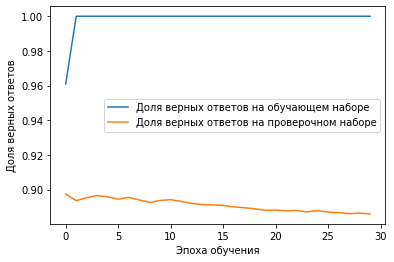

[[100, 'relu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.8939]

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 3s 190us/sample - loss: 0.0854 - acc: 0.9686 - val_loss: 0.3124 - val_acc: 0.8975
Epoch 2/30
17658/17658 [==============================] - 3s 181us/sample - loss: 1.1112e-04 - acc: 1.0000 - val_loss: 0.3055 - val_acc: 0.8980
Epoch 3/30
17658/17658 [==============================] - 3s 182us/sample - loss: 6.2402e-05 - acc: 1.0000 - val_loss: 0.2981 - val_acc: 0.9006
Epoch 4/30
17658/17658 [==============================] - 3s 178us/sample - loss: 3.9251e-05 - acc: 1.0000 - val_loss: 0.2927 - val_acc: 0.9024
Epoch 5/30
17658/17658 [==============================] - 3s 180us/sample - loss: 2.6955e-05 - acc: 1.0000 - val_loss: 0.2876 - val_acc: 0.9050
Epoch 6/30
17658/17658 [==============================] - 3s 183us/sample - loss: 1.9658e-05 - acc: 1.0000 - val_loss: 0.2844 - val_acc: 0.9056
Epoch 7/30
17658/17658 [====

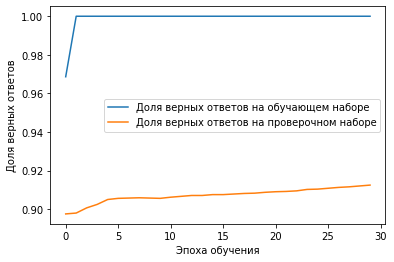

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 199us/sample - loss: 0.0880 - acc: 0.9641 - val_loss: 0.3153 - val_acc: 0.8994
Epoch 2/30
17658/17658 [==============================] - 3s 187us/sample - loss: 1.1267e-04 - acc: 1.0000 - val_loss: 0.3020 - val_acc: 0.9026
Epoch 3/30
17658/17658 [==============================] - 3s 190us/sample - loss: 5.8684e-05 - acc: 1.0000 - val_loss: 0.2943 - val_acc: 0.9045
Epoch 4/30
17658/17658 [==============================] - 3s 189us/sample - loss: 3.5148e-05 - acc: 1.0000 - val_loss: 0.2890 - val_acc: 0.9053
Epoch 5/30
17658/17658 [==============================] - 3s 189us/sample - loss: 2.3035e-05 - acc: 1.0000 - val_loss: 0.2836 - val_acc: 0.9066
Epoch 6/30
17658/17658 [==============================] - 3s 187us/sample - loss: 1.6151e-05 - acc: 1.0000 - val_loss: 0.2818 - val_acc: 0.9071
Epoch 7/30
17658/17658 [==============================] - 3s 190us/sample - loss: 1.1890e-0

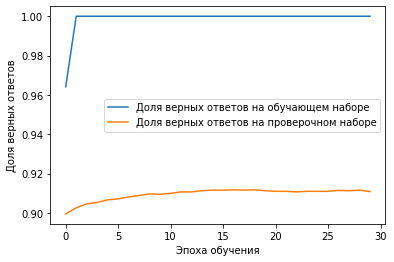

[[150, 'relu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9116]

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 3s 194us/sample - loss: 0.0863 - acc: 0.9678 - val_loss: 0.3220 - val_acc: 0.8909
Epoch 2/30
17658/17658 [==============================] - 3s 185us/sample - loss: 9.7976e-05 - acc: 1.0000 - val_loss: 0.3122 - val_acc: 0.8929
Epoch 3/30
17658/17658 [==============================] - 3s 186us/sample - loss: 5.9134e-05 - acc: 1.0000 - val_loss: 0.3069 - val_acc: 0.8941
Epoch 4/30
17658/17658 [==============================] - 3s 188us/sample - loss: 3.9205e-05 - acc: 1.0000 - val_loss: 0.3022 - val_acc: 0.8957
Epoch 5/30
17658/17658 [==============================] - 3s 184us/sample - loss: 2.6704e-05 - acc: 1.0000 - val_loss: 0.2993 - val_acc: 0.8966
Epoch 6/30
17658/17658 [==============================] - 3s 185us/sample - loss: 1.8810e-05 - acc: 1.0000 - val_loss: 0.2975 - val_acc: 0.8966
Epoch 7/30
17658/17658 [====

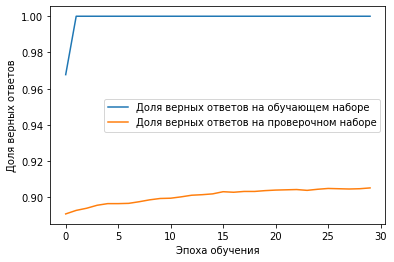

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 3s 197us/sample - loss: 0.0913 - acc: 0.9630 - val_loss: 0.3152 - val_acc: 0.8918
Epoch 2/30
17658/17658 [==============================] - 3s 184us/sample - loss: 7.7755e-05 - acc: 1.0000 - val_loss: 0.3015 - val_acc: 0.8968
Epoch 3/30
17658/17658 [==============================] - 3s 184us/sample - loss: 4.0056e-05 - acc: 1.0000 - val_loss: 0.2947 - val_acc: 0.8980
Epoch 4/30
17658/17658 [==============================] - 3s 186us/sample - loss: 2.4767e-05 - acc: 1.0000 - val_loss: 0.2888 - val_acc: 0.8983
Epoch 5/30
17658/17658 [==============================] - 3s 185us/sample - loss: 1.6929e-05 - acc: 1.0000 - val_loss: 0.2842 - val_acc: 0.8999
Epoch 6/30
17658/17658 [==============================] - 3s 183us/sample - loss: 1.2253e-05 - acc: 1.0000 - val_loss: 0.2801 - val_acc: 0.9014
Epoch 7/30
17658/17658 [==============================] - 3s 182us/sample - loss: 9.2490e-0

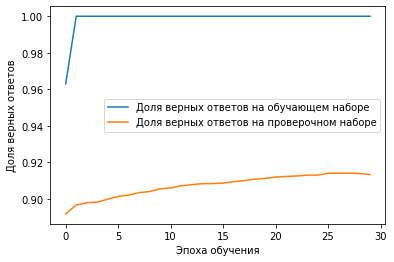

[[200, 'relu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9093]

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 200us/sample - loss: 0.0859 - acc: 0.9649 - val_loss: 0.3073 - val_acc: 0.9026
Epoch 2/30
17658/17658 [==============================] - 3s 190us/sample - loss: 8.4263e-05 - acc: 1.0000 - val_loss: 0.2994 - val_acc: 0.9024
Epoch 3/30
17658/17658 [==============================] - 3s 189us/sample - loss: 4.6011e-05 - acc: 1.0000 - val_loss: 0.2955 - val_acc: 0.9024
Epoch 4/30
17658/17658 [==============================] - 3s 190us/sample - loss: 2.9345e-05 - acc: 1.0000 - val_loss: 0.2910 - val_acc: 0.9032
Epoch 5/30
17658/17658 [==============================] - 3s 190us/sample - loss: 2.0299e-05 - acc: 1.0000 - val_loss: 0.2891 - val_acc: 0.9029
Epoch 6/30
17658/17658 [==============================] - 3s 190us/sample - loss: 1.4822e-05 - acc: 1.0000 - val_loss: 0.2875 - val_acc: 0.9033
Epoch 7/30
17658/17658 [====

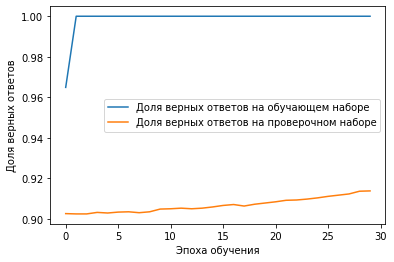

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 3s 197us/sample - loss: 0.0790 - acc: 0.9675 - val_loss: 0.3340 - val_acc: 0.8905
Epoch 2/30
17658/17658 [==============================] - 3s 182us/sample - loss: 7.6690e-05 - acc: 1.0000 - val_loss: 0.3143 - val_acc: 0.8956
Epoch 3/30
17658/17658 [==============================] - 3s 185us/sample - loss: 4.4499e-05 - acc: 1.0000 - val_loss: 0.3028 - val_acc: 0.8984
Epoch 4/30
17658/17658 [==============================] - 3s 181us/sample - loss: 2.8490e-05 - acc: 1.0000 - val_loss: 0.2932 - val_acc: 0.9012
Epoch 5/30
17658/17658 [==============================] - 3s 179us/sample - loss: 1.9950e-05 - acc: 1.0000 - val_loss: 0.2885 - val_acc: 0.9020
Epoch 6/30
17658/17658 [==============================] - 3s 183us/sample - loss: 1.4737e-05 - acc: 1.0000 - val_loss: 0.2857 - val_acc: 0.9023
Epoch 7/30
17658/17658 [==============================] - 3s 187us/sample - loss: 1.1360e-0

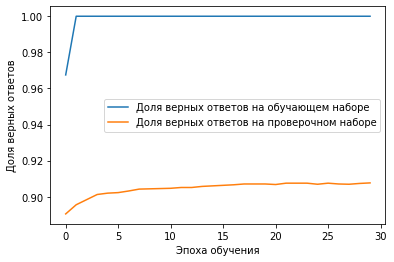

[[250, 'relu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9107]

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 199us/sample - loss: 0.0841 - acc: 0.9603 - val_loss: 0.2863 - val_acc: 0.8996
Epoch 2/30
17658/17658 [==============================] - 3s 185us/sample - loss: 6.1183e-05 - acc: 1.0000 - val_loss: 0.2788 - val_acc: 0.9015
Epoch 3/30
17658/17658 [==============================] - 3s 184us/sample - loss: 3.4720e-05 - acc: 1.0000 - val_loss: 0.2729 - val_acc: 0.9029
Epoch 4/30
17658/17658 [==============================] - 3s 183us/sample - loss: 2.1566e-05 - acc: 1.0000 - val_loss: 0.2688 - val_acc: 0.9041
Epoch 5/30
17658/17658 [==============================] - 3s 185us/sample - loss: 1.4778e-05 - acc: 1.0000 - val_loss: 0.2670 - val_acc: 0.9057
Epoch 6/30
17658/17658 [==============================] - 3s 184us/sample - loss: 1.0760e-05 - acc: 1.0000 - val_loss: 0.2654 - val_acc: 0.9069
Epoch 7/30
17658/17658 [====

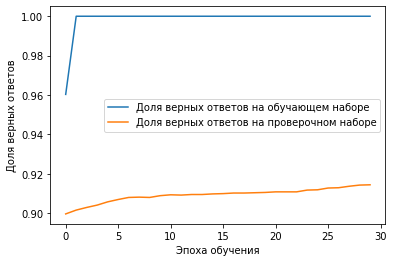

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 201us/sample - loss: 0.0726 - acc: 0.9708 - val_loss: 0.3038 - val_acc: 0.8942
Epoch 2/30
17658/17658 [==============================] - 3s 184us/sample - loss: 6.0506e-05 - acc: 1.0000 - val_loss: 0.3055 - val_acc: 0.8929
Epoch 3/30
17658/17658 [==============================] - 3s 185us/sample - loss: 3.5346e-05 - acc: 1.0000 - val_loss: 0.3022 - val_acc: 0.8924
Epoch 4/30
17658/17658 [==============================] - 3s 186us/sample - loss: 2.1909e-05 - acc: 1.0000 - val_loss: 0.3004 - val_acc: 0.8932
Epoch 5/30
17658/17658 [==============================] - 3s 186us/sample - loss: 1.4925e-05 - acc: 1.0000 - val_loss: 0.2978 - val_acc: 0.8941
Epoch 6/30
17658/17658 [==============================] - 3s 186us/sample - loss: 1.0833e-05 - acc: 1.0000 - val_loss: 0.2947 - val_acc: 0.8954
Epoch 7/30
17658/17658 [==============================] - 3s 184us/sample - loss: 8.2061e-0

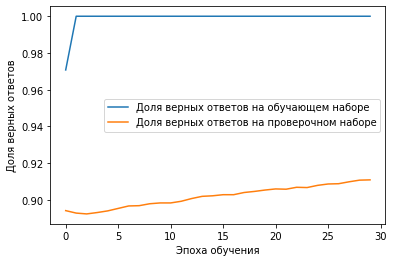

[[300, 'relu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9127]

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 204us/sample - loss: 0.0677 - acc: 0.9747 - val_loss: 0.2776 - val_acc: 0.9099
Epoch 2/30
17658/17658 [==============================] - 3s 188us/sample - loss: 3.0681e-05 - acc: 1.0000 - val_loss: 0.2653 - val_acc: 0.9154
Epoch 3/30
17658/17658 [==============================] - 3s 187us/sample - loss: 1.8848e-05 - acc: 1.0000 - val_loss: 0.2599 - val_acc: 0.9177
Epoch 4/30
17658/17658 [==============================] - 3s 189us/sample - loss: 1.2973e-05 - acc: 1.0000 - val_loss: 0.2553 - val_acc: 0.9190
Epoch 5/30
17658/17658 [==============================] - 3s 188us/sample - loss: 9.5418e-06 - acc: 1.0000 - val_loss: 0.2528 - val_acc: 0.9198
Epoch 6/30
17658/17658 [==============================] - 3s 187us/sample - loss: 7.3576e-06 - acc: 1.0000 - val_loss: 0.2501 - val_acc: 0.9210
Epoch 7/30
17658/17658 [====

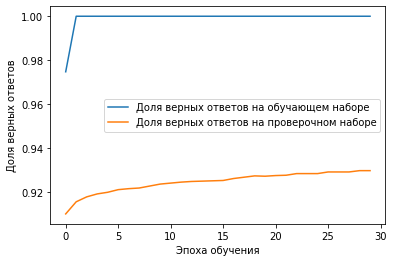

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 200us/sample - loss: 0.0743 - acc: 0.9674 - val_loss: 0.2934 - val_acc: 0.8960
Epoch 2/30
17658/17658 [==============================] - 3s 183us/sample - loss: 3.8228e-05 - acc: 1.0000 - val_loss: 0.2980 - val_acc: 0.8957
Epoch 3/30
17658/17658 [==============================] - 3s 184us/sample - loss: 2.3427e-05 - acc: 1.0000 - val_loss: 0.2983 - val_acc: 0.8956
Epoch 4/30
17658/17658 [==============================] - 3s 182us/sample - loss: 1.5970e-05 - acc: 1.0000 - val_loss: 0.2937 - val_acc: 0.8966
Epoch 5/30
17658/17658 [==============================] - 3s 183us/sample - loss: 1.1724e-05 - acc: 1.0000 - val_loss: 0.2905 - val_acc: 0.8983
Epoch 6/30
17658/17658 [==============================] - 3s 183us/sample - loss: 8.9958e-06 - acc: 1.0000 - val_loss: 0.2895 - val_acc: 0.8990
Epoch 7/30
17658/17658 [==============================] - 3s 182us/sample - loss: 7.1525e-0

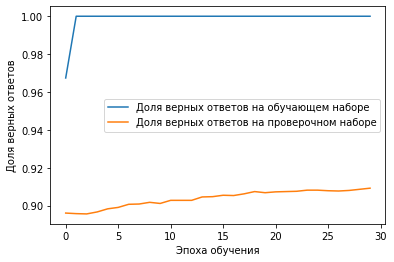

[[400, 'relu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9194]

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 205us/sample - loss: 0.0679 - acc: 0.9729 - val_loss: 0.2721 - val_acc: 0.9033
Epoch 2/30
17658/17658 [==============================] - 3s 186us/sample - loss: 2.8806e-05 - acc: 1.0000 - val_loss: 0.2700 - val_acc: 0.9044
Epoch 3/30
17658/17658 [==============================] - 3s 184us/sample - loss: 1.7955e-05 - acc: 1.0000 - val_loss: 0.2675 - val_acc: 0.9056
Epoch 4/30
17658/17658 [==============================] - 3s 186us/sample - loss: 1.2542e-05 - acc: 1.0000 - val_loss: 0.2657 - val_acc: 0.9077
Epoch 5/30
17658/17658 [==============================] - 3s 185us/sample - loss: 9.3560e-06 - acc: 1.0000 - val_loss: 0.2635 - val_acc: 0.9098
Epoch 6/30
17658/17658 [==============================] - 3s 184us/sample - loss: 7.2945e-06 - acc: 1.0000 - val_loss: 0.2621 - val_acc: 0.9104
Epoch 7/30
17658/17658 [====

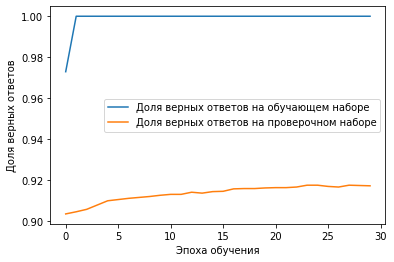

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 3s 193us/sample - loss: 0.0924 - acc: 0.9515 - val_loss: 0.2844 - val_acc: 0.8994
Epoch 2/30
17658/17658 [==============================] - 3s 173us/sample - loss: 2.9714e-05 - acc: 1.0000 - val_loss: 0.2748 - val_acc: 0.9026
Epoch 3/30
17658/17658 [==============================] - 3s 172us/sample - loss: 1.8295e-05 - acc: 1.0000 - val_loss: 0.2716 - val_acc: 0.9050
Epoch 4/30
17658/17658 [==============================] - 3s 174us/sample - loss: 1.2609e-05 - acc: 1.0000 - val_loss: 0.2694 - val_acc: 0.9056
Epoch 5/30
17658/17658 [==============================] - 3s 173us/sample - loss: 9.1926e-06 - acc: 1.0000 - val_loss: 0.2677 - val_acc: 0.9069
Epoch 6/30
17658/17658 [==============================] - 3s 173us/sample - loss: 6.9407e-06 - acc: 1.0000 - val_loss: 0.2632 - val_acc: 0.9066
Epoch 7/30
17658/17658 [==============================] - 3s 173us/sample - loss: 5.6173e-0

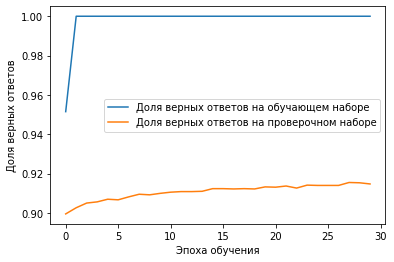

[[500, 'relu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9159]

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 204us/sample - loss: 0.0813 - acc: 0.9597 - val_loss: 0.2429 - val_acc: 0.9162
Epoch 2/30
17658/17658 [==============================] - 3s 180us/sample - loss: 1.6206e-05 - acc: 1.0000 - val_loss: 0.2500 - val_acc: 0.9157
Epoch 3/30
17658/17658 [==============================] - 3s 182us/sample - loss: 1.0950e-05 - acc: 1.0000 - val_loss: 0.2557 - val_acc: 0.9133
Epoch 4/30
17658/17658 [==============================] - 3s 181us/sample - loss: 7.9843e-06 - acc: 1.0000 - val_loss: 0.2603 - val_acc: 0.9126
Epoch 5/30
17658/17658 [==============================] - 3s 181us/sample - loss: 6.2396e-06 - acc: 1.0000 - val_loss: 0.2643 - val_acc: 0.9111
Epoch 6/30
17658/17658 [==============================] - 3s 179us/sample - loss: 4.9476e-06 - acc: 1.0000 - val_loss: 0.2651 - val_acc: 0.9110
Epoch 7/30
17658/17658 [====

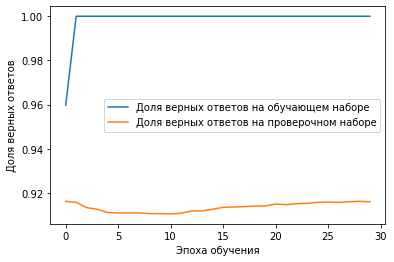

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 203us/sample - loss: 0.1331 - acc: 0.9160 - val_loss: 0.9064 - val_acc: 0.8101
Epoch 2/30
17658/17658 [==============================] - 3s 181us/sample - loss: 1.1529e-05 - acc: 1.0000 - val_loss: 0.8239 - val_acc: 0.8225
Epoch 3/30
17658/17658 [==============================] - 3s 184us/sample - loss: 7.7193e-06 - acc: 1.0000 - val_loss: 0.7795 - val_acc: 0.8294
Epoch 4/30
17658/17658 [==============================] - 3s 182us/sample - loss: 5.6202e-06 - acc: 1.0000 - val_loss: 0.7273 - val_acc: 0.8346
Epoch 5/30
17658/17658 [==============================] - 3s 180us/sample - loss: 4.2937e-06 - acc: 1.0000 - val_loss: 0.6998 - val_acc: 0.8410
Epoch 6/30
17658/17658 [==============================] - 3s 182us/sample - loss: 3.6803e-06 - acc: 1.0000 - val_loss: 0.6768 - val_acc: 0.8473
Epoch 7/30
17658/17658 [==============================] - 3s 181us/sample - loss: 2.9540e-0

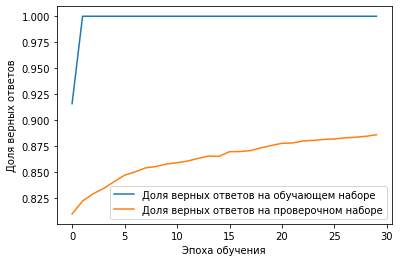

[[750, 'relu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9011]

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 220us/sample - loss: 0.0653 - acc: 0.9699 - val_loss: 0.4140 - val_acc: 0.8775
Epoch 2/30
17658/17658 [==============================] - 3s 196us/sample - loss: 8.6168e-06 - acc: 1.0000 - val_loss: 0.3834 - val_acc: 0.8875
Epoch 3/30
17658/17658 [==============================] - 3s 195us/sample - loss: 5.3891e-06 - acc: 1.0000 - val_loss: 0.3896 - val_acc: 0.8938
Epoch 4/30
17658/17658 [==============================] - 3s 198us/sample - loss: 3.8628e-06 - acc: 1.0000 - val_loss: 0.3735 - val_acc: 0.8962
Epoch 5/30
17658/17658 [==============================] - 3s 197us/sample - loss: 2.7348e-06 - acc: 1.0000 - val_loss: 0.3726 - val_acc: 0.8984
Epoch 6/30
17658/17658 [==============================] - 3s 197us/sample - loss: 2.2141e-06 - acc: 1.0000 - val_loss: 0.3530 - val_acc: 0.9003
Epoch 7/30
17658/17658 [====

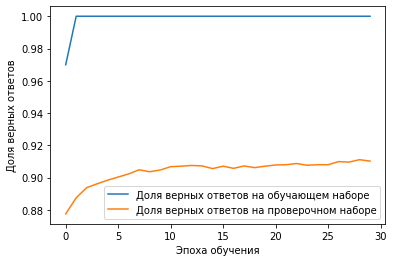

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 226us/sample - loss: 0.8410 - acc: 0.5714 - val_loss: 1.7915 - val_acc: 0.0781
Epoch 2/30
17658/17658 [==============================] - 4s 202us/sample - loss: 1.7918 - acc: 0.0904 - val_loss: 1.7915 - val_acc: 0.0781
Epoch 3/30
17658/17658 [==============================] - 4s 202us/sample - loss: 1.7918 - acc: 0.0904 - val_loss: 1.7915 - val_acc: 0.0781
Epoch 4/30
17658/17658 [==============================] - 4s 201us/sample - loss: 1.7918 - acc: 0.0904 - val_loss: 1.7915 - val_acc: 0.0781
Epoch 5/30
17658/17658 [==============================] - 4s 202us/sample - loss: 1.7918 - acc: 0.0904 - val_loss: 1.7915 - val_acc: 0.0781
Epoch 6/30
17658/17658 [==============================] - 4s 202us/sample - loss: 1.7918 - acc: 0.0904 - val_loss: 1.7915 - val_acc: 0.0781
Epoch 7/30
17658/17658 [==============================] - 4s 204us/sample - loss: 1.7918 - acc: 0.0904 - val_lo

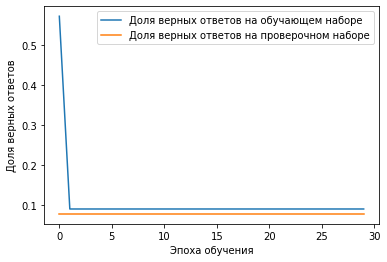

[[1000, 'relu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.4942]

Результаты тестирования архитектуры сети
[[50, 'relu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.8946]
[[100, 'relu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.8939]
[[150, 'relu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9116]
[[200, 'relu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9093]
[[250, 'relu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9107]
[[300, 'relu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9127]
[[400, 'relu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9194]
[[500, 'relu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9159]
[[750, 'relu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9011]
[[1000, 'relu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.4942]


In [0]:
# формируем обучающую и тествую выборку

data = [0, 20000, 1000, 100] # формат данных - (low_ind_dict = 0, size_dict = 20000, len_cut = 1000, step = 100)
xTrain, xTrain01, yTrain, xTest, xTest01, yTest = get_data(*data)

list_test_net = []
#Обучаем каждую сеть и выводим среднюю точность на проверочной выборке по 3 запускам
for currNet in net:
  acc = testModel(net = currNet, batch_size = 128, epochs = 30, iterations = 2)
  list_test_net.append([currNet, 'train_acc = ', round(sum(acc)/len(acc),4)])
  print(list_test_net[-1])
  print('='*100)
  print()

print('Результаты тестирования архитектуры сети')
for i in list_test_net:
  print(i)

### Наилучший результат с одним Dense слоем показала нейросеть с архитектурой
- [[400, 'relu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9194]

##  Исследуем влияние активационной функции для Dense слоя

In [0]:
# Список для записи результатов тестирования
list_test_net = []
# Создаём сети с различной архитектурой
net = []
net.append([400, 'relu', 0, 'relu', 0, 'relu'])
net.append([400, 'elu', 0, 'relu', 0, 'relu'])
net.append([400, 'selu', 0, 'relu', 0, 'relu'])
net.append([400, 'softplus', 0, 'relu', 0, 'relu'])
net.append([400, 'softsign', 0, 'relu', 0, 'relu'])
net.append([400, 'tanh', 0, 'relu', 0, 'relu'])
net.append([400, 'sigmoid', 0, 'relu', 0, 'relu'])
net.append([400, 'hard_sigmoid', 0, 'relu', 0, 'relu'])
net.append([400, 'exponential', 0, 'relu', 0, 'relu'])
net.append([400, 'linear', 0, 'relu', 0, 'relu'])

Искл. индексы ниже =  0
Размер словаря      =  20000
Длинна отрезка      =  1000
Шаг смещения       =  100
Обучающая база  (17658, 20000)
Тестовая   база  (6693, 20000)
Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 3s 193us/sample - loss: 0.0644 - acc: 0.9733 - val_loss: 0.3083 - val_acc: 0.8891
Epoch 2/30
17658/17658 [==============================] - 3s 168us/sample - loss: 2.9101e-05 - acc: 1.0000 - val_loss: 0.2849 - val_acc: 0.8988
Epoch 3/30
17658/17658 [==============================] - 3s 166us/sample - loss: 1.9209e-05 - acc: 1.0000 - val_loss: 0.2751 - val_acc: 0.9035
Epoch 4/30
17658/17658 [==============================] - 3s 170us/sample - loss: 1.4014e-05 - acc: 1.0000 - val_loss: 0.2697 - val_acc: 0.9050
Epoch 5/30
17658/17658 [==============================] - 3s 167us/sample - loss: 1.0884e-05 - acc: 1.0000 - val_loss: 0.2664 - val_acc: 0.9057
Epoch 6/30
17658/17658 [==============================] - 3s 167us

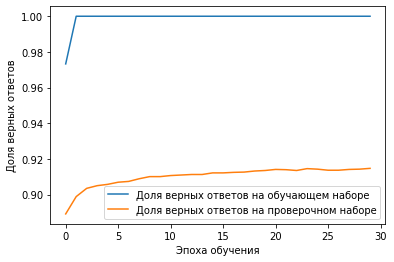

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 202us/sample - loss: 0.0891 - acc: 0.9582 - val_loss: 0.3384 - val_acc: 0.8845
Epoch 2/30
17658/17658 [==============================] - 3s 174us/sample - loss: 5.0771e-05 - acc: 1.0000 - val_loss: 0.3268 - val_acc: 0.8888
Epoch 3/30
17658/17658 [==============================] - 3s 179us/sample - loss: 2.9189e-05 - acc: 1.0000 - val_loss: 0.3199 - val_acc: 0.8914
Epoch 4/30
17658/17658 [==============================] - 3s 179us/sample - loss: 1.9047e-05 - acc: 1.0000 - val_loss: 0.3129 - val_acc: 0.8930
Epoch 5/30
17658/17658 [==============================] - 3s 174us/sample - loss: 1.3336e-05 - acc: 1.0000 - val_loss: 0.3080 - val_acc: 0.8936
Epoch 6/30
17658/17658 [==============================] - 3s 174us/sample - loss: 9.9338e-06 - acc: 1.0000 - val_loss: 0.3027 - val_acc: 0.8953
Epoch 7/30
17658/17658 [==============================] - 3s 179us/sample - loss: 7.6418e-0

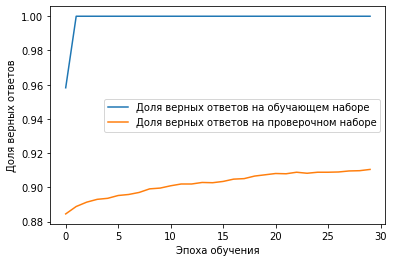

[[400, 'relu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9126]

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 206us/sample - loss: 0.0690 - acc: 0.9686 - val_loss: 0.3471 - val_acc: 0.8736
Epoch 2/30
17658/17658 [==============================] - 3s 178us/sample - loss: 6.1364e-05 - acc: 1.0000 - val_loss: 0.3247 - val_acc: 0.8823
Epoch 3/30
17658/17658 [==============================] - 3s 172us/sample - loss: 3.8905e-05 - acc: 1.0000 - val_loss: 0.3118 - val_acc: 0.8866
Epoch 4/30
17658/17658 [==============================] - 3s 177us/sample - loss: 2.7329e-05 - acc: 1.0000 - val_loss: 0.3017 - val_acc: 0.8906
Epoch 5/30
17658/17658 [==============================] - 3s 177us/sample - loss: 2.0548e-05 - acc: 1.0000 - val_loss: 0.2950 - val_acc: 0.8927
Epoch 6/30
17658/17658 [==============================] - 3s 176us/sample - loss: 1.6159e-05 - acc: 1.0000 - val_loss: 0.2896 - val_acc: 0.8947
Epoch 7/30
17658/17658 [====

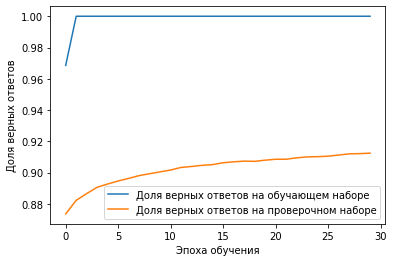

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 211us/sample - loss: 0.3120 - acc: 0.7316 - val_loss: 0.6701 - val_acc: 0.7851
Epoch 2/30
17658/17658 [==============================] - 3s 178us/sample - loss: 3.1406e-05 - acc: 1.0000 - val_loss: 0.5775 - val_acc: 0.8068
Epoch 3/30
17658/17658 [==============================] - 3s 176us/sample - loss: 1.4163e-05 - acc: 1.0000 - val_loss: 0.5239 - val_acc: 0.8215
Epoch 4/30
17658/17658 [==============================] - 3s 176us/sample - loss: 1.0294e-05 - acc: 1.0000 - val_loss: 0.4982 - val_acc: 0.8328
Epoch 5/30
17658/17658 [==============================] - 3s 178us/sample - loss: 8.2306e-06 - acc: 1.0000 - val_loss: 0.4584 - val_acc: 0.8412
Epoch 6/30
17658/17658 [==============================] - 3s 180us/sample - loss: 6.8509e-06 - acc: 1.0000 - val_loss: 0.4292 - val_acc: 0.8492
Epoch 7/30
17658/17658 [==============================] - 3s 175us/sample - loss: 5.6665e-0

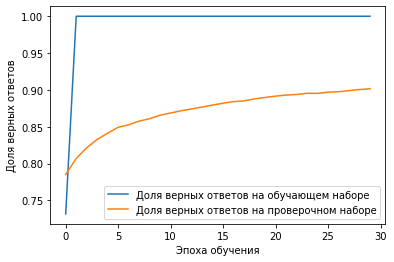

[[400, 'elu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.907]

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 215us/sample - loss: 0.3340 - acc: 0.7439 - val_loss: 0.6818 - val_acc: 0.8134
Epoch 2/30
17658/17658 [==============================] - 3s 181us/sample - loss: 2.0940e-05 - acc: 1.0000 - val_loss: 0.6418 - val_acc: 0.8201
Epoch 3/30
17658/17658 [==============================] - 3s 179us/sample - loss: 1.2180e-05 - acc: 1.0000 - val_loss: 0.6186 - val_acc: 0.8246
Epoch 4/30
17658/17658 [==============================] - 3s 181us/sample - loss: 9.2992e-06 - acc: 1.0000 - val_loss: 0.5886 - val_acc: 0.8318
Epoch 5/30
17658/17658 [==============================] - 3s 179us/sample - loss: 7.8156e-06 - acc: 1.0000 - val_loss: 0.5764 - val_acc: 0.8376
Epoch 6/30
17658/17658 [==============================] - 3s 179us/sample - loss: 6.5518e-06 - acc: 1.0000 - val_loss: 0.5550 - val_acc: 0.8425
Epoch 7/30
17658/17658 [======

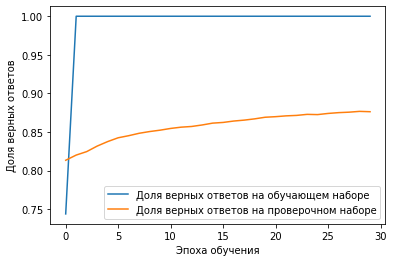

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 212us/sample - loss: 0.3103 - acc: 0.7426 - val_loss: 0.9902 - val_acc: 0.7956
Epoch 2/30
17658/17658 [==============================] - 3s 175us/sample - loss: 2.8240e-05 - acc: 1.0000 - val_loss: 0.9014 - val_acc: 0.8058
Epoch 3/30
17658/17658 [==============================] - 3s 177us/sample - loss: 1.3417e-05 - acc: 1.0000 - val_loss: 0.8382 - val_acc: 0.8122
Epoch 4/30
17658/17658 [==============================] - 3s 177us/sample - loss: 9.9080e-06 - acc: 1.0000 - val_loss: 0.8038 - val_acc: 0.8170
Epoch 5/30
17658/17658 [==============================] - 3s 176us/sample - loss: 7.7351e-06 - acc: 1.0000 - val_loss: 0.7803 - val_acc: 0.8213
Epoch 6/30
17658/17658 [==============================] - 3s 177us/sample - loss: 6.2612e-06 - acc: 1.0000 - val_loss: 0.7475 - val_acc: 0.8247
Epoch 7/30
17658/17658 [==============================] - 3s 174us/sample - loss: 5.3219e-0

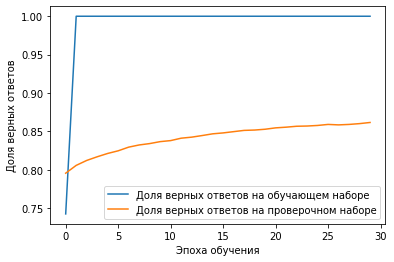

[[400, 'selu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.869]

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 215us/sample - loss: 0.2726 - acc: 0.7760 - val_loss: 0.5433 - val_acc: 0.8101
Epoch 2/30
17658/17658 [==============================] - 3s 184us/sample - loss: 2.7418e-05 - acc: 1.0000 - val_loss: 0.4722 - val_acc: 0.8297
Epoch 3/30
17658/17658 [==============================] - 3s 183us/sample - loss: 1.7124e-05 - acc: 1.0000 - val_loss: 0.4380 - val_acc: 0.8418
Epoch 4/30
17658/17658 [==============================] - 3s 179us/sample - loss: 1.3355e-05 - acc: 1.0000 - val_loss: 0.4095 - val_acc: 0.8503
Epoch 5/30
17658/17658 [==============================] - 3s 180us/sample - loss: 1.0650e-05 - acc: 1.0000 - val_loss: 0.3865 - val_acc: 0.8579
Epoch 6/30
17658/17658 [==============================] - 3s 179us/sample - loss: 8.7498e-06 - acc: 1.0000 - val_loss: 0.3704 - val_acc: 0.8634
Epoch 7/30
17658/17658 [=====

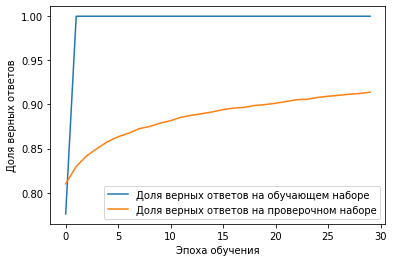

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 214us/sample - loss: 0.0691 - acc: 0.9784 - val_loss: 0.3048 - val_acc: 0.9053
Epoch 2/30
17658/17658 [==============================] - 3s 179us/sample - loss: 8.0876e-05 - acc: 1.0000 - val_loss: 0.2916 - val_acc: 0.9121
Epoch 3/30
17658/17658 [==============================] - 3s 180us/sample - loss: 4.9977e-05 - acc: 1.0000 - val_loss: 0.2856 - val_acc: 0.9127
Epoch 4/30
17658/17658 [==============================] - 3s 179us/sample - loss: 3.4168e-05 - acc: 1.0000 - val_loss: 0.2860 - val_acc: 0.9138
Epoch 5/30
17658/17658 [==============================] - 3s 184us/sample - loss: 2.5255e-05 - acc: 1.0000 - val_loss: 0.2810 - val_acc: 0.9150
Epoch 6/30
17658/17658 [==============================] - 3s 180us/sample - loss: 1.9312e-05 - acc: 1.0000 - val_loss: 0.2770 - val_acc: 0.9151
Epoch 7/30
17658/17658 [==============================] - 3s 177us/sample - loss: 1.5170e-0

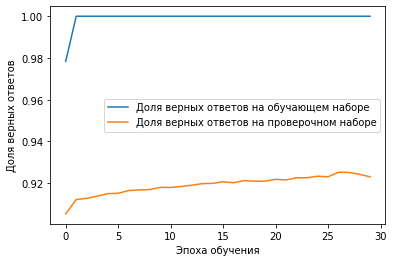

[[400, 'softplus', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9185]

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 212us/sample - loss: 0.1111 - acc: 0.9459 - val_loss: 0.3157 - val_acc: 0.9075
Epoch 2/30
17658/17658 [==============================] - 3s 179us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 0.3045 - val_acc: 0.9078
Epoch 3/30
17658/17658 [==============================] - 3s 178us/sample - loss: 5.9676e-04 - acc: 1.0000 - val_loss: 0.2948 - val_acc: 0.9087
Epoch 4/30
17658/17658 [==============================] - 3s 178us/sample - loss: 3.7745e-04 - acc: 1.0000 - val_loss: 0.2870 - val_acc: 0.9110
Epoch 5/30
17658/17658 [==============================] - 3s 178us/sample - loss: 2.6190e-04 - acc: 1.0000 - val_loss: 0.2816 - val_acc: 0.9130
Epoch 6/30
17658/17658 [==============================] - 3s 177us/sample - loss: 1.9301e-04 - acc: 1.0000 - val_loss: 0.2771 - val_acc: 0.9139
Epoch 7/30
17658/17658 [====

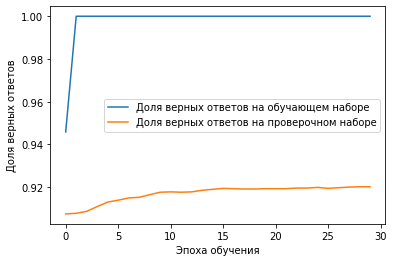

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 213us/sample - loss: 0.1096 - acc: 0.9427 - val_loss: 0.3171 - val_acc: 0.9015
Epoch 2/30
17658/17658 [==============================] - 3s 174us/sample - loss: 0.0010 - acc: 1.0000 - val_loss: 0.3045 - val_acc: 0.9041
Epoch 3/30
17658/17658 [==============================] - 3s 176us/sample - loss: 5.3588e-04 - acc: 1.0000 - val_loss: 0.2931 - val_acc: 0.9062
Epoch 4/30
17658/17658 [==============================] - 3s 175us/sample - loss: 3.3347e-04 - acc: 1.0000 - val_loss: 0.2861 - val_acc: 0.9056
Epoch 5/30
17658/17658 [==============================] - 3s 175us/sample - loss: 2.2938e-04 - acc: 1.0000 - val_loss: 0.2790 - val_acc: 0.9077
Epoch 6/30
17658/17658 [==============================] - 3s 175us/sample - loss: 1.6816e-04 - acc: 1.0000 - val_loss: 0.2737 - val_acc: 0.9093
Epoch 7/30
17658/17658 [==============================] - 3s 177us/sample - loss: 1.2881e-04 - 

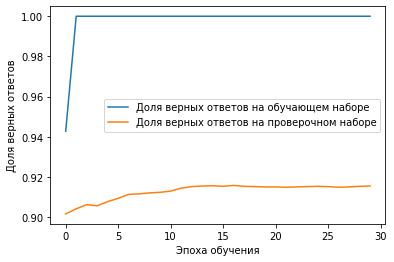

[[400, 'softsign', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9178]

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 213us/sample - loss: 0.1340 - acc: 0.9161 - val_loss: 0.3180 - val_acc: 0.8912
Epoch 2/30
17658/17658 [==============================] - 3s 174us/sample - loss: 3.5349e-04 - acc: 1.0000 - val_loss: 0.3102 - val_acc: 0.8926
Epoch 3/30
17658/17658 [==============================] - 3s 175us/sample - loss: 2.2500e-04 - acc: 1.0000 - val_loss: 0.3049 - val_acc: 0.8932
Epoch 4/30
17658/17658 [==============================] - 3s 175us/sample - loss: 1.5630e-04 - acc: 1.0000 - val_loss: 0.3005 - val_acc: 0.8948
Epoch 5/30
17658/17658 [==============================] - 3s 177us/sample - loss: 1.1514e-04 - acc: 1.0000 - val_loss: 0.2983 - val_acc: 0.8945
Epoch 6/30
17658/17658 [==============================] - 3s 177us/sample - loss: 8.8519e-05 - acc: 1.0000 - val_loss: 0.2954 - val_acc: 0.8954
Epoch 7/30
17658/17658 [

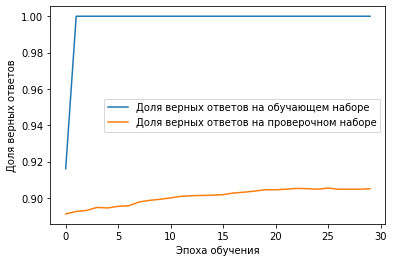

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 217us/sample - loss: 0.1480 - acc: 0.9043 - val_loss: 0.3256 - val_acc: 0.8860
Epoch 2/30
17658/17658 [==============================] - 3s 179us/sample - loss: 3.6298e-04 - acc: 1.0000 - val_loss: 0.3170 - val_acc: 0.8879
Epoch 3/30
17658/17658 [==============================] - 3s 178us/sample - loss: 2.2243e-04 - acc: 1.0000 - val_loss: 0.3150 - val_acc: 0.8875
Epoch 4/30
17658/17658 [==============================] - 3s 177us/sample - loss: 1.5142e-04 - acc: 1.0000 - val_loss: 0.3092 - val_acc: 0.8902
Epoch 5/30
17658/17658 [==============================] - 3s 180us/sample - loss: 1.1020e-04 - acc: 1.0000 - val_loss: 0.3057 - val_acc: 0.8915
Epoch 6/30
17658/17658 [==============================] - 3s 177us/sample - loss: 8.4019e-05 - acc: 1.0000 - val_loss: 0.3028 - val_acc: 0.8927
Epoch 7/30
17658/17658 [==============================] - 3s 176us/sample - loss: 6.6252e-0

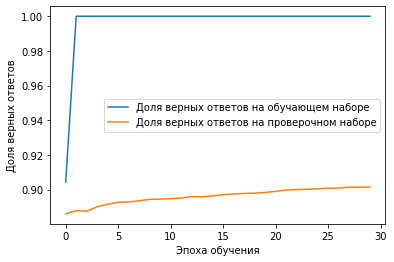

[[400, 'tanh', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9033]

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 220us/sample - loss: 0.1473 - acc: 0.9493 - val_loss: 0.3972 - val_acc: 0.9063
Epoch 2/30
17658/17658 [==============================] - 3s 178us/sample - loss: 0.0035 - acc: 1.0000 - val_loss: 0.3577 - val_acc: 0.9126
Epoch 3/30
17658/17658 [==============================] - 3s 178us/sample - loss: 0.0017 - acc: 1.0000 - val_loss: 0.3346 - val_acc: 0.9145
Epoch 4/30
17658/17658 [==============================] - 3s 179us/sample - loss: 0.0010 - acc: 1.0000 - val_loss: 0.3205 - val_acc: 0.9156
Epoch 5/30
17658/17658 [==============================] - 3s 178us/sample - loss: 7.0465e-04 - acc: 1.0000 - val_loss: 0.3090 - val_acc: 0.9175
Epoch 6/30
17658/17658 [==============================] - 3s 178us/sample - loss: 5.1298e-04 - acc: 1.0000 - val_loss: 0.2998 - val_acc: 0.9178
Epoch 7/30
17658/17658 [================

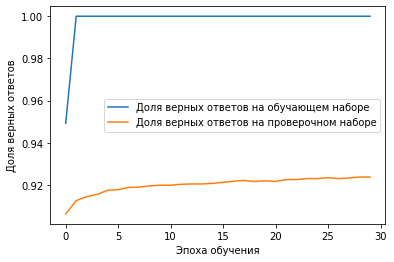

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 198us/sample - loss: 0.1611 - acc: 0.9373 - val_loss: 0.4072 - val_acc: 0.8953
Epoch 2/30
17658/17658 [==============================] - 3s 160us/sample - loss: 0.0033 - acc: 1.0000 - val_loss: 0.3693 - val_acc: 0.8987
Epoch 3/30
17658/17658 [==============================] - 3s 161us/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 0.3465 - val_acc: 0.9027
Epoch 4/30
17658/17658 [==============================] - 3s 159us/sample - loss: 9.8447e-04 - acc: 1.0000 - val_loss: 0.3304 - val_acc: 0.9071
Epoch 5/30
17658/17658 [==============================] - 3s 162us/sample - loss: 6.7134e-04 - acc: 1.0000 - val_loss: 0.3207 - val_acc: 0.9068
Epoch 6/30
17658/17658 [==============================] - 3s 159us/sample - loss: 4.8992e-04 - acc: 1.0000 - val_loss: 0.3123 - val_acc: 0.9086
Epoch 7/30
17658/17658 [==============================] - 3s 159us/sample - loss: 3.7445e-04 - acc:

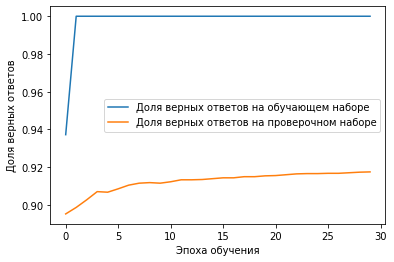

[[400, 'sigmoid', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9207]

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 208us/sample - loss: 0.1596 - acc: 0.9348 - val_loss: 0.4026 - val_acc: 0.8996
Epoch 2/30
17658/17658 [==============================] - 3s 171us/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3728 - val_acc: 0.9032
Epoch 3/30
17658/17658 [==============================] - 3s 171us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.3532 - val_acc: 0.9048
Epoch 4/30
17658/17658 [==============================] - 3s 174us/sample - loss: 7.6583e-04 - acc: 1.0000 - val_loss: 0.3392 - val_acc: 0.9080
Epoch 5/30
17658/17658 [==============================] - 3s 177us/sample - loss: 5.1698e-04 - acc: 1.0000 - val_loss: 0.3304 - val_acc: 0.9086
Epoch 6/30
17658/17658 [==============================] - 3s 172us/sample - loss: 3.7440e-04 - acc: 1.0000 - val_loss: 0.3218 - val_acc: 0.9102
Epoch 7/30
17658/17658 [=========

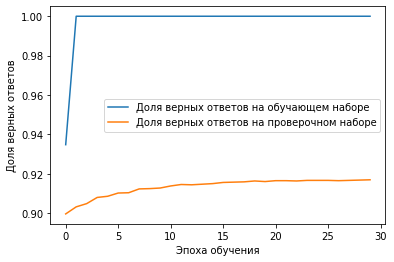

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 204us/sample - loss: 0.1424 - acc: 0.9531 - val_loss: 0.4060 - val_acc: 0.9066
Epoch 2/30
17658/17658 [==============================] - 3s 162us/sample - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3694 - val_acc: 0.9129
Epoch 3/30
17658/17658 [==============================] - 3s 157us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3499 - val_acc: 0.9151
Epoch 4/30
17658/17658 [==============================] - 3s 160us/sample - loss: 8.6629e-04 - acc: 1.0000 - val_loss: 0.3362 - val_acc: 0.9156
Epoch 5/30
17658/17658 [==============================] - 3s 157us/sample - loss: 5.8137e-04 - acc: 1.0000 - val_loss: 0.3270 - val_acc: 0.9171
Epoch 6/30
17658/17658 [==============================] - 3s 160us/sample - loss: 4.1939e-04 - acc: 1.0000 - val_loss: 0.3193 - val_acc: 0.9172
Epoch 7/30
17658/17658 [==============================] - 3s 161us/sample - loss: 3.1767e-04 - acc:

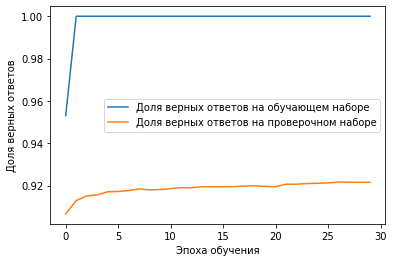

[[400, 'hard_sigmoid', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9192]

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 198us/sample - loss: 0.5161 - acc: 0.6782 - val_loss: 1.7158 - val_acc: 0.2945
Epoch 2/30
17658/17658 [==============================] - 3s 156us/sample - loss: 0.4702 - acc: 0.7630 - val_loss: 1.7509 - val_acc: 0.2946
Epoch 3/30
17658/17658 [==============================] - 3s 157us/sample - loss: 0.4702 - acc: 0.7666 - val_loss: 1.7808 - val_acc: 0.2945
Epoch 4/30
17658/17658 [==============================] - 3s 158us/sample - loss: 0.4701 - acc: 0.7686 - val_loss: 1.8061 - val_acc: 0.2945
Epoch 5/30
17658/17658 [==============================] - 3s 156us/sample - loss: 0.4701 - acc: 0.7720 - val_loss: 1.8287 - val_acc: 0.2946
Epoch 6/30
17658/17658 [==============================] - 3s 159us/sample - loss: 0.4701 - acc: 0.7738 - val_loss: 1.8475 - val_acc: 0.2945
Epoch 7/30
17658/17658 [================

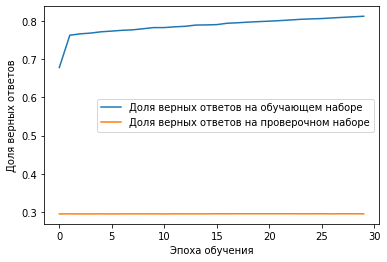

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 216us/sample - loss: 0.9359 - acc: 0.3564 - val_loss: 1.3345 - val_acc: 0.2081
Epoch 2/30
17658/17658 [==============================] - 3s 165us/sample - loss: 0.9082 - acc: 0.3458 - val_loss: 1.3716 - val_acc: 0.2068
Epoch 3/30
17658/17658 [==============================] - 3s 162us/sample - loss: 0.9082 - acc: 0.3458 - val_loss: 1.3982 - val_acc: 0.2053
Epoch 4/30
17658/17658 [==============================] - 3s 163us/sample - loss: 0.9082 - acc: 0.3459 - val_loss: 1.4189 - val_acc: 0.2048
Epoch 5/30
17658/17658 [==============================] - 3s 163us/sample - loss: 0.9082 - acc: 0.3462 - val_loss: 1.4356 - val_acc: 0.2044
Epoch 6/30
17658/17658 [==============================] - 3s 164us/sample - loss: 0.9082 - acc: 0.3482 - val_loss: 1.4487 - val_acc: 0.2039
Epoch 7/30
17658/17658 [==============================] - 3s 160us/sample - loss: 0.9082 - acc: 0.3494 - val_lo

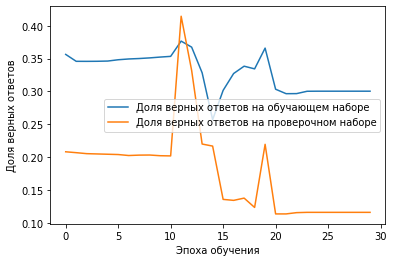

[[400, 'exponential', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.2054]

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 207us/sample - loss: 0.1146 - acc: 0.9369 - val_loss: 0.5294 - val_acc: 0.8422
Epoch 2/30
17658/17658 [==============================] - 3s 163us/sample - loss: 1.7925e-05 - acc: 1.0000 - val_loss: 0.5038 - val_acc: 0.8448
Epoch 3/30
17658/17658 [==============================] - 3s 160us/sample - loss: 1.2066e-05 - acc: 1.0000 - val_loss: 0.4798 - val_acc: 0.8497
Epoch 4/30
17658/17658 [==============================] - 3s 162us/sample - loss: 9.2020e-06 - acc: 1.0000 - val_loss: 0.4695 - val_acc: 0.8543
Epoch 5/30
17658/17658 [==============================] - 3s 161us/sample - loss: 7.4174e-06 - acc: 1.0000 - val_loss: 0.4438 - val_acc: 0.8575
Epoch 6/30
17658/17658 [==============================] - 3s 161us/sample - loss: 6.2241e-06 - acc: 1.0000 - val_loss: 0.4342 - val_acc: 0.8600
Epoch 7/30
17658/1765

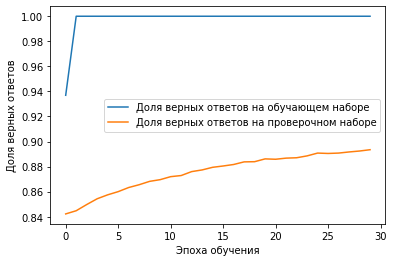

Train on 17658 samples, validate on 6693 samples
Epoch 1/30
17658/17658 [==============================] - 4s 211us/sample - loss: 0.0872 - acc: 0.9572 - val_loss: 0.3034 - val_acc: 0.8954
Epoch 2/30
17658/17658 [==============================] - 3s 166us/sample - loss: 2.6912e-05 - acc: 1.0000 - val_loss: 0.3107 - val_acc: 0.8944
Epoch 3/30
17658/17658 [==============================] - 3s 165us/sample - loss: 1.8247e-05 - acc: 1.0000 - val_loss: 0.3157 - val_acc: 0.8945
Epoch 4/30
17658/17658 [==============================] - 3s 164us/sample - loss: 1.4158e-05 - acc: 1.0000 - val_loss: 0.3166 - val_acc: 0.8951
Epoch 5/30
17658/17658 [==============================] - 3s 164us/sample - loss: 1.0888e-05 - acc: 1.0000 - val_loss: 0.3190 - val_acc: 0.8954
Epoch 6/30
17658/17658 [==============================] - 3s 165us/sample - loss: 9.0139e-06 - acc: 1.0000 - val_loss: 0.3197 - val_acc: 0.8953
Epoch 7/30
17658/17658 [==============================] - 3s 161us/sample - loss: 7.7054e-0

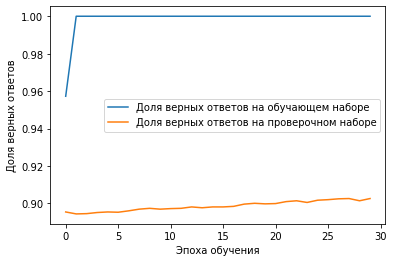

[[400, 'linear', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.898]

Результаты тестирования архитектуры сети
[[400, 'relu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9126]
[[400, 'elu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.907]
[[400, 'selu', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.869]
[[400, 'softplus', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9185]
[[400, 'softsign', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9178]
[[400, 'tanh', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9033]
[[400, 'sigmoid', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9207]
[[400, 'hard_sigmoid', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9192]
[[400, 'exponential', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.2054]
[[400, 'linear', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.898]


In [0]:
# формируем обучающую и тествую выборку

data = [0, 20000, 1000, 100] # формат данных - (low_ind_dict = 0, size_dict = 20000, len_cut = 1000, step = 100)
xTrain, xTrain01, yTrain, xTest, xTest01, yTest = get_data(*data)

list_test_net = []
#Обучаем каждую сеть и выводим среднюю точность на проверочной выборке по 3 запускам
for currNet in net:
  acc = testModel(net = currNet, batch_size = 128, epochs = 30, iterations = 2)
  list_test_net.append([currNet, 'train_acc = ', round(sum(acc)/len(acc),4)])
  print(list_test_net[-1])
  print('='*100)
  print()

print('Результаты тестирования архитектуры сети')
for i in list_test_net:
  print(i)

### Вывод: Наилучший результат показала функция 
- [400, 'sigmoid', 0, 'relu', 0, 'relu'], 'train_acc = ', 0.9207]

## Двухлойные нейросети

In [0]:
# Список для записи результатов тестирования
list_test_net = []
# Создаём сети с различной архитектурой
net = []
net.append([50, 'relu', 50, 'relu', 0, 'relu'])
net.append([50, 'relu', 100, 'relu', 0, 'relu'])
net.append([50, 'relu', 150, 'relu', 0, 'relu'])
net.append([50, 'relu', 200, 'relu', 0, 'relu'])
net.append([50, 'relu', 250, 'relu', 0, 'relu'])

net.append([100, 'relu', 50, 'relu', 0, 'relu'])
net.append([100, 'relu', 100, 'relu', 0, 'relu'])
net.append([100, 'relu', 150, 'relu', 0, 'relu'])
net.append([100, 'relu', 200, 'relu', 0, 'relu'])
net.append([100, 'relu', 250, 'relu', 0, 'relu'])

net.append([150, 'relu', 50, 'relu', 0, 'relu'])
net.append([150, 'relu', 100, 'relu', 0, 'relu'])
net.append([150, 'relu', 150, 'relu', 0, 'relu'])
net.append([150, 'relu', 200, 'relu', 0, 'relu'])
net.append([150, 'relu', 250, 'relu', 0, 'relu'])

net.append([200, 'relu', 50, 'relu', 0, 'relu'])
net.append([200, 'relu', 100, 'relu', 0, 'relu'])
net.append([200, 'relu', 150, 'relu', 0, 'relu'])
net.append([200, 'relu', 200, 'relu', 0, 'relu'])
net.append([200, 'relu', 250, 'relu', 0, 'relu'])

net.append([250, 'relu', 50, 'relu', 0, 'relu'])
net.append([250, 'relu', 100, 'relu', 0, 'relu'])
net.append([250, 'relu', 150, 'relu', 0, 'relu'])
net.append([250, 'relu', 200, 'relu', 0, 'relu'])
net.append([250, 'relu', 250, 'relu', 0, 'relu'])

Искл. индексы ниже =  0
Размер словаря      =  20000
Длинна отрезка      =  1000
Шаг смещения       =  100
Обучающая база  (17658, 20000)
Тестовая   база  (6693, 20000)
Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 313us/sample - loss: 0.1552 - acc: 0.9439 - val_loss: 0.3548 - val_acc: 0.9042
Epoch 2/35
17658/17658 [==============================] - 4s 199us/sample - loss: 3.9078e-04 - acc: 1.0000 - val_loss: 0.3353 - val_acc: 0.9059
Epoch 3/35
17658/17658 [==============================] - 4s 201us/sample - loss: 1.3702e-04 - acc: 1.0000 - val_loss: 0.3102 - val_acc: 0.9038
Epoch 4/35
17658/17658 [==============================] - 4s 200us/sample - loss: 4.7199e-05 - acc: 1.0000 - val_loss: 0.2985 - val_acc: 0.9060
Epoch 5/35
17658/17658 [==============================] - 4s 200us/sample - loss: 2.5792e-05 - acc: 1.0000 - val_loss: 0.2946 - val_acc: 0.9048
Epoch 6/35
17658/17658 [==============================] - 4s 200us

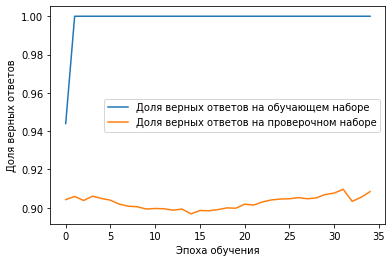

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 317us/sample - loss: 0.1563 - acc: 0.9593 - val_loss: 0.3689 - val_acc: 0.8885
Epoch 2/35
17658/17658 [==============================] - 4s 200us/sample - loss: 4.4114e-04 - acc: 1.0000 - val_loss: 0.3472 - val_acc: 0.8917
Epoch 3/35
17658/17658 [==============================] - 4s 200us/sample - loss: 2.2414e-04 - acc: 1.0000 - val_loss: 0.3411 - val_acc: 0.8917
Epoch 4/35
17658/17658 [==============================] - 4s 200us/sample - loss: 1.3608e-04 - acc: 1.0000 - val_loss: 0.3326 - val_acc: 0.8930
Epoch 5/35
17658/17658 [==============================] - 4s 200us/sample - loss: 9.1302e-05 - acc: 1.0000 - val_loss: 0.3276 - val_acc: 0.8936
Epoch 6/35
17658/17658 [==============================] - 4s 201us/sample - loss: 6.5432e-05 - acc: 1.0000 - val_loss: 0.3221 - val_acc: 0.8938
Epoch 7/35
17658/17658 [==============================] - 4s 200us/sample - loss: 4.8704e-0

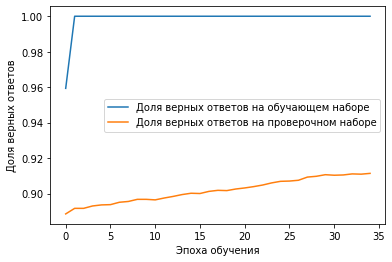

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 319us/sample - loss: 0.2075 - acc: 0.9388 - val_loss: 0.3782 - val_acc: 0.8863
Epoch 2/35
17658/17658 [==============================] - 4s 201us/sample - loss: 3.5372e-04 - acc: 1.0000 - val_loss: 0.3578 - val_acc: 0.8860
Epoch 3/35
17658/17658 [==============================] - 4s 201us/sample - loss: 9.1966e-05 - acc: 1.0000 - val_loss: 0.3469 - val_acc: 0.8851
Epoch 4/35
17658/17658 [==============================] - 4s 200us/sample - loss: 3.9083e-05 - acc: 1.0000 - val_loss: 0.3383 - val_acc: 0.8873
Epoch 5/35
17658/17658 [==============================] - 4s 200us/sample - loss: 2.2529e-05 - acc: 1.0000 - val_loss: 0.3302 - val_acc: 0.8899
Epoch 6/35
17658/17658 [==============================] - 4s 199us/sample - loss: 1.5171e-05 - acc: 1.0000 - val_loss: 0.3297 - val_acc: 0.8911
Epoch 7/35
17658/17658 [==============================] - 4s 201us/sample - loss: 1.0964e-0

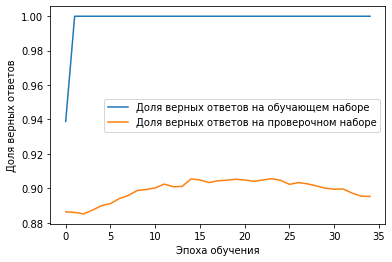

[[50, 'relu', 50, 'relu', 0, 'relu'], 'train_acc = ', 0.905]

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 320us/sample - loss: 0.1807 - acc: 0.9353 - val_loss: 0.3517 - val_acc: 0.8902
Epoch 2/35
17658/17658 [==============================] - 4s 201us/sample - loss: 1.6832e-04 - acc: 1.0000 - val_loss: 0.3166 - val_acc: 0.9015
Epoch 3/35
17658/17658 [==============================] - 4s 200us/sample - loss: 4.6027e-05 - acc: 1.0000 - val_loss: 0.3021 - val_acc: 0.9039
Epoch 4/35
17658/17658 [==============================] - 4s 199us/sample - loss: 2.2418e-05 - acc: 1.0000 - val_loss: 0.2908 - val_acc: 0.9071
Epoch 5/35
17658/17658 [==============================] - 4s 200us/sample - loss: 1.3112e-05 - acc: 1.0000 - val_loss: 0.2852 - val_acc: 0.9068
Epoch 6/35
17658/17658 [==============================] - 3s 197us/sample - loss: 8.6525e-06 - acc: 1.0000 - val_loss: 0.2800 - val_acc: 0.9084
Epoch 7/35
17658/17658 [=====

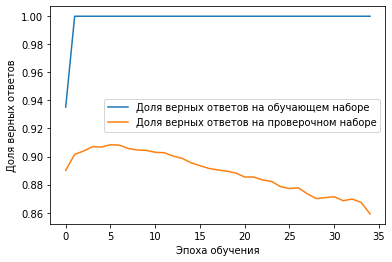

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 320us/sample - loss: 0.1460 - acc: 0.9619 - val_loss: 0.4149 - val_acc: 0.8516
Epoch 2/35
17658/17658 [==============================] - 4s 201us/sample - loss: 2.3815e-04 - acc: 1.0000 - val_loss: 0.3934 - val_acc: 0.8570
Epoch 3/35
17658/17658 [==============================] - 4s 199us/sample - loss: 1.0435e-04 - acc: 1.0000 - val_loss: 0.3738 - val_acc: 0.8646
Epoch 4/35
17658/17658 [==============================] - 4s 200us/sample - loss: 5.5752e-05 - acc: 1.0000 - val_loss: 0.3722 - val_acc: 0.8648
Epoch 5/35
17658/17658 [==============================] - 4s 200us/sample - loss: 3.4252e-05 - acc: 1.0000 - val_loss: 0.3649 - val_acc: 0.8678
Epoch 6/35
17658/17658 [==============================] - 4s 201us/sample - loss: 2.3096e-05 - acc: 1.0000 - val_loss: 0.3616 - val_acc: 0.8673
Epoch 7/35
17658/17658 [==============================] - 4s 202us/sample - loss: 1.6603e-0

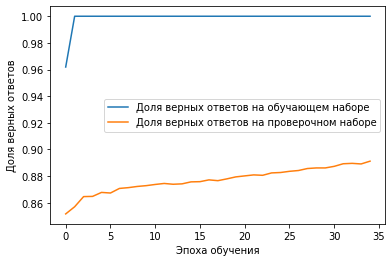

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 323us/sample - loss: 0.1360 - acc: 0.9564 - val_loss: 0.3905 - val_acc: 0.8730
Epoch 2/35
17658/17658 [==============================] - 4s 199us/sample - loss: 2.2958e-04 - acc: 1.0000 - val_loss: 0.3587 - val_acc: 0.8844
Epoch 3/35
17658/17658 [==============================] - 4s 200us/sample - loss: 1.0290e-04 - acc: 1.0000 - val_loss: 0.3361 - val_acc: 0.8930
Epoch 4/35
17658/17658 [==============================] - 4s 200us/sample - loss: 5.7961e-05 - acc: 1.0000 - val_loss: 0.3275 - val_acc: 0.8938
Epoch 5/35
17658/17658 [==============================] - 4s 202us/sample - loss: 3.7536e-05 - acc: 1.0000 - val_loss: 0.3212 - val_acc: 0.8927
Epoch 6/35
17658/17658 [==============================] - 4s 205us/sample - loss: 2.6514e-05 - acc: 1.0000 - val_loss: 0.3152 - val_acc: 0.8951
Epoch 7/35
17658/17658 [==============================] - 4s 202us/sample - loss: 1.9722e-0

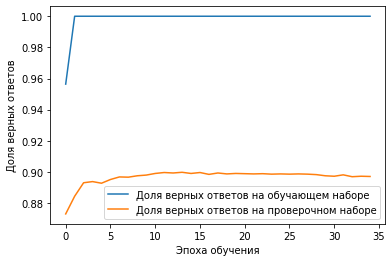

[[50, 'relu', 100, 'relu', 0, 'relu'], 'train_acc = ', 0.8825]

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 313us/sample - loss: 0.1553 - acc: 0.9396 - val_loss: 0.3223 - val_acc: 0.9042
Epoch 2/35
17658/17658 [==============================] - 3s 191us/sample - loss: 1.2619e-04 - acc: 1.0000 - val_loss: 0.3057 - val_acc: 0.9077
Epoch 3/35
17658/17658 [==============================] - 3s 193us/sample - loss: 7.0079e-05 - acc: 1.0000 - val_loss: 0.2945 - val_acc: 0.9090
Epoch 4/35
17658/17658 [==============================] - 3s 192us/sample - loss: 4.4077e-05 - acc: 1.0000 - val_loss: 0.2845 - val_acc: 0.9111
Epoch 5/35
17658/17658 [==============================] - 3s 191us/sample - loss: 3.0039e-05 - acc: 1.0000 - val_loss: 0.2823 - val_acc: 0.9099
Epoch 6/35
17658/17658 [==============================] - 3s 193us/sample - loss: 2.1704e-05 - acc: 1.0000 - val_loss: 0.2788 - val_acc: 0.9095
Epoch 7/35
17658/17658 [===

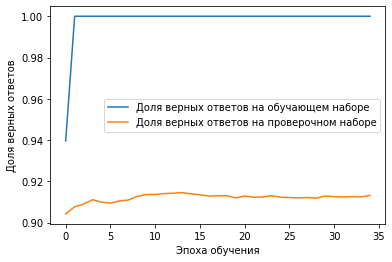

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 318us/sample - loss: 0.1513 - acc: 0.9429 - val_loss: 0.3547 - val_acc: 0.8797
Epoch 2/35
17658/17658 [==============================] - 4s 202us/sample - loss: 1.4648e-04 - acc: 1.0000 - val_loss: 0.3347 - val_acc: 0.8882
Epoch 3/35
17658/17658 [==============================] - 4s 203us/sample - loss: 7.1355e-05 - acc: 1.0000 - val_loss: 0.3268 - val_acc: 0.8903
Epoch 4/35
17658/17658 [==============================] - 4s 204us/sample - loss: 4.0985e-05 - acc: 1.0000 - val_loss: 0.3267 - val_acc: 0.8893
Epoch 5/35
17658/17658 [==============================] - 4s 207us/sample - loss: 2.5935e-05 - acc: 1.0000 - val_loss: 0.3264 - val_acc: 0.8881
Epoch 6/35
17658/17658 [==============================] - 4s 208us/sample - loss: 1.6930e-05 - acc: 1.0000 - val_loss: 0.3221 - val_acc: 0.8893
Epoch 7/35
17658/17658 [==============================] - 4s 202us/sample - loss: 1.1547e-0

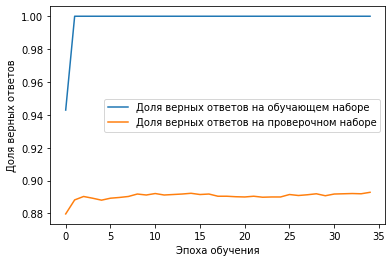

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 328us/sample - loss: 0.1721 - acc: 0.9329 - val_loss: 0.3088 - val_acc: 0.9032
Epoch 2/35
17658/17658 [==============================] - 4s 199us/sample - loss: 1.7286e-04 - acc: 1.0000 - val_loss: 0.2883 - val_acc: 0.9074
Epoch 3/35
17658/17658 [==============================] - 4s 199us/sample - loss: 8.7579e-05 - acc: 1.0000 - val_loss: 0.2788 - val_acc: 0.9087
Epoch 4/35
17658/17658 [==============================] - 4s 199us/sample - loss: 5.1156e-05 - acc: 1.0000 - val_loss: 0.2696 - val_acc: 0.9111
Epoch 5/35
17658/17658 [==============================] - 4s 200us/sample - loss: 3.2899e-05 - acc: 1.0000 - val_loss: 0.2658 - val_acc: 0.9110
Epoch 6/35
17658/17658 [==============================] - 4s 199us/sample - loss: 2.2714e-05 - acc: 1.0000 - val_loss: 0.2613 - val_acc: 0.9129
Epoch 7/35
17658/17658 [==============================] - 4s 200us/sample - loss: 1.6483e-0

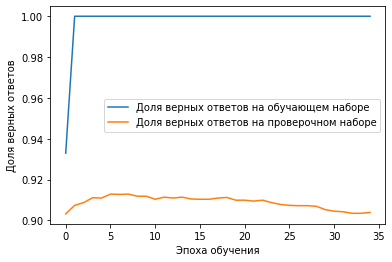

[[50, 'relu', 150, 'relu', 0, 'relu'], 'train_acc = ', 0.9033]

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 327us/sample - loss: 0.1629 - acc: 0.9359 - val_loss: 0.3479 - val_acc: 0.8815
Epoch 2/35
17658/17658 [==============================] - 3s 197us/sample - loss: 1.2344e-04 - acc: 1.0000 - val_loss: 0.3246 - val_acc: 0.8882
Epoch 3/35
17658/17658 [==============================] - 3s 197us/sample - loss: 6.4105e-05 - acc: 1.0000 - val_loss: 0.3036 - val_acc: 0.8960
Epoch 4/35
17658/17658 [==============================] - 3s 198us/sample - loss: 4.0072e-05 - acc: 1.0000 - val_loss: 0.2939 - val_acc: 0.8987
Epoch 5/35
17658/17658 [==============================] - 3s 198us/sample - loss: 2.7718e-05 - acc: 1.0000 - val_loss: 0.2870 - val_acc: 0.9009
Epoch 6/35
17658/17658 [==============================] - 3s 198us/sample - loss: 1.9866e-05 - acc: 1.0000 - val_loss: 0.2783 - val_acc: 0.9045
Epoch 7/35
17658/17658 [===

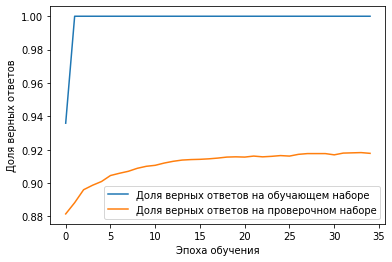

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 329us/sample - loss: 0.1524 - acc: 0.9487 - val_loss: 0.3343 - val_acc: 0.8894
Epoch 2/35
17658/17658 [==============================] - 3s 195us/sample - loss: 1.0570e-04 - acc: 1.0000 - val_loss: 0.3176 - val_acc: 0.8960
Epoch 3/35
17658/17658 [==============================] - 3s 197us/sample - loss: 5.7915e-05 - acc: 1.0000 - val_loss: 0.3086 - val_acc: 0.8988
Epoch 4/35
17658/17658 [==============================] - 3s 197us/sample - loss: 3.6600e-05 - acc: 1.0000 - val_loss: 0.3060 - val_acc: 0.8991
Epoch 5/35
17658/17658 [==============================] - 3s 197us/sample - loss: 2.5426e-05 - acc: 1.0000 - val_loss: 0.3018 - val_acc: 0.9006
Epoch 6/35
17658/17658 [==============================] - 3s 196us/sample - loss: 1.8713e-05 - acc: 1.0000 - val_loss: 0.2981 - val_acc: 0.9015
Epoch 7/35
17658/17658 [==============================] - 3s 196us/sample - loss: 1.4357e-0

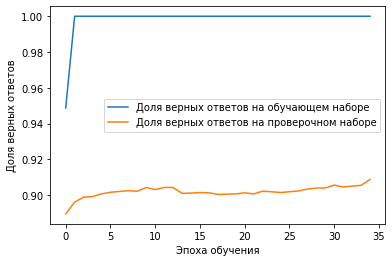

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 331us/sample - loss: 0.1534 - acc: 0.9486 - val_loss: 0.3553 - val_acc: 0.8859
Epoch 2/35
17658/17658 [==============================] - 3s 196us/sample - loss: 1.4115e-04 - acc: 1.0000 - val_loss: 0.3273 - val_acc: 0.8941
Epoch 3/35
17658/17658 [==============================] - 3s 197us/sample - loss: 6.0736e-05 - acc: 1.0000 - val_loss: 0.3099 - val_acc: 0.8978
Epoch 4/35
17658/17658 [==============================] - 3s 198us/sample - loss: 3.2088e-05 - acc: 1.0000 - val_loss: 0.2997 - val_acc: 0.8993
Epoch 5/35
17658/17658 [==============================] - 3s 197us/sample - loss: 1.9317e-05 - acc: 1.0000 - val_loss: 0.2896 - val_acc: 0.9030
Epoch 6/35
17658/17658 [==============================] - 3s 197us/sample - loss: 1.2490e-05 - acc: 1.0000 - val_loss: 0.2847 - val_acc: 0.9041
Epoch 7/35
17658/17658 [==============================] - 4s 198us/sample - loss: 8.6636e-0

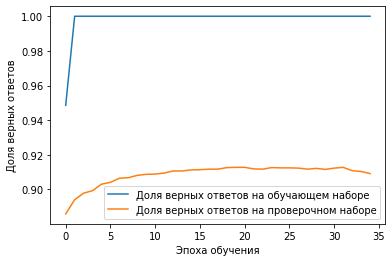

[[50, 'relu', 200, 'relu', 0, 'relu'], 'train_acc = ', 0.9119]

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 329us/sample - loss: 0.1548 - acc: 0.9459 - val_loss: 0.3218 - val_acc: 0.8914
Epoch 2/35
17658/17658 [==============================] - 3s 194us/sample - loss: 1.0318e-04 - acc: 1.0000 - val_loss: 0.3061 - val_acc: 0.8939
Epoch 3/35
17658/17658 [==============================] - 3s 193us/sample - loss: 5.4224e-05 - acc: 1.0000 - val_loss: 0.2915 - val_acc: 0.8988
Epoch 4/35
17658/17658 [==============================] - 3s 193us/sample - loss: 3.0796e-05 - acc: 1.0000 - val_loss: 0.2862 - val_acc: 0.9009
Epoch 5/35
17658/17658 [==============================] - 3s 193us/sample - loss: 1.7191e-05 - acc: 1.0000 - val_loss: 0.2776 - val_acc: 0.9051
Epoch 6/35
17658/17658 [==============================] - 3s 192us/sample - loss: 1.0384e-05 - acc: 1.0000 - val_loss: 0.2705 - val_acc: 0.9060
Epoch 7/35
17658/17658 [===

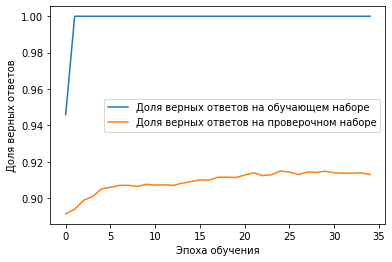

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 328us/sample - loss: 0.1468 - acc: 0.9486 - val_loss: 0.3488 - val_acc: 0.8737
Epoch 2/35
17658/17658 [==============================] - 3s 185us/sample - loss: 9.8168e-05 - acc: 1.0000 - val_loss: 0.3319 - val_acc: 0.8794
Epoch 3/35
17658/17658 [==============================] - 3s 186us/sample - loss: 5.2903e-05 - acc: 1.0000 - val_loss: 0.3213 - val_acc: 0.8835
Epoch 4/35
17658/17658 [==============================] - 3s 185us/sample - loss: 3.2701e-05 - acc: 1.0000 - val_loss: 0.3149 - val_acc: 0.8853
Epoch 5/35
17658/17658 [==============================] - 3s 185us/sample - loss: 2.2207e-05 - acc: 1.0000 - val_loss: 0.3100 - val_acc: 0.8863
Epoch 6/35
17658/17658 [==============================] - 3s 184us/sample - loss: 1.5976e-05 - acc: 1.0000 - val_loss: 0.3104 - val_acc: 0.8856
Epoch 7/35
17658/17658 [==============================] - 3s 184us/sample - loss: 1.2037e-0

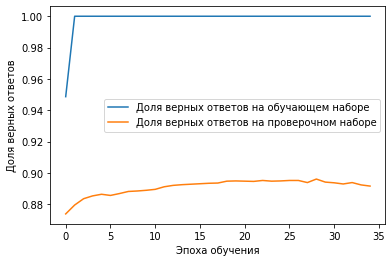

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 330us/sample - loss: 0.1714 - acc: 0.9423 - val_loss: 0.3433 - val_acc: 0.8850
Epoch 2/35
17658/17658 [==============================] - 3s 191us/sample - loss: 1.2794e-04 - acc: 1.0000 - val_loss: 0.3275 - val_acc: 0.8896
Epoch 3/35
17658/17658 [==============================] - 3s 192us/sample - loss: 6.4772e-05 - acc: 1.0000 - val_loss: 0.3221 - val_acc: 0.8908
Epoch 4/35
17658/17658 [==============================] - 3s 191us/sample - loss: 3.5407e-05 - acc: 1.0000 - val_loss: 0.3151 - val_acc: 0.8944
Epoch 5/35
17658/17658 [==============================] - 3s 192us/sample - loss: 2.1552e-05 - acc: 1.0000 - val_loss: 0.3104 - val_acc: 0.8960
Epoch 6/35
17658/17658 [==============================] - 3s 191us/sample - loss: 1.4427e-05 - acc: 1.0000 - val_loss: 0.3077 - val_acc: 0.8972
Epoch 7/35
17658/17658 [==============================] - 3s 190us/sample - loss: 1.0355e-0

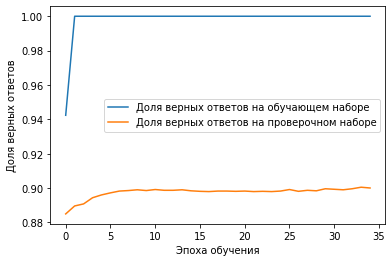

[[50, 'relu', 250, 'relu', 0, 'relu'], 'train_acc = ', 0.9015]

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 341us/sample - loss: 0.1506 - acc: 0.9601 - val_loss: 0.3538 - val_acc: 0.8853
Epoch 2/35
17658/17658 [==============================] - 4s 207us/sample - loss: 1.6689e-04 - acc: 1.0000 - val_loss: 0.3253 - val_acc: 0.8942
Epoch 3/35
17658/17658 [==============================] - 4s 207us/sample - loss: 8.4015e-05 - acc: 1.0000 - val_loss: 0.3213 - val_acc: 0.8944
Epoch 4/35
17658/17658 [==============================] - 4s 205us/sample - loss: 4.8055e-05 - acc: 1.0000 - val_loss: 0.3150 - val_acc: 0.8953
Epoch 5/35
17658/17658 [==============================] - 4s 206us/sample - loss: 3.0698e-05 - acc: 1.0000 - val_loss: 0.3068 - val_acc: 0.8987
Epoch 6/35
17658/17658 [==============================] - 4s 205us/sample - loss: 2.1230e-05 - acc: 1.0000 - val_loss: 0.3050 - val_acc: 0.8981
Epoch 7/35
17658/17658 [===

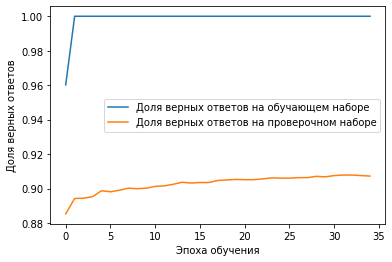

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 347us/sample - loss: 0.1372 - acc: 0.9539 - val_loss: 0.3102 - val_acc: 0.9020
Epoch 2/35
17658/17658 [==============================] - 4s 204us/sample - loss: 1.1465e-04 - acc: 1.0000 - val_loss: 0.2964 - val_acc: 0.9048
Epoch 3/35
17658/17658 [==============================] - 4s 204us/sample - loss: 5.3287e-05 - acc: 1.0000 - val_loss: 0.2815 - val_acc: 0.9065
Epoch 4/35
17658/17658 [==============================] - 4s 202us/sample - loss: 2.9098e-05 - acc: 1.0000 - val_loss: 0.2713 - val_acc: 0.9084
Epoch 5/35
17658/17658 [==============================] - 4s 205us/sample - loss: 1.7926e-05 - acc: 1.0000 - val_loss: 0.2692 - val_acc: 0.9080
Epoch 6/35
17658/17658 [==============================] - 4s 202us/sample - loss: 1.1962e-05 - acc: 1.0000 - val_loss: 0.2698 - val_acc: 0.9062
Epoch 7/35
17658/17658 [==============================] - 4s 205us/sample - loss: 8.4213e-0

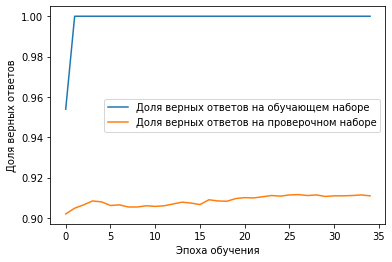

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
17658/17658 [==============================] - 6s 345us/sample - loss: 0.1300 - acc: 0.9612 - val_loss: 0.3131 - val_acc: 0.9026
Epoch 2/35
17658/17658 [==============================] - 3s 191us/sample - loss: 1.8477e-04 - acc: 1.0000 - val_loss: 0.3003 - val_acc: 0.9036
Epoch 3/35
17658/17658 [==============================] - 3s 192us/sample - loss: 9.3262e-05 - acc: 1.0000 - val_loss: 0.2877 - val_acc: 0.9069
Epoch 4/35
17658/17658 [==============================] - 3s 190us/sample - loss: 4.9846e-05 - acc: 1.0000 - val_loss: 0.2845 - val_acc: 0.9051
Epoch 5/35
17658/17658 [==============================] - 3s 194us/sample - loss: 2.9290e-05 - acc: 1.0000 - val_loss: 0.2821 - val_acc: 0.9039
Epoch 6/35
17658/17658 [==============================] - 3s 192us/sample - loss: 1.9112e-05 - acc: 1.0000 - val_loss: 0.2789 - val_acc: 0.9059
Epoch 7/35
17658/17658 [==============================] - 3s 192us/sample - loss: 1.3317e-0

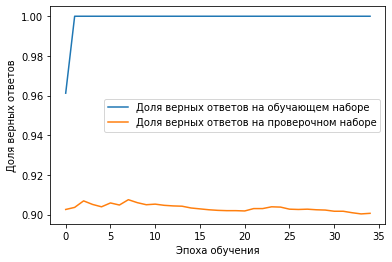

[[100, 'relu', 50, 'relu', 0, 'relu'], 'train_acc = ', 0.9063]

Train on 17658 samples, validate on 6693 samples
Epoch 1/35
  128/17658 [..............................] - ETA: 1:48 - loss: 1.7702 - acc: 0.2734

In [0]:
# формируем обучающую и тествую выборку

data = [0, 20000, 1000, 100] # формат данных - (low_ind_dict = 0, size_dict = 20000, len_cut = 1000, step = 100)
xTrain, xTrain01, yTrain, xTest, xTest01, yTest = get_data(*data)

list_test_net = []
#Обучаем каждую сеть и выводим среднюю точность на проверочной выборке по 3 запускам
for currNet in net:
  acc = testModel(net = currNet, batch_size = 128, epochs = 35, iterations = 3)
  list_test_net.append([currNet, 'train_acc = ', round(sum(acc)/len(acc),4)])
  print(list_test_net[-1])
  print('='*100)
  print()

print('Результаты тестирования архитектуры сети')
for i in list_test_net:
  print(i)

### Финальный вариант сети, словаря и размера отрезка для опознавания

Train on 17418 samples, validate on 6453 samples
Epoch 1/15
17418/17418 [==============================] - 8s 488us/sample - loss: 1.7045 - acc: 0.3076 - val_loss: 1.7120 - val_acc: 0.2975
Epoch 2/15
17418/17418 [==============================] - 7s 418us/sample - loss: 1.5956 - acc: 0.3239 - val_loss: 1.6533 - val_acc: 0.2975
Epoch 3/15
17418/17418 [==============================] - 7s 416us/sample - loss: 1.3452 - acc: 0.4801 - val_loss: 1.4545 - val_acc: 0.3169
Epoch 4/15
17418/17418 [==============================] - 7s 415us/sample - loss: 0.9196 - acc: 0.9486 - val_loss: 1.1954 - val_acc: 0.7424
Epoch 5/15
17418/17418 [==============================] - 7s 421us/sample - loss: 0.5666 - acc: 1.0000 - val_loss: 0.9806 - val_acc: 0.9335
Epoch 6/15
17418/17418 [==============================] - 7s 414us/sample - loss: 0.3455 - acc: 1.0000 - val_loss: 0.8196 - val_acc: 0.9561
Epoch 7/15
17418/17418 [==============================] - 7s 414us/sample - loss: 0.2184 - acc: 1.0000 - val_lo

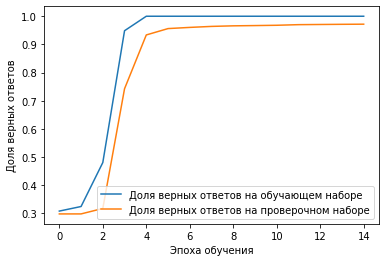

Результат обучения нейросети
val_acc =  1.0



In [0]:
# Задаем формат для данных
# формат данных - (low_ind_dict = 0, size_dict = 20000, len_cut = 1000, step = 100)
#currData = [0, 30000, 5000, 100] 
# Создаем обучающие и тестовые данные
#xTrain, xTrain01, yTrain, xTest, xTest01, yTest = get_data(*currData)

#Создаём полносвязную сеть
model01 = Sequential()
model01.add(Dense(400, input_dim=xTrain01.shape[1], activation="sigmoid"))
model01.add(Dense(600, activation="sigmoid"))
model01.add(Dense(1000, activation="sigmoid"))
model01.add(Dense(6, activation='sigmoid'))

model01.compile(optimizer = Adam(lr=0.00001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=15,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

acc = history.history['acc'][-1]
print('='*100)
print('Результат обучения нейросети')
print('val_acc = ', np.round(acc,4))
print('='*100)
print()

### Выводы:
- Цель поставленная в задании выполенена, достигнутая точность на валидациооной выборке равна 97,02
- В ходе исследования выяснилось, что наибольшее влияние на точность распознавания для сети оказывает длинна отрезка текста на основании которого прозводится распознавание. Это согласуется и с логической точкой зрения, чем больший отрывок текста мы имеем, тем нам проще определить по нему автора.
- Наиболее подходящая функция активации для внутренних Dense слоев нейросить оказалсь функция "sigmoid", а не "relu"
- Любого рода нормализация данных как на входе нейросети, так и на внутренних слоях ухудшала результаты обучения.

#Распознавание проверочной выборки


In [0]:
###########################
# Представляем тестовую выборку в удобных для распознавания размерах
##########################
def createTestMultiClasses(wordIndexes, xLen, step): #функция принимает последовательность индексов, размер окна, шаг окна

  #Для каждого из 6 классов
  #Создаём тестовую выборку из индексов
  nClasses = len(wordIndexes) #задаем количество классов
  xTest6Classes01 = []                #здесь будет список из всех классов,каждый размером "кол-во окон в тексте * 20000(при maxWordsCount=20000)"
  xTest6Classes = []                 #здесь будет список массивов, каждый размером "кол-во окон в тексте * длину окна"(6 по 420*1000)
  for wI in wordIndexes:                       #для каждого тестового текста из последовательности индексов
    sample = (getSetFromIndexes(wI, xLen, step)) #тестовая выборка размером "кол-во окон*длину окна"(например 420*1000)
    xTest6Classes.append(np.array(sample))              #переводим в массив numpy и добавляем в список
    xTest6Classes01.append(tokenizer.sequences_to_matrix(sample)) #трансформируется в Bag of Words в виде "кол-во окон в тексте * 20000"
  xTest6Classes01 = np.array(xTest6Classes01)                     #и добавляется к нашему списку, 
  
  return xTest6Classes01, xTest6Classes  #функция вернёт тестовые данные: TestBag 6 классов на n*20000 и xTestEm 6 по n*1000

###########################
# Расспознаём тестовую выборку и выводим результаты
##########################
def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  #Проходим по всем классам
  for i in range(nClasses):
    #Получаем результаты распознавания класса по блокам слов длины xLen
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    #Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    #Считаем процент распознавания каждого класса за каждый
    #Получам матрицу 6 на 6
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    #Определяем, какой в класс в итоге за какой был распознан
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    #Выводим результаты распознавания по текущему классу
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " распознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized, sep='')
  
  #Выводим вредний процент распознавания по всем классам вместе
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%", sep='')
    
  print()
  
  return sumVal/sumCount

In [0]:
xTest6Classes01, xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step)

In [0]:
#Проверяем точность нейронки обученной на bag of words
pred = recognizeMultiClass(model01, xTest6Classes01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри распознано 100% сеть считает, что это О. Генри, распознано ВЕРНО!
Стругацкие распознано 93% сеть считает, что это Стругацкие, распознано ВЕРНО!
Булгаков распознано 99% сеть считает, что это Булгаков, распознано ВЕРНО!
Саймак распознано 100% сеть считает, что это Саймак, распознано ВЕРНО!
Фрай распознано 94% сеть считает, что это Фрай, распознано ВЕРНО!
Брэдбери распознано 100% сеть считает, что это Брэдбери, распознано ВЕРНО!

Средний процент распознавания 97%

